In [2]:
from simulation import *
from aesthetics import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

In [3]:
from plot import *
prepare_plot()

# Look into optimizing flux, power, or torque.
The goal here is to help understand design with two potential directions.

```
Guess for energy surface:	[ 0.  1.  2.  3.  4.  5.  0.]
Directional flux:		-1.122875985008045

Guess for energy surface:	[  1.49011612e-08   1.00000000e+00   2.00000000e+00   3.00000000e+00
   4.00000000e+00   5.00000000e+00   0.00000000e+00]
Directional flux:		-1.122688473579357

Guess for energy surface:	[ 0.          1.00000001  2.          3.          4.          5.          0.        ]
Directional flux:		-1.1231365219016651

Guess for energy surface:	[ 0.          1.          2.00000001  3.          4.          5.          0.        ]
Directional flux:		-1.1227605068437774

Guess for energy surface:	[ 0.          1.          2.          3.00000001  4.          5.          0.        ]
Directional flux:		-1.1229348544594056

Guess for energy surface:	[ 0.          1.          2.          3.          4.00000001  5.          0.        ]
Directional flux:		-1.1230967260865328

Guess for energy surface:	[ 0.          1.          2.          3.          4.          5.00000001
  0.        ]
Directional flux:		-1.123313103013144

Guess for energy surface:	[  0.00000000e+00   1.00000000e+00   2.00000000e+00   3.00000000e+00
   4.00000000e+00   5.00000000e+00   1.49011612e-08]
Directional flux:		-1.122950712748722

Guess for energy surface:	[-12583.67896627  17485.33496094  -7747.6084208    3953.66200511
  14817.68301545  29339.49275614   5014.89378612]
```


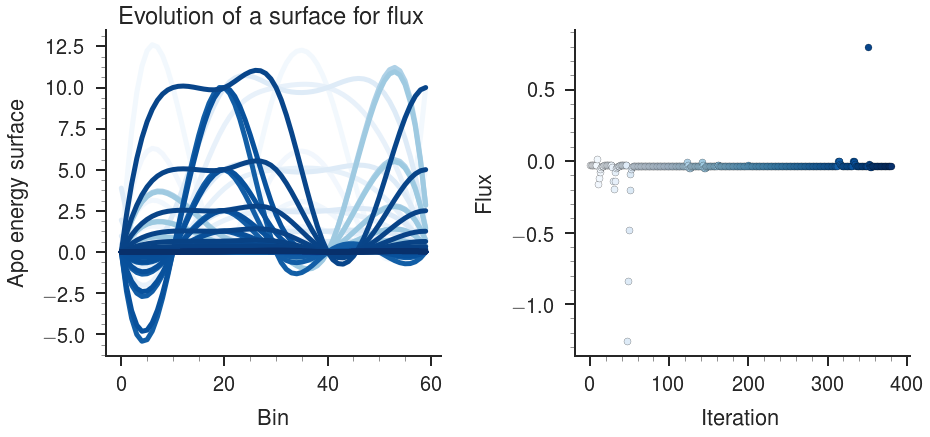

In [5]:
from IPython.display import display, HTML
display(HTML('''<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA6IAAAG1CAYAAADjtEmNAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xl4HNWVN/7vrepVS0u2vGK3DRgQtswahGMBIQRhGbKQmGCRTPIOTmySmUksMpEzmQkWiXEmM2PnN7HCO+8QO3FmsiETNBNCsAWGsFnGNgkBWwKzGFstG69aWktvVXV/f5Sqre66vS9qSefzPH4eVF1dfbu7hOrUOfdcxjnnIIQQQgghhBBC8kQa6wEQQgghhBBCCJlcKBAlhBBCCCGEEJJXFIgSQgghhBBCCMkrCkQJIYQQQgghhOQVBaKEEEIIIYQQQvKKAtEJrra2FpWVlUn/83g8eRtbS0sLKisr0dTUlLPX2Lp1a85fYyw0NTWhuro6799ZIZpIn0UhvBev14u1a9eGx+H1egEAK1asQGVlJTo6OsZkXIQQQgiZWCxjPQBCSGqamprQ0tICAHC73SgrKxvjEY2difRZFMp72bx5M9ra2sLjIIQQQgjJBQpEJ4ktW7Zg+fLlYz2MnKmsrAQAHD58OGJ7TU0NVq9ejRtuuGEshpUT7e3tAIDt27ejpqZmjEcztibSZ1Eo72Xnzp0FMQ5CCCGETGwUiJIJraqqClVVVWM9jKzq7+8HACxevHiMRzL2JtJnUSjvxSjFpSCUEEIIIblEc0QJIYQQQgghhOQVBaJEqKmpCZWVlVi7dm3MfYxGSMa8NgDo6OiIaHRSXV2NtWvXJt14xWgutGnTJuHjmzZtQmVlJbZu3QoAWLt2bbgsF0C46ZIhXkOkVMa6a9euiHFt3bo1/P5ra2vR1NQUziSlKtlxGN+J8TrpNLXZtWsX1q5dGx57dXU1VqxYgV27dqU8bq/Xi02bNoWb2BjHGn0+GFL9Xo2xjt42+pxM5rNI571Gfxe1tbXYtGlTzO/W6/Wiqakp4jXWrl0bLrNNRjLvJZ1zVfS5JTMOg/G7FO+8TvV79Xq94eOKmh4Zv68rVqyIO1ZCCCGEjH8UiBIhYz7p3r17hY97PJ7wRXB9fT0A/QJ4xYoVaGtrg9frhcvlgtfrRVtbG2pra9MKdhK54YYbUFdXF/65rq4u4udYMhnrqlWrsHnzZgB6MxePx4OWlpa0Lp5TGUdNTY3wvSbb1GbTpk1oaGhAW1sbPB5P+LU6OjrQ0NAQM5gQ8Xq9WLFiBbZt24aOjo6IYzU1NWW9S/HoRj5A4s8infdqfIejvwuPx4Nt27bh1ltvNQV9HR0duPXWW9HS0hLxGm1tbVi1alVEUB1PoveSybka/bnFU1VVldbvUipcLhc2bNgAAGhoaIh4zAjqAX1OOyGEEEImNgpEiVBNTU34gleU3Xn00UcBIHyh6vV6wxeWdXV1OHDgQPifsU9DQ0PWl6Sor69Hc3Nz+Ofm5uaIn0UyGeuOHTtw6NAhtLa2Yvfu3di9ezdaW1sBIByQJivVcSxfvhzNzc1wuVwAgI0bN0b8HI8RUAHAhg0bcPjwYRw4cACHDx8OBwbG48nYvHkzPB4PqqqqwmM+fPhwOIAwgrNsaGlpQUtLC1avXo3W1lZs3Lgx7meRznsdHQQ1NjaGn7N7925UVVWFs7+jNTQ0wOv1or6+PuIzaGxsDH9GyWRG472XTM5V0ecWT6zfpWTOr1TU19ejpqYGHo8nIlg33mdjYyN16yWEEEImAQpEJ4mGhoaEa4hGZ/Ruv/12ABBmXIzlHe655x4AwCOPPAJAD2BHX7y6XC40NzeHG58kmyXKpUzG6vV6sWXLlogGSFVVVVi9ejUAoKurKy/jSJVRBllTUxPOYBvq6+vDF/7JrhF56NAhAHrQMDpQWb58Oerq6sKZ4mzweDzYsGED1q1bh6qqqoSBUTrv1chw19fXY82aNeHtbrc7HFwb5zxwPtCuqanBhg0bIsa0Zs2aiGA0E5mcI6l+bvlk3BAwbmjs2rUL7e3tqKqqivj8CSGEEDJxUSBKYjLKc43lHAxGWa7L5QpfCBsX6bEuIo3tqcydy5VMxjr6PY82b948AMDAwEBexpGq5cuX48CBA9i+fXvGxxptz549pm3Nzc3YvXt31rquulwuU0AZTzrv1chki74Lt9uN1atXo76+Pjxf0rg5E+u7M8abbGAfS6bnaiqfWz653e6IEt3169cDoJJcQgghZDKh5VsmiXTWER1dntvR0RHOAhpluStXrgzva2S/Yi09YWzPdmluOjIZazaX1sj3ZzY6I+b1euHxeNDe3o729vaUX6O+vh5NTU3Ytm0b2trawuWWuVgqJ50yzVTe6+hmPLFea926dRE/G8d49NFHw78PsXg8nrRLTTM5Rwq9vLW+vh4tLS3hYJ1KcgkhhJDJhQJREtftt9+OlpYWPPXUU+EgI7osd/SFfKzyv+jAYKzKBDMda2lpaUGMIx0dHR145JFHIkpM02VkB3/yk5/A4/GES1BdLhduv/12rFmzJmtBxdy5c1N+Tirv1QjiUhmv8ZxsfJaxZHqOpPO55ZtxQwNAyjfKCCGEEDK+USBK4jKyFm1tbVi3bl24LLeqqip84Z5qgDSWc9UKZaz5Hkd7eztWrVoFQA+46urqcMUVV8DtdqOqqgorVqxIuYx0zZo1WLNmDdrb27Fr1y4cOnQIHR0d4SY5ra2tOcmQJpLqezU+2/7+/pRf68CBAxPmHMk3r9cbMYe2qakp66XjhBBCCClcNEeUxGU0OTECUKMMMXrumXERHKvE09ie6cVyNspU8zXWQhqHccG/evVq7N69G+vWrcPy5cuzEigaDXuMTsLG3NBUGvVks2Q71fdq3FCJt15me3s7WlpawvsYz4kXvHq93rTXljUUyrmarnjf6+bNm+H1erF69Wq43e7wDQ1CCCGETA4UiJKERnfPNUoRjW0GY65arAtJI4BNdo5lrKY/sdY1TUW2xzoexmFkAL/yla8IH08lYPJ6vaitrRWum+p2u8MdY43OuqPl8ns1pPNejcAy1nfR0NCApqamcOC5aNEiAIg5P3TXrl2orq42rZWZqkI5VxNJ9Xs1Anu3241169aFGxetX78+4+CdEEIIIeMDBaIkISP7acwHNJoYjWZ07zT2Ga2joyO8bmOipRmMgEDUBXTTpk1ZuUjN1ljH0ziMz1WUodq6dWtKGUkjQ97R0SEMkIzvbnRwlI/vNfq1UnmvxmdsZOlGMzKhLpcrfGwjyN22bZuppHl0yWmm8x4L5VyNJd3v1QjQjQC0pqYGdXV18Hq9eOCBB3I0WkIIIYQUEpojOkkkm5mpr68PXxwajPJc46JStCRETU0Nampq0N7ejtraWtTX16Oqqio8Z3D0PvEYj3s8HqxYsQL33XcfAOCpp55CW1tb+DVi2bRpE2644Ya4r5OtsWYqn+OoqalBS0sL7r33XjQ2NmLx4sU4dOhQeP1G4/t95JFHsG7duoSNe1avXo1t27ahoaEBdXV1uOGGGwDoy7mIlhzJ9HvN9Xutr68PB6m33norVq5ciXnz5kW8n9FLi1RVVaGurg5tbW1YsWJF+DMwGjh5vV5UVVVlvHxKoZyr8cYHpPa9NjU1wev1hjstGzZu3Ii9e/eira0N7e3tY/aeCCGEEJIfFIiSpBjdc4HYWZ7t27dj7dq1aGtrC+9rqKurQ3Nzc8LXcblc2LJlCxoaGtDR0RERQBvLO4gCFiMo2LZtG7Zt24bDhw/HfZ1sjDUb8jWODRs2hJcwMbqUAnpGq7W1FYcOHUJTUxPa2towMDCQsGmM0biqra0t/M/gcrnw0EMPRQQS6X6v+Xyvra2tuPfeeyMyjaOPGR0YNTc3o6mpKdzMa/RnUFdXh40bN2bl/RTKuSqS6vdqlOS6XK5wCffoYzU2NqKpqQkNDQ04cOBA3t4HIYQQQvKPcc75WA+CTCxGEGCUM9bU1KS8lIfX6w2v+WgsCZKoIcuuXbvC+yebicrGWLMhX+Po6OjAoUOHwhm70cGV8fmlsh6oUaJrfO5utztuJiud7zVd6b7X6OctXrw47hhHf3dGZ95cfHeFcq6K5PN7JYQQQsjEQIEoIYQQQgghhJC8omZFhBBCCCGEEELyigJRQgghhBBCCCF5RYEoIYQQQgghhJC8okB0HKisrERlZeVYD4MQQggZ9+hvKiGEFAYKRAkhhBBCCCGE5BUFooQQQgghhBBC8soy1gMghBBCCMmVffv2Yf/+/WM9DEIIIVFoHdFxwJjLcvjw4TEeCSGEEDK+0d9UQggpDFSaSwghhBBCCCEkrygQJYQQQgghhBCSVzRHtADRfBZCCCGEEELIREZzRMcBms9CCCGEZAf9TSWEkMJApbmEEEIIIYQQQvJqwgSiLS0tqK6ujrvPpk2bUFtbi8rKStTW1qKpqQlerzfp16iurkZlZaXw39atWzN9C4QQQgghhBAyKUyYOaItLS1xH6+trYXH44HL5UJdXR26u7vR0tKCnTt34tlnn4XL5Ur4Gl6vFy6XC2632/SYaBshhBBCCCGEELNxHYh6vV4cOnQIW7duRUdHR8xgcuvWrfB4PKirq0Nzc3N4e0tLC5qamtDQ0IDt27fHfS2PxwMAWLlyJdatW5e9N0EIIYQQQgghk8y4DkQTleIadu7cCQDYuHFjxPb6+nps3boV7e3tCY9hBKJXXHFFiqOcnDTOEVQ4NAAWxmCVAcbYWA+LEEIIIYQQUgDGdSC6ZcuW8H+vX78+5n5GSa4oY7po0SJ4PB54PJ645bVGIEoluIlpnGM4yGG0Y1bBEVABi8RhkxlkiQJSQgghhBBCQqEQenp6MHXqVFit1rEeTl6N60B0+fLl4f/evHkz+vv7hfv9/Oc/j1m229nZCSBxgNnV1QUAaG9vx/r169HR0QG3242amho0NjYmNcd0MuCcwxc6H4SOpmiAonFITA9ILRJlSQkhhBBCyOTDOcdDD/8aj/7xbRw9p+DCCgvuueUyrP/a5yfN9fG4DkSTVVVVJdze1NQUnjuaiJER3bx5M6qqqlBXV4fOzs6UGx5FM9Yzmwg45/ApHFqClWk1DvgVDrvMYJsUZyAhhBBCCCHnPfTwr/HPv+sCk0oAO/D+IPSf8Rus//rnx3p4eTFhlm9Jhdfrxdq1a9HS0gK3222aOyrS3d0Nl8uF7du3o7W1Fc3Nzdi9ezdWr14Nr9eLBx54IA8jL1yccwQUDlVL/jkBlUPjCaJWQgghhBBCJpBQKIRH//g2mBSZkWGSBY8+/zZCodAYjSy/Jl0+yuiUCwA1NTXYsmVLUpnM1tZW4fZ169Zhx44daGtrS2s8hw8fTrjPeMiahlQglEIQaggoHE7r5Cg/IJnhXC/51jjAAEiMSrsJIYnt27cP+/fvH+thEEJIWE9PD46eUwC7+bGj50Lo7e3FjBkz8j+wPJs0gajX60VDQwPa29vhcrnw0EMPRcwxzcTSpUvR1taWsOHRRBVSOQKqOLPpsOhzQUOavl902a4xb9RCDYxIFM7180XVAJXr2fbRpw+D3gDLKjMKSgkhMS1ZsgRLliwJ//zwww+P4WgIIQSYOnUqLqyw4P1B82MXVlgxZcqU/A9qDEya0tx7770X7e3tqKmpwYEDB7IWhI5WVlaW9WMWOo1z+BVxEGqXGawyA2MMNpmhyMogChUCCgenEl0yiqpxDIf0fwGVQ4kKQgH955AGDIc4hoIcAUWj84gQQgghBc9qteKeWy4D15SI7VxTUP/RSydN99xJEYhu2rQJHR0dWL16NbZv357y8z0eDyorK7F27Vrh452dnTGXh5noQqp4u1UGbJbIsJMxBrvFHIpqPL2yXjIxhVQ9AE3U9Go0DiCoAkNBDjWVJxJCCCGEjIH1X/s8vnPnfFxcOgQp2IeLS4fwT3fOw/qvTY5GRcAkKc3dsWMH3G431q1bl9T+Ho8HZWVl4cDS7XbD7Xajra0tnFU1bN26FR6PB6tXr87J2AudIrjot0h6NlTEIulz+6KfFlD4yGNUXjlZcc4RVIFgjDLvpI4BPUPqtILKvQkhhBBSsBhjWP/1z+PbX9XnhE6ZMmXSZEINEz4Q9Xg88Hq9AIAVK1bE3M9Ya7S9vR2rVq1CVVVVRIOiDRs2YNWqVVi1ahVqampQWlqKzs5OeDweVFVVJR3kTiSaJs5a2S0s5nw9xhgcFj1YiBZUOBzUuGhS4iMl3koSmXHRjYxovhCHwwJYY9wQIYQQQggpBFardVI0JhKZFIEooDcr6ujoSPs4NTU12L17N7Zu3Yr29vZwANrY2Ig1a9Zka7jjiqicVmKJs5qyxGCRzEFHSAOsGodMmaxJReMcvjiluBIDrBKDJAHySFMizvXzJ6RyxEqgGnOXKRglhBBCCCk8jFN3j4JnLN+SzFIv+TQU1EzBg11mprmhIhrXG8xEkxlQZJsUU5cJ9ExovPmgFknvvByvI26iQDbZc5IQMjkU6t9UQgiZbOiKn6QlVlmuRU7u+RJjwnmkKgc1m5lEgmrsMlubnDgIBfRzqciqL+EiElA5QhnMOyWEEEIIIdlHgShJS7pluaNZZUC0u6gBEpl4VI3HbEzksDDYLVLSa4OykWA0VhWuX+HQqPiDEEIIIaRgTPg5ouPRvn37sH///rEeRlyiYNGa4txOxhhskp6xGi2kAjaZJx2EkPGHcw5fjPVnnVaWVsdbxhicVsRseuQf6aZL5xUhhBBCyNijOaLjQKHNZ9E0jiFB19tiG0t5+ZVYc0XTDUbI+OAPacKsuk0G7JbMCjXideC1Wxhs1LyIkEmt0P6mEkLIZEWluSRl2SjLPf88BllwFtKcvolLUXnMcygbQaK+RBCD6EgBKtElhBBCCCkIFIiSlGWjLDfRcxVNz2yRiUUbyVaKJNOYKFlGMCriD3E6twghhBBCxhjNESUpybRbrkisSkxF0xsakYkjoHCIQkC7hWV9/ViLzGDVzNlXlY/MQ6b/+xEyKYyHvguEEDIZ0RzRcaCQ5rMEFHOnU4kBxRmu/SmaM0hrik4sqqavGRpNZvqc4Fw0EeIjc5BF/5MrsmY/+CWEFL5C+ptKCCGTGV3lk5RkuyzXYImxpijN55s4Yi7VkqMgFBgp0bWKjx2IUSJMCCGEEEJyjwJRkrRclOUaZAZhc5mQmvmxydhTtdhdbNNpcpUKi8SEJd4qpzVrk6VoNK+WEEIIIdlFs6RI0rLZLTcaY3qwEJ01UzQOG6e1H8c7UTaUAbDm6VaYXWYjwVTUuBQOi43OLRFN4+ju9+O9s0Po8ylwWCRcOqMYCyqK6PeREEIIIRmjQJQkTVQmm821PvVANPo19X+09OP4pcXIhtqy2CU3EcYY7DJMHXuNrCitWXteQNFw9Nwwjpwbhn/UF+dXNBw8MYDjfX5cO7cMpQ7680EIIYSQ9NGVRAEq1A5/qiCYiNXxNh0SY5AZR3TyLKRxaiqTZcGQipO9QyhxWFFe4oCUw893rLOhBosEMAbKisagcY7Ok4M4cnbI9Ds4Ws9wCM+9cxaXzyzBpdOLc15aTQghhJCJibrmjgOF0OGPc47BoPlUKbFlN6sVVLmpiQwDUJzl15lsNI3j9fdO47nXjuKPfz6G9o7j8AUUAIAkMVSUOlFR5sS0MieWVs3BV++8FhdUlGT+uiNda6PZZQZbjHU+cymkitcxdVrZpM6Kcs6xv6sPJ/oDKT2v3GnBdfPKUWqne5pk/CiEv6mEEEIoI0qSJMqQSCz7czetEhB9KcxHXn8M4pZx7y/vnsKPHjuAZ159Hz0DfuE+msZxpn8YZ/qHAQAvH+zGj1v/hK986mp8c+USTC8vSvv1gzE6047V+rCUFRV7/9ywMAjVOEdQVaFoHBJjsMsSZOl8KrvPp2DPkR7ccuk02LNZHkEIIYSQCY8CUZIUUVluLhJIjDFYJPOcQprHl5qDR05j4y/a8cSed9J6vj+oYMtvX8VP//A6vvaZ69Dw2etQXuJI6Rga58IGVzZ57LLbNFfUrM8XwsEPBiK2qZqGgKohpJ3/AlXOEdI02GUJdlkOf4e+kIa3Tw/iigtceR03IYQQQsY3uoVNkiJqVCTnKJgQBQOiQJiYvXnsLL7w/Sdw/Vf/K+0gdLRBXwj/8uu9WPh/foL/eSm1MrZY64baxigbajCyotFiZW8nMkXVcKCrL7wsk6JpGAyGMBhSIoLQ0QKqvo8y6vEj54bho7WWCCGEEJICCkRJUoSluTk6e2TBcfXuuZMvUEjWwHAQDc3P4EP3bcfjLyQXMJYV21FaZEtq377BAL7w/d+j9cXkjs05F64Ba5PHfikePSsquNkxCdcVff3EAAYD+hcVUFQMhRSoSfyeaQCGQgqGQwo0rq8vfPj0YI5HSwghhJCJhEpzSUKcm9dfBHK3pIrEGCTGER0TKNrYZ9MKRUjVMBzUoKgcz/35KL79n8/ixNmBuM8psltw05VufPSa+fjYNfOx+KLpkCSGQFDBuQE/zvYN47Hn38J//O+fMRwImZ6vaRz3/suTKHJYsfz6i+OPL0YG21og6/DQXFHA0+tDV68PgJ4J9aupZzRDmgYtxFFsteBojw+XTi9GsY3+rBBCCCEkMeqaOw6MdYc/RePwhaI62TKgxJa7hHpA4abSTlkCivK95kcB0TjHcEDDQECFP6TBOxTApl+9jMef74z7vJlTi/GVT1djxc2LUOq0oMgmo9guwSpKPQM42TOITY/uw7Y/vI6gIK3psFnwu+/fhY9cNS/maw4FNdONBKsMOAqooU2sDrrFVpbT5WwKwWBAwR/fOQdF49A4x2AwhFh/COwWCXPKHDjaM2z6TsP7yDIcFhnzpjjxIXdZzsZNSDaM9d9UQgghOgpEx4Gx/qMZVDgCUUGhRQKcOQwKVY1jOGQ+NbO9XMx4EFI19PtUDAXUcCDw4l+O4sFtz+FUz1DM500rL8J9d16Hu2+pgl2QpbLKDMU2CaVOi3Berue0F1/94S4899ox02MlTiue+td6VF8+2/RYrO+uyMoKaj1YzjmGQuZs/1gHzJxzcOjLFuXiXOec48X3etAzHALnHMMhBYrgz0C5w4pFs0pxcUURLJKEPl8Ie4/14NSAeImXUpsVEmOovWwaSh2UFSWFI3pt7ocffhgABaKEEDLWKBAdB8Y6EPWFNFMXW5vMYM/heip8ZP3J6JPTaWGwFEh5Z65xzuH1q+gZUsLb/EEFm3/1Mn79zMGYz3PaLfjbFUvwV3VXwpFkmWSxXYLLYYEj6ubCsD+EO7/zW7x8sNv0nCmlDrRtqscVF8+I2B5QNASjEqkSA4pzmEFPl+gmSz7WrdU4RyCkIaBwhFQNqqYH8CrnEY25ZKav8ypLDLIEWGUJRVYJNkv64zs1EED7+70AAL+iIiAoyZ1RYsfyy2dAinoNzjneOTuEvcd6TAG8TZbgtFgwp8yB6+eXpzU2QvJhrP+mEkII0dFt6wIUffd2rInK8WJUdWYNYwxyrGVcJkEgqmocZwZC8I2abHm46ywaf9yG9473xHzekkVzsWHNx+CemVp55FBAw1AgCLuFweWwoNgugTGGIocVj29YgTu+vQN/Onwy4jm9A3586p9+i1d/sgoVLieA2E2KrAWUCR3NIgOBqPFy6PORs7nWqapx+EIa/CENgZAWs6Ow6XkcUFWOUHh/DX3QA1SnTUaRTYLTJpkCxnjeHmkqpGiaMAi1WyTcvKBCeEzGGC6bXoJzQ0EcPhPZnCioarDLHMf7/ej3hVDmtCY9JkIIIYRMPpQRHQfG8u4t5xyDQcE8OhtL6eI3HaI5fPnIVo01X1DFmcFQODOmaRy/bHsdP/zNHoSiI/MRJU4rNnzpZqz5+FWQJIaQxqGo+r+QxuELail1hLVIDOVFFpSMBKTnvD7UNT6KjqNnTfuu/vhV+HHDMgDi+cRAfs6XdIky/jIDijLM4Coax3BAxVBQD0BzhQEodcgoL7IkLH0+NxTEi+/1xJ0XWnvpdMwtd8Y9znBQxeMHT0CNOqeskoQiqwWzSu1YetGUFN8JIflBGVFCCCkMlBElcYliFwbkJagQTdPj0Mc0EZOinHP0Divo953PUn1wbgBNP3kOew52xXzerdfOx//9Rh3mj8qC2iUG+6jfbj1TyTEc1DAcVBFIsGamonGcHQyhb5ihvEjG1FIHnvyXu3HbNx/Fu8d7I/b96VOvY9XtV+Lay2aNytydJ0v5OV/SZZWZKUhXR5YLSnXcqsYxFFAxGEj8GWcLB+D1669Z5rTA5ZRjjvvwaX1OsU9RhEHoFbNcCYNQACiyyVg0sxQHP/BGbA9pGlSN4+RAAL3DIUwpoqwoIYQQQsQKb9JWmlpaWlBdXZ1wnxUrVqCyshIrVqxAS0tLWq+T6THGE1EFYa7Lcg2MMWHAqeYuuTRmOOc4N3g+COWc4/E/duDOb/06ZhBqt8rY/Dcfw+9/cHdEECrCGIPNIqG8yIILyu1wT7Gj3CkjUcWsHpAq6O4NorjIgSd/8FnT2qOcA3//H89CVc2ZRaBwy3INMtO7QEcTBdUinHMMB1Wc9gbR1RPAuSElb0HoaBoHeocVdPcGMOBXEV3s0u8L4dRAAIomzo7PKLHjmrnJl3QvnuWCTfA/A7+qz2k2loYhhBBCCBGZMBnRRAFhU1MTWlpa4HK5UFdXh71796KpqQldXV1Yt25dUq+RjWOMN5rggjWf2S1ZYlCjAgJF47ChsIObVPX5VAyMTFY8eW4QTduexcuvx86CVl04DT//x09g8UXT03o9i8wwpdiKsiILhgIavD4l7rxFIyC12Jz41ueWYv1PX4h4fF/nCfzimQ7cdUuV+bUyvHFhBFQa14Nerm80ZfQYAxgYGEM4wE6mhJsxBpsEU9OikArYZB7zGCFVw4BfxaBfFd6wScQiMditDHaLBKvERpoS6ee8xBg0zqGNamIUUvUSa1+CMl9VA84OhjDgZ5jhsoU7Ir89kg2NOS/0YvG80FjsFglXznbh1e6+iO2KxqFoGk4OBHAlj/35EUIIIWRyG9eBqNfrxaFDh7B161Z0dHTA5XIJ92tvb0dLSwuqqqrQ2toa3l5bW4tt27avUWwvAAAgAElEQVThjjvuQFWV+QI628cYj4QZ0TxeV1okmDqwqlwPTibKBe6AX0HfsAJV0/A/L7yJf/vlyxj0BWPu/7efvhbfX31z0h1x45EYQ6lDRoldQkDRS4PjzWdUNI5P3VyF/2o7iHe7I5smNf3sRdx2/SVwFdvD26xS/GBQG+kSq2ocqsahjZTEahqgch4OPtPFmH6+ykagN/LflpGgzxhbsk2L9G7OegCa6rxPWQKKbTIcVgl2qyRcMmc0iTFIMiKac5U59c/HF9QwHNQwFFBjrv8ZUDhO9AUw02VDSNXQ3e+HGiMbet3cchTbUz+fLp9Zgs5TAxiO6lDlV1TIAYaBgAoXLeUy4bW0tKClpQUdHR2oqqpCfX096uvrk35+dXU1vF6v8LHGxkasWbMmW0MlhBBSQMb1FUKiUlzDo48+CgB46KGHIrZv2LABq1atQktLCzZs2JDzY4w3fCQQiCblsaBbYvqc1OhhjA4QzvYP48TZQXiHAugbCsA7FED/UAAhRUN5iR3lJQ5MLXWgvNSBqS4nZk0phlQg5aLDQRVnBkJ47k/vo/mxV/CO51zMfWdXlOD/faMOdddfnPVxMMbgsDLMLrPBH9LQN6zEzLxZLTL+6a8/gi99/38jtp/pG8amX7fjoTW3nN9XZuCcQ+WAourBpqKdDz5T6J+UFs4BhWMk+DI3vrLIelBqlRkY9PGMDpxDKodVZggoGgZH5mGmMmarzFBkk1BskzNacmU0iTEU22UU22VMKbagb1jBgF/Qqhh6dvSDviBOD/kBAH5BNrTEJmNBRXFaY7FIEq6eU4b2o5E3JVSuZ3FPegMUiE5w2agU8nq9cLlccLvdpsdE2wghhEwM4/oKYcuWLeH/Xr9+fcz9Ojs74XK5TBnLmpoaAMChQ4cSvlY2jjHejGWjovDrMQaLxGHERJxzvHe8F6++eRwH3jqB9kPdeO9EX/yDRHHaLbhkzhRcOncqLps7FZfOnYJFF07DovnTYMvmmh0JBEIafr/3ffx7y168/u7JuPt+4bYq/NtXP4YppY6cj8thlTArQUD64So36pZcgrZ970Zs3/bka7indjEuc1eAAwiGzEvwFAoOPdAMqRy+kL6NAeESWcYAn8LRMxRKer4ooN88KbHLKHHIsGdal5yARWKYVmKFyyGjd1jBcND8YQdUDSfiZEOvmO3K6MbMJdOK0XHSi36/ErE9qGo4OeDHZTPSC3JJ4ctGpZDH4wEArFy5csJOcSGEECI2rgPR5cuXh/978+bN6O/vF+7n8Xhi/jF0u93hP4TxZOMY443o2juf2VCDLDEcPdWP//zdn/H4C2/ibN9wRsfzBRQcPHIGB4+cidhutUhYOK8CVy6Yof+7eAYWXzw9vEZmut441oNv/+JPOOTpA9c4NFWFb2AI/qFBcCUU97mzphbj/95fhzs+vCCjMaRjdEAqKtld91c34sW/HIUvcD4AUTWOb//ns/j1g3dBksbfMjsa5wiF9IAt1WxtkU1CqV2G0ybl/X3bLBJmumzwBVWcHghFjP3MYAAcekAarcgq45JpJRm9tsQYrrqgDC8eiczmK5qGc4NBBBUNtjQC8n1vnsDD//MnvPrWB7hkzlT861c/ikXzp2U0VpJd2agUMv52XnHFFbkZJCGEkII1rgPRVJSVibtBulyupIPIbBxjPBE1Ksr3sikd75/Bvz+2Hy1/fAtKjtvlhhQNbxw5gzeOnAGe6Qhvn11Rgisumo7FF0/H5fMqcOGsMsyb6cKcaaWwJGgh/NqRc/jUPz+DgSE/tGAAis+XMPg0fL52ETb/za15yYLG47BKmF1mw1BARd/w+aZGF0wrxX13XoctO16J2H9f53H84ZV3cdv1C2AZmY+ZjcCMMb3Nt34oFt5m4CMNjDgXZ/Nj4fx8yXCqwadVZigdyX4mWsMzH5w2GReUSzjtDSKo6k2Dzg0HoGocIc38+7N4tisr43aXOyEzBnXUhF4OQOEcpwcDSS0JAwCqquGJ9nfQ/PireKXzRHj70ZP9WPndPrzx0y9BGou7YUQoG5VCxt9OKsElhJDJZ8IHokYDhNLSUuHjRnBpzFHJ1TFiMRbWLkTCjGieMj0H3voAP/hVO3buO5KX14vng3OD+ODcIJ5+9f2I7bLEMHe6CzOmFMFulWGzyLBZZVgtEob9IbxzvA9dp70pd9thsgW1Sy7FD/+uFuWjGv/km8Y5ggpHQNEQVPQgzSJLYIwjpGrQOLDq49fif154E12nIqsRftn2OmqrF4RLX6WRJkEy07vajg5MjQZCsqSXxUojy/bo/z0yTziN886Y46x3ndVvrKia3u02oPBwN9p0miHZZIayIguKxyD7mYhVZphdbsOZgRC6egPQuLhTrsMi4bJp2SmbtcoSZrvs6O73R2xXNA0nvYkDUc45tu98A5se3YejJ8WVLe8d78XJ3mFcUJFZBpdkTzYqhbq69O7g7e3tWL9+PTo6OuB2u1FTU4PGxsaU/6YSQggZPyZ8IGr8ERsYGBA+bpTzxvtjl41jjDexGhXleg1RTePY9Ogr+N5/vZx0gMAYcOmcqagoc6Ks2A5XsR3lxXbIsoS+QT/6Bv3oGfCjb8CPE+cGMTAcuyNtKlSN49ipfhw7Jb5wTpkkAzYnuGzFM2+cQu13/oDnf/BJlDit2Tl+EjSNI6Bw+EeCTxE9aJShaRyyxPAPX7gJf/fDJyP22d95HO94zuFSd4V+XA5oKkcIelBqt0pwWCQ4rPr6prm4wcEYgwQOBXrwOTqoTocRTBsZ3qGABkXlKLZLsOZrcd0kSYxhRqkVBz/w6uXGgmzopdNKEmb0U+EuLzIFoiGN4+RAIG6Xa845vr7lafz0qTfiHn/u9FJML8usTJ5kX6aVQsY+mzdvRlVVFerq6tDZ2YmWlhbs3LkTzz777IT620oIIeS8CR+IGmLNH00li5mNY0Q7fPhwwn3GImsaq0Qxl7mf/qEAVv/bU3hy77tx97NbZVx3+QVYsmgObr5yDpYsmoOyJDOHnHOc6h3Cu929eLu7B+909+LNY2fx+nuncbJnKBtvI3VMAmxOwGKLqDXt6OrF3/zHS/jvv78lp1k3zvXg0xfU4q4lGk2SGOwSw/IlF2PBnCl473hvxOO/fvoNPPjlW0zP0zj09TBHNdaxygx2C4NFlmCRRi+xwmKuCWrcLNGMzKfKEdI4FFUvs1VUntL7EWEYGYvMhMFyQOEIKCqssoZiu5Tz5kSpGAioGAgoCCjmbKhFYnDZ9fm/Dmt2xuwud2DvschtGteD/57hECqKbcLn/bj1TwmD0DnTSrHt25/MauBMMpOtSqHu7m64XC5s2bIlXNILAJs2bcK2bdvwwAMPoLm5OelxFXKVESGEkEiTIhCNVyIUr7Qo28cYT4TZ0DRLJJPx5rGzqP/e/+Kd7t6Y+1S4nPjyJ67Blz5+NaaONBAqsrKU5rgxxjBraglmTS3BjVdGzkk61TuEg++dxutHTuP1d0+j4/2zOOw5BzUXa4xIMqwOB7jVDg0StBjzX3+7530sqZyBr31icdaHoGocvpAeEKb7FiUGyBYZX7rjanxn6x8jHnvi5bfwjXtqItYVjcUo4QXizwNm0GN1zs1L+mSLLOmlptaRCdGalvi1QipH37AKm0VDqV2OWPtzrHT1+vTyakE2dK6rCBZJwilvEBeU27KS0S2yWTCt2IazQ5EVByFVL88VBaJPH3gf/7j1+ZjHXHThdPzNZz6Ez9x0OexWueDKoCezbFUKje62O9q6deuwY8cOtLW1ZTBKQgghhWxSBKI1NTURi20b2tvbAQBLly7NyzHGE1VQF5urZMT/vHQY923eiUGfuInP/JlluP/u63D3LVWw2SLLVBUte+OaOaUYM6+7CLXXXRTeFggqeMtzDh3vn8Wh98/g6Ml+HDvlRdepfpzt9yV/cEnWM5+yBRa7A/fWVWHN8io8+8YJbHzsNWiaBiWkQAkqpqf+43/tx9UXT8ONi2Zl421CUTmGAir8aZSoWiQGm4XBJjNYLQz+kD7/8nO1i/GDX+7BoO98EOILKHjipTfxheVXZ2XcAMLNiLLNJjM4R6336VfOLztjZF65pgfL8V4+qHCcUxQ4rRJK7NKYrVercQ5Prw8hwQ0OmTHMGbmRo3HgZH8IF5Tbsta0yBSIahpODgRQNTsyc3a46xy++P0nhE3RllVfhPvu/BBuunJeOPgsgF5QRCAXlUKGpUuXoq2tDR6PJ+lmRoVaZUQIIcRsUgSi9fX1aGlpwebNm7F9+/bw9s2bNwMA7rnnnoj9PR4PysrKIv6IpnqM8U6QRMnJPL5tT/4FX29+Jubj6+5Zgqa/vhEWWdLn+EWVWurZytxdodptFly1YCauWjDT9NiQL4iu0154h4MIhlTs/JMH/7HrLT1bxzlCQWVkvRsWLrmdNaUI/73uNswdWTLjK8suxaAvgB892Qmb3QZJkhD0R17IKyrHFzc/h/bNn8bsqUVpvxdV4xgKaMJ1QWORGGC3SLBb9MBz9DnAOQ83tCopsqH+1kX46ZN/iXj+Y88dwrqV1QgoHMMhzbQEzFixSAwOqwSnTYLTKpmCMIuE8JqbbKR5EpMYXE7AH+IYTpBF9o2812K7hKIxaGh0ZjAIX0hFUDOX5V7gckaUuCoax5mBEGa6rBmP013uxGvHIwMTlXP0+0IYDqoosunr9PZ4fbirqRVewXztv/30tfiXr3zMdKOEkqGFJ1+VQrHmoRJCCBnfJsWEG6MBQnt7O1asWIFNmzahtrYWHR0dqK+vj7jT2t7ejtraWtx7771pH2MiEF1kZzsj8fxrx3D/w7uFj5U4rfhN053Y8KWPhC+aRZlPdSToGwvFThsWzp+GJQsvwJJFF2DnobOQHU7IDgdUrmc/waSIK+iNf/3hcBBaYpdQZJPxnbuuxGeXzgcAWKwWWKzm+0Mn+3z4wg+fQ0hJPZDTOMegX8XZQSWpIFRi+pqYU4pkTCuxwOWUYbeaGwpFD+VLd5gzn+909+LlN7pQVmTB7DIb5lfYMdNlRblTHgkAU347KZMZ4LRKKHfKmFFqhXuKHe6pdkwvtaLELl52RTTVkwPgYCi2j3wuDjnu+DmAwYCG3mEVSoZzVVN1rMcHNUbDsbmChj++kIahQOY3CaY4rSgeCTZHM7KiAKCoGr74/d/jvRN9pv1uvXY+/vUrtwjHTYFo4ampqYHX60VHR0fE9mQrhTweDyorK7F27Vrh48byMNSsiBBCJqZJEYgCQHNzMxobG+HxeLBt2zYAQGNjY8LFtrN9jPHAWI8xWjYD0SMnevFXG58Qzr+sdE/Fyz/+Ij5942Wm1xcNIc/X+EItLx9F11m92ZESVKAJUsqf/+hlqFk0G4D+XqYW62XGksTQ/OUlqKmcDgCw2q3CtRLb3zyF7/xif9Jj4lxvQHR2UMFQMHGQYbcwlI8En6UOGTZL/EyeEvXdXequwEevnmfa7z+feC383xJjKLLJmFJsxawyG+ZNdWDeVD04nVpsQZlTRrFdgsMqjXSnjT9mielBo03WM5wldhnlRRZML7FidpkN7ql60DmrzIYpxVYUJzl/kzEmDEaNgJIxvZS3olgP1OP9boRUjnNDCoYDal5umgQVDR94/cKy3JmldlxU4RSO99xQKOP50IwxuAVLtSgax0mvHoh+Z9sLeO61Y6Z9LpkzBb/4zqdgkSXh5yTltFUaSUd9fT2A85VBhnjVRkaTI0DPqLrdbrS1tYWDV8PWrVvh8XiwcuXKXAydEEJIAWB8rNJJJGnGfJZk5r5kg8Y5hoJRZXHQM3jZ4B0K4KP3/wpvHjtneuwTSy/BT791R8wGN76QZsrE2UY6ro6VoKLi+n/4Azxnh6CpGvzDftM+82aUonX9HSiy69lOIxs3WqenDzc9sBMAoGkjxxH8du7dfCeuvnha3DFpGofXryKQYB4oY0DRSIlqKnME+cg5En303fvfxecf+p3pNTp/vgYXzi5P+vii1wPOzxFlzGhclLvvPaRyc3kogGIbE3bwHQ7qWcV4n7hVZnA5ZVhyOOHx/XPDeK27H96gec71jRdNxSXTSjAUUHF6wPx4sU3CDJe4u22yjvf78MzbZ0zby+1WzC+ScMPf/bdpnm9ZsR0vNn8Bl7mnAhD/njssLNxAihSOtWvXoq2tDVVVVRFzOuvr6yNu0ra3t2PVqlWoqqqKaFBkbAf0DGtpaSk6OzvDpb2xmhllIt9/UwkhhIhNmowoSV4uy+I0jeNL//oHYRB605Vu/OqBT8XtsioKlnLS1TYFv3npfXjODunLoPgDpsclxvAvq5aGg1CnVUKxzfyrt8hdjmVXXaA/R5Jgd4g/h+/veE243RAIaTg3pMQNQo0bC9NLLChxiMtT49FidK39xNIFcM+ILKPjHPhJ1NzRVDGmB38SM5Z0MQeD2RarPFeUgWdML9mtKLHAGWc5lJDK0TOo5HSu7LFen3DdUIvEMH+KPse42C4Lz8GhoIahgHleaSpmlTpgFZxPIY3jH7e+YApCJYnhl9/5ZDgIBXL7/yCSXZlWCtXU1GD37t2or6+Hx+NBW1sbXC4XGhsbcxKEEkIIKRyUER0H8n33NqhyUxBjkRD3AjtZD25/Cf/2m1dM2+fPLMNLP/4CppfHb8ajahzDIfMpWyLIUuVDUFFR/a0n0X1uGEpIMTUaAoDVyxfh71dcE/55TrkNthjrTb7y9hl8/Pvn582GAiGEBJktUVaUc44Bf+JmREU2PRDOpKNrQNEQjIpXZEnPrm56dB+afvZixGNTSx1499dfhdMe2fW40Ikyc1YJCdfeDCoavD41btl4sU1CsT27jYwG/Ap2v30Wg8GQqfP1pdOKccNFFeGfVY2juzdgCvpkBsyZYs+oi+7z757F0d7hiG1Hjp7Bpq3PmfbdsOomrPvchyO2DQoyy8U28VquhKSKMqKEEFIYKCNagPbt24cf//jH4X/5JpyflYXrv8eef0sYhBY7rHjse59OGIQa4yikeaK/ful9dJ8bHumSaw4YK+eW42ufvDL8c4ldihmEAsCHL5uOJZeeDzAtNoswUPl+S2RWVNU4eobiNyOyW1h4/memy4qIeiYZ5ab3Lr8Cdmtk2XHPgB87/vhWRq85FkQltCEtcYMsm0XC1ATZ0aGghj6fCi2L9wK7evUmRaLlly6dXhLxsywxVBSbbwyoHOgZEi+llKzoeaKcc+x4ypwVv3BWGdbedZ1pX9EnQiEoIYQQMrFkHIh2d3eju7s7G2MhI5YsWYKvf/3r4X/5Ju6Ym9ll4DmvD2ubnxY+9tNv3YErLp6R1HEYY+LuuWNQnhsIqfj/ntC7RWqqBi4YwwOfq4ZtVFBWXpR4xaSGTywK/zdjDBab+TlPHujCa++dBTBS7jmkCINDQL+AL3PqTXyysVakFqMbqxFfTy8vwt0fvdz0+C+fOZTxa+dbrHsGydz4kJg+H7S8KHYzo6Cil+pmo6su5xxdvT6EVHNpbZnDgunF5rmfxXZJGCwPBjQMR6e8UzCn3BEROP75UDeOHe8x7ffgvTfCHnV+xwpCx6LigRBCCCG5k1Yg+vTTT2PZsmVYuHAhbrvtNixbtgwAsGPHDtx///04fvx4VgdJ8isX87M2/mIP+gbN8yeb/s8NuDOqO24i4nmiaQ8tbb968QiO9+jlh0pQMT1+5UUVuPaS6eGfSx0yrEmsV3LblRdg4dzz6+ZZrLGzooGQht4hJeaaljaZoaLEkrCUNBWigFdikTcr7vvkNaZ99hzqxolzg1kbRz4k6p6bDLtFQkWJJWZDLT0DqSCQ4bzR8Nqhgl+GS6eVCM8hxhimlViFv9/nBpW0u/w6LDJmlOhznFVVw++eecO0z1ULZmDlRxeatotekmJQQgghZOJJ+er0/vvvR0NDA7q6ulBaWorS0tLzHS05x65du3DbbbfhlVfMJZhkfMj2GqJvHjuLrb83l+XdeeOl+PZfxV9nTkR0PZ/v9UQDIRX//mQnAL3DrSrIQv31bQsjLv7LnYmzoYDevGXtHecv0GNlRf/wahdeevN0zC6tpQ4J5UWpNyJKRBSERZewXlc5C5fMmRKxjXOg9cXxNycr3fLc0STGwkvTiHAAfT41qXVeYzne74ciKGtlAC6eVhzzeRaZoaLYfH4pGseAP/2sqFGe+/KrR3BGcANi45c/IiwRp0ZFhBBCyOSQUiDa1taGXbt2Ye7cuWhtbcX+/ftx9913hx+vr6/H9773PWiahoaGhqwPluRerIvrTK4Dv/3I86bS2RKnFT/6Wm1a5XbG0h3R8jlP9PFXjuFEnGzo7KlFuO0ad/hnlyO59SsNn1kyH+5RwUOsrOiW/33dtE1fo9SCIpuc9XJGzrnwc47OGjLG8NmbzeW5j78wHueJirener4xxvR1Tp1yzN8nr09NqySWc44PvAHh2qFzy50oipqzG63ELguz5n0+Je05rBeUOeAPhPDUcx2mx265Zh5u/dCFwueJXo6aGRBCCCETT0p/3x955BEwxrB9+3YsWqTPY4u+0K2vr8eXv/xleL1e7N27N3sjJXkRKxuRbkDTtv8Inn71fdP2b31uKWZNLRE8I7FCmCe6o/0oAD0AUELmQPSLt14Oy8ggGYCyJOaGjma1SPi75ecDOcYYrDZzY5ndf+nGG++fDf9skfQgNFfrLYrKchnEGfO7bq40bXul8wQ8p73mnQtYzPLcNM83u1XC1GKL8BwGgAG/voRKKhnXc0Mh+EKqcNmWS+NkQw2MMUwVZEVVDWlnRcudVjy35214B83r6m788s0x/58ialVE80MJIYSQiSelQLSzsxNutxtz586Nu9+NN94Izjk6OzszGhzJP2FZbprHCikq/uGRP5q2z59Zhq+v+FCaR9WJyiVjNevJtuM9w3j5zVP6awqyocUOC+66YUH4Z5dTFo43kb/6yMWoKD2/lqhsFWc4t/yvPv/OJjNMKc5OQ6JYRMG+RRIHClUXTsPl8ypM2x+fIOW5ipp+ObhFZnFvGAwGNH0JkySPf8LrFwahDouEuWVOwTPM7BYJRYK1RfuG08uK9g348czL5gz4h6+aj6svmRnzeVSaS7JtrDvRE0IIEctJxZPXq2c8XC5Xgj1Jocnm/NCtT76Owx5zp8x/XnMzHII5j6kQZZO0PM0TbX3lGPjIa4VC5mUuPnvTJSgt0juUMgaUJTk3NFqR3YJVH7sk/HOsrOizr3fj7e6eke6subti55zHXbYlml6ea86KPv7CeAxEzds4xL8vyZIYw5QiOWYTo+GghgF/4mCUc44T/X4ogrLcBRXFKS3VM0WQude4XjKcqp/vOgh/IPJGjSQx3LnsCnj95hs4BmFpLgWiJANj3YmeEEKIWEqB6NKlS+HxeBI2ImppaQFjDIsXL85ocCT/xGuIpn4V2OP1YeMv9pi237B4Lj5zU2pdckUkxsTzRPOQFX1spCxXVVTTWhMSY/jCx84HXy5HZs2CVnx4fsTPsbKiv3n+7ZyXL3KIl9aI1wj4LsE80VcPf4CjH/RlbVz5wBiDKHmZ6fnGRpoYOazi784X0jAUiP8ifT4FQ0EViuB396KKxGW5o9kskrChUr9PSan0XVU1/ETQoOym6gWomFKCXl/sdUpF75biUEIIIWTiSSkQXbNmDTjnaGhowGOPPSbc58EHH0R7ezvcbjcWLjS35ieFLVtlcd//ZTt6ByLnhjEG/NtXb8lawCQKgEQX49nU6elDh6dPz4YGzRfTyz7kxpwKfe6rvn5nZpnfygvKsGjUUi6xOug+9vL7GIxzcZ8NsZZtifd9Xj6vAosvmmba/vhL4y8rKrqhkO480dEYY3A5ZDgFZbEAMBTU54zGcqLfD0VQlltik1FRZM6gJxI7Kxo7ixlt1/4jOHaqP2IbY8CtN1ZC5Ry9w0Hh8zjnlBElhBBCJomUrpJramrwzW9+Ez/84Q/R1NSEpqamcPntsmXL4PF4wDmHy+XCz372s5wMeDLYt28f9u/fPyavnY3SXM9przAb8sVli3HtZbPSHJmZRWKmQCDXGdHH9h4FAGiqBi74sP669vzNl2J75kunKCpH3TVudHafv6i3WC1QQwq0Ua8/6A/ht3uO4N5acylstsSaH5rIZ2++HIfefzli2+PPH8Y3Vy7J1tDywiIB0Q1tjWWDMr25whhDqV2CBD3wjDYY0CAxZgpWOec43u8XdsudP7UorXFZZQkldhmDUcFvv1+Fy5ncHOT/fOI107bFl12A6SMNys4OiQNRQgghhEweKc8RXbNmDZ555hncdtttmDt3Lvr7+8E5R1dXF+bOnYvGxkbs378/YUMjEttYzWfhgjUIgdQD0W1/eN00X63YYcV3770p/cEJ5HueqKZx/HbvMQAQdsq9ZsE0XHXx+exfmTP+khkJX49z9PkULL828neJMQZJNh97++7cZRk558IgP5mgRFSe+9q7p/De8d5sDC1vpBjLBmWrSRZjDCUOWdgwCAC8fhX+qHVGBwIKBgKKsBLgwilFaY+lXJAV5Vwv0U3kbU8Pdv/pqGn7R5een+/c5w9F3EgxCCsyQF1zCSGEkIkorbpBt9uN5ubm8M8DAwMoLS3N2qDI2BCFb6leBAaCCrY/9YZpe8Nnr8PsivSWa4mFjfyLHrfKgRj9XzLSfvg0TvQM60GZYi6VHD031GmVYEsmXRgD5xxenwpVA9zTSnDFvCk42HU+cJOtsikY3v/2GXQc60HV/Klpv24sGo8xPzSJz/mSOVNw9SUz8Jd3T0dsf/zFw/jW5z6cnQHmAWMMFpkjFPXVKxrP6nI5JXYJnOvzQ6P1+1Qwpne4BYAT/QFhWW6xTca0YlvaY7DKermwN2rpFq9PRVmCrOgjvzdnQ2dUlODyBeerIRSNwxtQUO6MLB3Oxo0wQgghhIwPaV8pd3d3Y3BwEADCQejevXvD28j4k435oa0vvY0z/cMR26wWCafywdQAACAASURBVGs+cXUGIxOLvZ5o1l8KwKgmRao5CC2yW3DLVeczl64Ms6G+kIaAcv4LWX6tO+JxSZLgsJvvI23f/XZGrxuLMBuawvqyoqzob18wL+1R6GItG5TNLDxjDKUOKWY33f5hFYqqv96JfvGyLfOnpFeWO1pZkcWUAeaIv67owHAQv3z6kGn7R5ZcEtG9V9U4+obNc5pFHyMlQwkhhJCJKeVAdO/evVi2bBluu+02HDx4MOKxVatWobq6Gt/97nezNT6SR9mYHyrKhnz6xsswa2p2s6EGUWYmle6eyfIHVfzugEc/fnRKDMCtV88NL0ljlRmc1vSzoSGVY8AfGVyIynNVQaHob154F37B2qaZEpV+pjL/9a6PmOeuHjxyBoe7zmU0rnyLlfhUs3zKGd10bYJglEPvlDsQCKHPFxI2TJqfQVmuwSIxlDrMN1QG/ErMwPs3z3bAG9WIqMhuwdJrL4rYFqthEa0hSgghhEweKV0td3Z2YtWqVejq6sLChQvhdkdmaVauXInS0lK0tLTgG9/4RlYHSnJPvHRL8s//y7unsK/zhGn7Vz51TSbDiku4pEYO5ok+/fpxDPhCMcty76i+MPzfLqd4iZVkaJyjf9gcSM6eUoTqSyK7z1qsFliiPoCewQCe2H8srdeOJdb80FQqjy+aXY4PVZobVT3+4vjqnssYE77vXNz8YIyh3CkLy35VDThy1ifMhhZZZcwoSb8sdzRRZl/RAJ+goRLnXNik6HO3VqGs2G7afmZIlBEV/D+IFm8hhBBCJqSUAtFHHnkEjDE89NBDaG1tNTUk2rBhA3bv3o2FCxdi165d6O7uzupgSW6JsxHJXwSKOuVecfF01FTNyWRYccUKlLMdF+wYvXZoFFeRDUsXzQqPp8SeXllueF6oYOxOq4S7otYUZYyh2GkOOLY/k93gLla2L9VsuSgr2jrOAlEgdnluLjDGUF4kC0vQzwwGY5TlOrPW3McqS8LsfvTcUQB48XUP3jxmznB/9c5rMLXIfJ72+YLQogJP4RqiFIcSQgghE1JKgejevXvhdrtx9913x9zH5XLhvvvuA+cce/fuzXiAJH8yKc3tHfDj0ec6Tdu/8slrctrxMh/zRHsGA9j9+gf6cQWB6LJr3bBZ9ODT5ZAhpfl+fcHIeaEGiwSUOiR8qtptOrZout7zBz/AkZPetMYgEisbmur3Kpon2nH0rGm9yUIXq1tzdFCVLRJjKHdGztcMKhq8/hhluVMzL8sdTZQV9YU005Ix/++JP5v2u+lKNxZfNB0zSs0ZUUXj8Pojs/+0highhBAyeaQUiHq93qS645aVlYX3J+NHJheBv3j6EHyByIvKsmI77vnYwhjPyB5ZEBCpWQwKfre/CyFVi1mWe/uostxSZ1qNqKFqHAMBc8THMNI0hjHMLHfihoUzIh6XZAlTSswX+f/1bPaaFonKTtNZH3XeDBeuvmSGafuufUfSGtdYkRgT/l4ITo2sscgMZUXnA8Jzw+JsqMMiYYbgfMiE0yoJs8Be3/k37Dntxe/b3zXt89WRsnxRB1+Vc/T5IstzqVkRIYQQMnmkFIjOnTsXnZ2dCTvj7ty5E4wx1NTUZDQ4kj+x1hBN5hpQ0zh+ImhS9IVli4Wlo9kWKyOarXmif/iTXmIuCkIrXA5cX6kHVyV2WXjBnohRkivickYe8zPXz4t4nDEGyWLOWP33c++Y1nJNB+dcWJqb7vI4ty9ZYNq2c9976R1sDInLc3OTETXYLRJK7PrJ3uuLVZZblHZGPhbGmDArOhhQw1ngXz59yLQu6AXTSvDJGn3t0FiBaM+ohkWZ/D+IEEIIIeNPSumbNWvW4MEHH8Rdd92Fn/3sZ5gzxzz376c//Sl27NiBsrIyLFyY+2zYRLRv3z7s378/r68Zq1tlMuWXz/75KN470Wfafl8OlmwRETUs4tCzK5lekw8FFOx5S1//MnrdTgCo+9A8yJIeHKS7ZEtA4QgKoj2nVYIjan7eJ65z41u/eDW8fAcADIc4ZIlFZC5P9g5j1588+MT1kfNKUyWKZfW1ZdM73u1LFuAHv4os2X/+L10Y8gXzctMiWywSEIy6d2A0ycplKXqRTUJA0dA3HIzRLdeZk9ctscvoHVIiAkWNA4N+FaUOGb8RlOWvvuMqWEdukhRZZdhkCcGoE+rMwKhAVPC6qa5jTIjIWPxNJYQQklhKgWh9fT327NmDp59+GrW1tVi0aBHcbjfKysrQ3d2NQ4cOhctxf/7zn+divJPCkiVLsGTJkvDPDz/8cM5fUzg/NMnnPiLolPmxa+bjMvfUzAaVJMYYZGbO3CkcyDS0eanzFIKKBq5xaIKo7I5qPdCzWRjsqbSRHaFxLlyXUWJAicN8vIpSO25eNAvPHvwgvI1JDAsuKMPb3ZE3A37z4nsZB6LiZVvSDw4+dNkszCgvwum+82vNBkIqnv9LFz6+9JK0x5lvEtODpOhPR9EAa2ZLyMbFGENAURES/MJaZQaX3ZqT15UlhmK7jMFA5Lnq9at46+hpvNPda3rOF5YtDv83YwwVxTZ84PVH7NPvD0HjHBJjVJZLcmYs/qYSQghJLOUr5+bmZvzoRz/CnDlz0NHRgV27dqGlpQV79uxBf38/li1bhmeeeYayoeNMuvNDj53qx1OC0spcLtkiIi7PzbxU8pnX9eVoFMWcDZ01pQhXXzwdgN6kKB0DflV4E6A0TtOjT1W7Tds4M38AO1/twpDfvERGKsSNitKPDiSJoe76i03bx1t5bj6XcYl2ajAgLMudVeLEUJAjlO1FTUeIMv4hleNXu83Z0I9c5YZ7hiti20zBkjIhjWNgpGERrSFKCCGETC5pdVZZvnw5li9fjoGBAXg8HvT392Pu3LmmdUULidfrRXV1dcL9tmzZguXLl8fdp7q6OmYjpsbGRqxZsyatMY4lUcfPZOaaPfb8W6Ygdu70UtzxYfNcwFySJWZaZyTTKZKcc+x+Qw9ExU2K5kOSGBgDitNYsiWoaPCHzJ+73cJMJbmj3XrlbNO27l4fppTY0Dt4vtTRF1Tx1Kse3H2jOfBLhsa5MDgQBf2pWH79xfjF04citu3cfyTnZa3ZJkvMlJlUtNyW53LO8UG/H4ogEJ1Z6gAA9PsUVBRbsj4Gu0WC3cIiOjuHFBWPv/CWad/P31pl2jZNsJaoyjl6fSGUOa3im2GZDZkQQgghBSy9Fp8jSktLsWjRItP2gYEB3H///WhsbCyozGhVlfniyODxeOD1euFyuWLuYzD2EwXehRyMx5NuNuKJPe+Ytn3p9ithyTRaSVGseaJG2V86Dh/3ovvcMDRNi1uWW2JPfckWzrlwLUYGPRsaz+wpRahyl6PDc74UlzGGxfMr8NKhDyL2/e2eI2kHoqJAXmLJ3aCIp/ZDF8IiSxHNlE6cHcQbR07jqgUzMzp2Pokyovo5Jz4fs2EgoGAwqJpKgmXGMHVkjq2qAQN+Le05y/G4nBacGTifZW8/2IVzXl/EPg6bBZ++6TLTcysEDYs0ztEzFMKFUwFNMEt0PN2YIIQQQkhq0gpEu7u70dlpLscy7NmzB+3t7Whvby+YQNTlcqG1tTXm47W1tVi8eHHCTr8ejwcAsHLlSqxbty6rYxxLouRhogrM42cHcOCtD0zbRetF5hpjDBIzZ/BUDZDSvB5/Jk42dN6MUiyap8+BTRQ4igwFNGGgV+KQkloa5dYrZ0cEogAgC7rntv25GwO+IErTaAQkXLYlC3GBq9iOm66ciz++1hWxfde+I+MqEI01N1nVMs8ax3LSKy7LnVZsjzhvfCENtgSZ9XQU2yT0jCo+eOKlw6Z9Pr50AcoE2U+nVYbDIsGvRI7/9FAAAK0hSgghhEw2KQWiAwMDuPfee+MGoQbOuTBbWog2bdoEj8eD7du3J9zXCESvuOKKXA8rbzjnaV0E/r7dnA1dOL8ib02KoskSoJk6mXJY01wAYvfrsQPRO6rngzGWVpMiVeMYCpqDCavM4EwycKi98gI0/+HNiG1vnvBimsuBs6MawgRCKp7c34XP3Zx6IyDRVMN01g8VWX79AlMg+tS+9/APn1+alePniywxqFEflMI5bDladOTkQEBYlitaO9Tr+//Ze+8oOa77zvdzqzr3dE8AJgATABI5MhMiGEQJECHKogJpkbLXpsVHUd61j2gdGXzeXVu0lrK9e1b02pL1bMuUxLUcJEgyZCWSYBLNMAABMCMSBAFMwOTQOVS474/q7pmeqp6EGWBA1eccHEzdunXrdnV1d33vLxl4VTFn7xlY4jsSUBnNGCTTeZ59xV4D9jc+WPl7f1HYR3esPGFRIqtV/A5yDaIuLi4uLi7vXWb0BP3Nb36Tw4cP09LSwr333sv73vc+pJTccsst3Hvvvdx7772lki6PPvoo11238B8qOzs7+da3vsXOnTun5VZbFKIXqwuuE5VSm0zlFveTF+1C9GNbV83BjGaH6jDf2caJxtN59p0YQErnbLm3XGnV85xNkqKJmUeLRAPqtF0Rr125mKpA+TpSIqNz3Tq7RXF3+6kZz7FSfOgsEgM74hRDfOBYDwPjsuleDDgnLJq7GrbjyRsmA8m84/tySZ29bIvEymo713MpxkM/uf8dclr5vbwoGuSWay6peGyjg2DOG1b5IsfwgHObqouLi4uLi8sCZkaPlXv27EEIwY9//GN27txZsiBu3ryZnTt3snPnTnbv3k0kEmHv3r1TjLYwePDBB4lGo9NOMNTRYVlx2tvbuf3221mzZg3bt2/nwQcfrJjAaKHjWLpliifAoXiGF97stLV//AZ7bNj5wskd0pSzEwXPHe5FN6SjNbSpNsSalppZJSnSDemYoCjkU/DMwO/V61F4/4YmW3vUwSXyyde6GC24P06XSvGhcxWzt7K5llUttWVtUsKTB+wWtoVMsYzLROYjcW1/Iofm8MYsDvuoDXnxe+wzyeuyLLnQXODzKPhUwc9esrvl/vrNa0u1Q52olLAokdUcF8Rc11wXFxcXF5f3LjMSop2dnaxfv56qqqpS2/r163nrrbdK29FolIceeohHHnmEZDI5dzOdBw4fPkx7ezs7d+6c9jFFi+jDDz8MwI4dOwDYtWsX27ZtuyjF6Gzcch/bd9IWQ9jWGOXylQ1zOLOZoQjh6Mo3G6tosWyLYdiF6I0blyKEmFWSIidrqADC/pmbGrc7ZM890ZugqabcOpbXTX6xv8PWdzIc40PnOO7xww5lXB57+eISokIIx+uiz0MZl76Ec3xoa00QIQTRgOr4ubVKBM3tfGKJNPuPdNnaf2Pb5OEYdSF7nVNTShI5e3kkFxcXFxcXl/c2M3q0dMoou3HjRpv1c8OGDUgpaW9vP7fZzTMPP/ww0WiUu+66a9rHdHV1EY1GefTRR9m9ezdf//rXefrpp/nsZz9LPB7nT/7kT2Y0hzVr1kz5b75xLt0y+TFO2XI/tnXVBc9y6WRUNGb4EG6akmfe7LHccnX7g/9Nm5YCM09SlNdNR+tU2K/MKhPtts1LbW2HOmPccpXdbfxHL81M4DnGh87xe/uRLXb33KcPnkJzsEIvZJzqqp5r6aCJSCnpiecc7+XWwsKDogjHe9KUlhidS37R/rZtAautsZrLVk6ebCrgVR1jVofT9nq3Yg4t8C4uLi4uLi4LjxkJ0ZaWFluiora2NuLxON3d3bb+RevhQqRoDf3c5z43o+N2797NgQMHbNl1H3jgAaLRKHv27JnLaZ4XnEu3VH4ATGbyPHXQHnf48esvXHxokbkQBW91jNAXyyJNaXPr9agK71vbNOMkRVJKkjn7RBRhueXOhua6EOtaqm3tS+rCtran3+hmODE991w5T/VDJ7J1YwvRUHk233g6T/sh+3fJQqaSS/hcWiFHMhrpvF1MhrwqtcExK2PAqzi66GY1Sc5hUWW2/OCX9oR1t92whrRDEq6JhL12sTySsQtRt4aoi4uLi4vLe5sZ/dbfeuutSCn59V//dfbt2wfA1q1bkVKWXFUBHnnkEYQQCzqhz65duwBmZA2dimJyppkI8OPHj0/5b76ZaYzokwdO2ZKU1FeHuG5D8xzPbOY4W0RnFif61CTZcq9Z3UA44J1xkqKcLtEczIxV/uknKHJi2ya7e27HUJoldaGyNt2Q/Gz/mWmN6aRX5qJ+6ER8XpVtVy23tT/28sk5Pc98owjh+HmZS6toX4WyLUW33PFEAqpj3GoiMzeJi9482c+hU4O29ttuWEsyN/U5ogF7svakg2uuawx1cXFxcXF5bzMjIXrfffexfv16Dh06xFe/+lXAihFdv349TzzxBFu2bGHLli388Ic/pLW1lVtuuWVeJj0X7Nq1iw0bNji6G58r1dV2K9VCZqYxoj9xcMv96NaVqPNVPHEGiArJY2YSsvf0m1ZtVCch+v5NzVZMp2/6QtSyhtrHUhUIeM/taXubQ5zoc4d7+eT7ltvap+ue6+T+ORf1Q51wcs99/CITouBsFZ3LONGeeNaxbEtrjT1brqoIqhwWSgyJo1V+pnz/Wbs19PJVTbQ1VmOYTJkcqS5kr2mb0ewC1k1U5OLi4uLi8t5mRnVEwXJN3bNnD7FYrNT2j//4j9x///2lWNH169fzta99be5mOcc88cQTwMytoZ2dnWzfvp0dO3bw9a9/3bb/yJEjRKPReRG384WU0jFbZaVnwFxe5wkHobAQ3HKhmDxG2qx6hjk919KhRI6DJwct91SHB/+bNi21Yjpn8JSc1aSjdSxyjtZQgPetricc8JDKjlmUYmmNDcvttVx/+eZZBuNZFkcDk47pNNe5rEU5nluuuQQhyhdDTnSNcLpnlOVLaublnPOBRxE2i3exjMu5vsdZzWAobc8qqwpBU9SehRYg6BVkNfuc0nmTgFfgneWikZSSH7/wtq39thvGYtmTOYPAJPVwnRIWGablOhwY57Yr3OItLnPEyy+/zP79+y/0NFxcXFxcJjBjIQpjmWKLRCKRUimXi4FiEqWJcZ4T6ezspLq6uiQsW1tbaW1tZc+ePbS3t5cd/8gjj9DZ2clnP/vZ+Zv4PDDTGqLPvd5BPJ0va4uEfNx8edscz2z2qEKgT3hllpVv6gfbZ9/qQUpna2hrfRXLGiJUzaBkSyVrqFcV+Bxi+WaKz6Ny0/pGHn+1PK6yZzRLy+IwXYOpUpthSn6y7zT33rJ20vmej/jQIg21Ya5c3cQrx3vL2p959Qz3/trFI0SdLMYSyxJ/rtbkvkTO0Rq6tDqAR3F+Y4pZdIdSdpfXRNakNiRmJZBff6ef072xsjZFCHZsGVuISuUMFoU9FcevDjgIUSlJa0a5EHV1qMscUfTWKvKNb3zjAs7GxcXFxaXIpI+Xf/qnf8oPf/jD0vYXvvAFnnzyyXmf1Hzz+OOPA0waw9re3s727dv5zGc+U9b+0EMPAXDPPfdwzz33cP/997N9+3YefvhhNmzYwAMPPDBv854PZuqW65Qt99YtK/D7ZrWmMS84iaaidWoqnn6zcnzoTZua8ahiUmvPRDKas7Cr8itzlhHUKU70mbd6uWPrJbb23e32JFPjcbKGCuY+PnQ8269cbmt7+pXT83a++UAI4Sg45yI/UF8ij+ZwEzm55Y7HowqqHMoCaRVq2U6HH79gj1m/dn0zddGxuZgSMlrlFx5xiBGVQCJbLppd11wXFxcXF5f3NpM+Ue/atauU1Acsl9ZDhw7N+6Tmk87OTuLx+JTW0Eps3bqVp59+mrvuuovOzk727NlDNBpl586d7N69e45nO/84abNKz3+GYfKz9nds7R9bIG65RZweYCWVrb+lPlLy/JE+pJSO9UNv2rh0Ru60UkrSDtZQv0fgm0HG3anY7lDG5Y3Tw2y7zJ486vnDPYymKmfPdYwPnefQ3+0OCYuee/0M+lzXQJlnnDM2n1ucqFW2JeuYgbelenIXa7AyMjvdasnczGuLSinZ/bxdiP7aVvvnP+Vw3xfxKAo+h5tqNFPuaeFaRF1cXFxcXN7bTGrGWr9+PYcPH+aOO+6gpsZyk9u1axeHDx+e1uDf/va3z32Gc0xra+u0MtFu3bq1Yr/W1taSZfRix+lRv9ID4N4jZxmIpcva/F6VHdfYLW8XEss6JW21MA0TlEm8ak/0JOiPZa3Y0AnHBrwq16xucEwCU4msbp8DQHgGrr3ToXVxmNVLo7x9Nl7WPpjM07woTPfQmHuubkieeKWLT99kTxIEzhY8J4E1l1y7bilVQS/JcSU8RpM5Xnm7ly3r7CJ7oaIqwAT9VczYPFvr90hGI+NgnV8U8hKahheCEFbiotF0+RimhHTOnNH9/Na7A5w8OzphfLj9xtW2vqm8ySIpK1rSq3wqw5nymy0xIXOuq0NdXFxcXFze20z6JPOVr3yFz3zmMyXhKYQgFovx0ksvTTmwW4j84mAmrrmP7bNbQ7dftZyqoD0L5oVGVWCiUdMwJd5JAvZePNpn9XN48N+ytpHqkHfaSV4qWUN9HjHpHGbL9s1LbEL0ucO9fPTaNr75+NGy9p/tP+MoRM93fGgRn1fl/Ze18Yt95Umwnn3l9EUlRJVCxuaJl9AwwTPLtYf+RN7RMtwyhVvuePweBb/HtGWzTeVNgj5l2omonJIUXb+xheWNETqGc2XfJVJCJm9WXHSpDnoZnlA7NJ0fE6IC9zfExcXFxcXlvc6kQnTDhg0cOHCARCKBlJJrr72W++67j8997nPna34u84xT3GSlbJXPv2mvj3qbg1veQkAVdkngZJ0cz0vH+gEwHcyC79/UPCPrUU63Z+4FCPvmR9V9cOMS/vaJcgv+i0f7+fo9V9uE6JOvdpHTDPze8tfjdH0E58cyte2q5TYh+vSrp/lvvzU7F/oLgRACjyKZGB6pmxLPLBcfeuJZdIfP6FTxoROpCqjkkk6JiwxqQlNbViu55d5+0xoUIQj7FFtpmHTeqChE60I+Tg2Xe1dkdbNkPXbjQ11cXFxcXN77TCvDTCQSAeDOO+9k06ZNpW2X+eF8ppp3LN3i8BAYT+V47USfrf3mKxZOttzxOFnxzEncJKWUvHSsD2lWKNuycSlV06wdKqUknbePYWXKnR8humV1PV5VQRtnPesdzbC0vorqkI/YuEzHyazGc2+dZceV5cm6nOIZVeX8WKa2OSQsevnIWeKpHNGwc4mShYiqCFtioakWQCqhGSaDqbyt3e9RWORQi3MyPIog5FNs92VOl+R1c8r78uiZId7uGra1f/wGyy037FcdhKhZ8fPmVMLFlJKsZhL0qW58qIuLi4uLy68AM3oq/sEPfsAXvvCF+ZqLS4EtW7bw+c9/vvRvPnFyxXR6CGw/3I05ofPypmqWNVbP08zOjUpWlUr5b97uiTMQzzkmKVqxpJpVzdFp1w7VDGmr3wjzZw0FCPk9XL1ika193/EBbr3anh36Zy+fsbWdz/qhE1nVUktrQ3n9XcOU/McbHefl/HOFk54zJTNODATQn8yjOSyKNFcHZrU4EPYrjp+JRNaYMqO0U7bc6zY0s3RRFQABr2KznJsSmztwkUolXFJ5y113PrM0u7i4uLi4uCwMZvRk3NLSgpSS7u7uqTu7XBQ4xog69HveQRDcdFnl8jcLASdvSKessAAvHbXccp3LtiydUe3QVM4uHjwKc1I3dDJuWNdoa3vxaD+3XbvM1v7zAx1lCwtSOidWmucplxBCOGbPfeYiLOMykwWQyeivUD+0pXpmbrlFFCEc72PdtMoMTYZTfOgnxyUpUoRzWaN03jl7btinOrp8xwslXFzXXBcXFxcXl/c+MxKiX/va14hEIjz44IPzNR+X84iUctquuU7xoe+/bGG65RZxsuZVEgQvHi2UbXEQojdvXkpwmrVDNcMk72QNnUHZl9ly43onIdrHtsuabfGgfaMZ9p/oL21XjA89j4Jgm4MQvdjqiYKzVVSfYRkXKSVnY1lHj4Wl0anLtlQi4BWOWZBTucpW0eMdQxw+PWhrL7rlFgk5WPwzDi7qYAn2oNcuikczRYuo42EuLi4uLi4u7yGmFSNaRFEUvvKVr/ClL32JW265hR07dtDW1kZ1tbN75i233DInk3SZHyo9Gk8UTLEK8aE3bL4YLaL2OFErPrQf6fDUH/Sp3LShadoi0skaqipW7dD55uoViwh4VbLamJgeTOToHk7zgU1LeOLVrrL+P9/fwfvWWOLV2S33/GYu/cDlbQhRbqU/eXaU0z2jLF9Sc97mca6oirApe8OcWRmXVN4gkbcnF1oU8hJwEHDTRQhBJKAw4lTOpUKW239/0W4NvWbtEtomuFKHfCpDqfI55w2Jbjgna6ryq6S18nkUX7Prmevi4uLi4vLeZ0ZC9JOf/CRCCKSUxONxHnnkkYqJX4QQHD161GEUl4WCkwHEMT70UJctPvSSJdW2B9GFhqhQTsOU5SL1+Nk4gwnn+NCrVjVQF55eYhjdkI4xcWHf/FtDwarpeu2qxTx/pHzR4IWjfdy2ZZlNiP5s/xn+7LevASolKjq/aqAuGuSq1Us4eLynrP2ZV89w769dRELU4bJJ7PfdZPRVcsudYbZcJ3xTlHOZGJ85lVtuEY8q8KnC5hGQ1gyiqv2npibopT9ZnowpUxSi03spLi4uLi4uLhcxMxKi9957r1vb7T2Ek0XUOT7U7pZ70+ap3XLHu/pdiPtGCIGq2MuoGGZ5Vt1i2RYnt9yt65umnenWKVOuIix3yPPFjesbHYXow3dfjRAvlS0+vN0d43jXKKubqx1dc+eh3OmUbL9quU2IPv3Kae79tcvO/2RmiRACVdhjbifed5PRF885uvM2zzI+dCJVfpWcXm69lAWr6Pg40pPdI7xxsn/i4XzyBrsQBQj6FPKZ8s9RJm/i5E1sZf5NlbXlDBOQCDHPxWtdXFxcXFxcLjgzEqIPPPDAfM3D5QIwXYuoU3zoZImKpJTkDcgXLC4CUBSJqghUcX5dPlUhL1XgJgAAIABJREFU0G31RCXjbS7F+FDTwT/1g5uXTus8ppRkJhaQxMqUez5F+I0OCYvaj/VTXx1gy+oG9h0vFxU/3X+GL35is+NYFyJOb9uVy/hf/7q3rO2518+gGyae6aq4BYCqCIwJSlQ3Jb5p2PpMU9KbyNnavYpg8TSt81PhUQUBryA7IUlROmcSGmcV3e1gDb1yVWNFV+mQTyXmIERNKW2W1lqHEjTW58ggMoPkYC4uLi4uLi4XJzMSoi7vLaZTuiWWyvH6O/b40Bsd4kOltKyPOa08CZLEsgaNd/9UFUnAI6ZdEmW2qAowwdA5Pl6vGB/qVDs0EvRy3er6aZ3HKSmLAALzWLLFicuX1xEOeEhlx6xdsbTGW2dGuW3LMpsQ/fn+M/zBx+xC9HzHhxa5dt1SqoJekoWkNQCjyRyvvN3LlnXTWxRYCHgUmJgw1ik+2YmhdJ6sg5t4c3VgTsuahP0qWW2CVRQrzjkSsITgT16yC9FP3Lim4ph+j5U1ePx3iwSymkloQh3e6oD958eUkMrpUDU3gtvFBc5vbW4XFxcXl+kzIyH6l3/5l9PuK4Tgi1/84own5HL+cMqZO7EaoFN86KVLaxxrPuY05xIgThgmpPOSoG9+YxGdhpaFfwI43h1nKJHDnOi/C7xvbSO+aSSGkVI6uuU6xdvNN16PwtY1DTz1xtmy9heO9vGxa5fxx989UNa+/+0BuodTLK4OlbV7LpALvs+r8v7L2vjFvpNl7U8fPMXVa5Yg5ZhLuSKsfwsxXECpEJ9syKlL4vQn8s5uuXMQHzoejyIIehWbJT+dt6yiPUNJXjneazvOKT60iBCCoE+xJe3K5O1C1O9RUYWwlVSKjVuEcHGZC7Zs2cKWLVtK29/4xjcu4GxcXFxcXIrMSIg+8sgjU/YpWplcITp7ztfq7XRcc53jQ8esoRPdcGd0fiwxGvCCd54CEieL11NUePGYZe11SlR086bpWeByunS0LjuVszgf3LDWLkRfPNrH5z+yjrUtNRzrGi3b99iBDu7evras7UJ6wW67arlNiD71yhnu/9R1jv0VIVEUyw3bo3Lexb8TleOTpWP5lPGcjWcwHT6czdG5FaIAYb9diIKVuOgXe9+xtW9YvpiVzbWTjhnyqTYhms6b1DlYg4NeheQE0/FI1hWiLi4uLi4uvwrMSIg++uijFfd1dnZy5swZvv3tb9PW1sZ3vvOdc57cryrna/V2WkLUKT50nBDVzdmJ0PFkNUvI+dT5sW6pCkzUmYYp8aqCF4/2V4wP/dAVzdMa38ka6veI8551tohTPdG9xwfQdJPbrl1mF6IH7UL0Qky96Np9vUMirIPHzhJP5YiG/bZ9pgTTAB1JTgevKvGp8+/2PRWqImyWTd0E+ysYI6ebDKftQqwm4LVZFOcCVRGEfIrtHs7kTX7afsLW/7atq6Yc06nmrm5KNEPim2AODvs8NiGazNnL1ri4uLi4uLi895iREL3uOmeLxPh9v/u7v8sdd9zBF77wBX70ox+d2+xc5hXHGNFxf1eKDy3WDzWl5Y5bifH1Mw3TShJkGM7ZevMFq2LAM/diVBV2J0lDWklh2o/3O4rQRRE/G9smt/wAaIaJ5uCPfKGsoQAb22qoDnmJjRM0qZzO66eHuW3LMr66+42y/i8e7iGZ0agKegErW+75dHctWtU13XIWX95US2tDlM7+eKmPYUraD3Xy4S0rpxxPM0AzJB7FEj4XakHAo8DElEPmFHGi/YkcmkO8cuscu+WOJ+xTyOTNsk9ILJV19Ia4bevU119VBAGPIDthgSqdN8syUEspiQa89CVzE/rZvRNcXFxcXFxc3nvM+dNyNBrlD//wDzl8+DB79+6d+gCXC4KUThGi5Zawl96qHB8qCyK00hhBr2VpURVLCPg8VjxayC8qWtt0w7KOSidT7Tng5GZqSjjWPcpQhfqhN21cMi0xls7ZRYNHmT9X4+mgKgrXr7VbRZ8/0sdVKxbTVFseD5rXTX75Zve44+d9iiUMU5LOS/L62L0khOCmy+xW0Rfe7JjR2HohDjldyNp6vlGEcMxC7RCOXKIvka1QtsWh/skcoRSsouN57tXT6BMWaJoXR7hilf2+ciLoYL3NTBCYEqgN2pMS5Q3T8Rq4uLi4uLi4vLeYl0fODRs2IKXkyJEj8zG8y3nieYcH//cXBIJuOj9QexQI+QSeCkJMEcLaX+HO003LojWXCOEsfl84amWQnW3ZFsOUNqsPWDFyFzqBjpN77gtH+1AUwa9dbc94/OSrY9av82FBlNISn+m8c3ztTZcts7W98EYHqrDusZmIZcOEdE6iTzeT1hzilJjIqCCypJR0x+xlW1RF0FA1mUPvuRPyl6cpe3L/SVuf265fOe372skjIKvLstduSqguWOHHY0ppZc51cXFxcXFxeU8zL0J07969CCGIRqNTd3a5IFRyyx3/oPmCg2vejZtbK7rkCsDvFVM+rAph1TCslJA2N+GBdS5w0sWTxYd+YPPU8aFOJVsUAQHvhU+Wc+O6BlvbgRODZPMGH7nGbm18+rVOjIJL6Hwbc6WUZDVJbpLY4hsc4kSPdQwRS6YJ+hRCPoUqvyDsFwQnuZdK5wQymiSrmXNucZ8MJ1Ff6WUncjppzS7Alkb98x7vqghByG/9HGTzOs+9dtrW52PTiA8t4lWdF5vGJ0aS0ooRnYgERt2ERRcVu3bt4vbbb2fNmjXcfvvt7Nq164KM4eLi4uJycTGjGNGjR49Oun90dJQjR47w1a9+FSEEGzduPKfJucwfTs/C4/XjaDLL6yf7bX1u2NRS0SXX7xXTzlhaFKOKcBYkWU0S8s1drKKqCLRx4lZKyb63BxxFaMuiMJc2RSYdT0pJ2iHbaNCrXHBrKMDa5moWR/wMJsYsbFnN4ODJQT6waSlBn1rmKjmUyHHwxADXrW2c1/kbpiSTd75/ingUaKsPs+mSet46NVC277nXO/iNbesB694QWNmPParA75FohQzOlcbXDGsOQS/nJZmRkxiT0rL6TfysVCrb0jKhtM58EfIppHMm7W91kpogBGuq/NywqWXaY1llXFQS2XL3hkzeoMpvrRqYUqIqAq8qbHHWQ6k8y2rPz+t2OTcefPBBdu3aRTQaZceOHezdu5cHH3yQjo4OHnjggfM2xkJA0zSGh4epq6vD67Vb+11cXFxcypmREP3kJz855UNq0dpw5513sm7dutnPzGVecTIKjX8ubz/UbYsPXbG0hqZFEbIO1lCP4vzQPRU+j8CU0uaOa0rLMjpX1sWJrpzv9iUYTuYwdKeyLVPHh1qxrPb24AVMUjQeIQQ3rGvk3/eXu1e/cLSPG9Y1su2yZn5+oHzfk692coODS+9cUYwHrYQoxBYXrYg3X9FmE6K/fO1MSYjajxf4POBVLRfvSgsmpoRUoYbtVKVUzhXLLdzufqybVpbo8ZyNZ201NWF+40PHoxRqgDq55X54ywq8npll7Q35FLsQLVikhRClaxL0eNCMcuE74pA52GXh0d7ezq5du9iwYQO7d+8utW/fvp1vfetbfOQjH2HDhg3zPsaFRkrJ8y+8hOrzU7eonhOnXsfI57jpxusXxMKki4uLy0JlRkL0zjvvnLJPNBrl+uuvnzTDrsuFx7F0y7i/neJDb9zcek4uuZXwewSGaX9Y1wxQFTkniX9E4V/xFK+8Mwg4x4dOp36oU8mWgPfCZWh14sb1diH6YiEu9teuabMJ0T2vdPDnv33NvMxlKhHqVa37YPw99IErlvE3u18p6/fL185MmnUWLPHnVa3Fh6wmcXiLAcicJzHqUWBiIljDlGU+0IYp6UvY40Or/B6q/DP6mj4n/Co8ffBdW/uyZQ28cHKYpqifpdV+R5faiQQcyrgYplXKxauOCdGI30M8Vy48E26M6EXB97//fQC+8pWvlLU/9NBD3HPPPezatYuHHnpo3se40Dz/wktsvOJqfD4r+VZrWxv5fJ4XXmznphuvv8Czc3FxmS6aptHV1cXo6Chr1qwhFJq+Z46mafT1WZUmGhsbXa+IaTKjJ5yF/mPgMn1MB1vR+If7fUfO2vZfv6n1nF1ynbDcdHEUKllNoopzd6MUQqAqspRg6cA7g1Z8qEOpjJs2LZl0LK1CVs8LWbLFiRvGxYlKKZGGwf4j3XzrF69zvHMYsklrp7Bk+tunMjz8/X3cuLmFa9cuxTdV4OU0KbrjVsKKF7a/vzdsasWjKmXZW7sGEpw8O8rK5qlL6yhCEPRaCxqV4lHPhxhVFWHVCxqHYZaXcRlO58k7KObW82QNBdBNk9373mUwli5r93oU1qxoYjCVZzCV51BPgtqgl6XVfpqrA4QrCGVFCPweYbv2Wc3EqyqlxbDqoIfuePmxmbnOWOYyLxw5coRoNGqzWG7duhWAQ4cOnZcxLiSapqH6/CURWsTn86F4fWia5j6QzjHn4gLtuk+7OCGl5M///kf81b8+jRZeghKqQ2R+yrUtgse/+ScoSuXnOyklD/3tD/jb3e2MaAGE6qUmAL9/22a+9F8+5XpFTMH5W2p3WVBM5pqrGyZvOsSHXrHKbimcrUvuRFRF4Pc4C4bMHMWLqkKgF6T0KycHHd1yVy6J0rq4atJxnKyhHkXgPZ91T6ZgOJ7h8Du9eDJxEokUUh+zOH3+r3srHvfQ/30egFDAy/UbW3j/5cv4wBXLuGxFA+osXp85SUyoIiDoq7yIEQn5uGbtEvYe7i5rf/bV09MSojDmrqsq1n3kdN/Ptxh1MuhLLBfh4r6+eA7dYVGkuXr+6oeOZyiV55XOGD96/m3bvnUrm8gL0DUNr6LgVRRGMhojGY3DvUlWLg6xcUnE8fMZ8CrkdLt7bpV/7J6oDdlLuOimRDdNPJP8+LtceDo7Oyu6zba2ttLZaU94Nx9jXEiGh4epW1TvuK+2bjEjIyM0NNiTx7nMHCkl/77nl/SmJZ5wNXrqEE0hwSd2fGBaYWM/fPwZOhMGIhRFpl+nNaLyqVu3uULBhf/5D7v5n//yHP5lN+BVC9Koqp4DaZ2P/Je/4Ilv/knFY7/ydz/kz753ECH8CI8P4atiNJvkz753EIAHf29qb9JfZWYlRJ988kkikUjJ/TaZTPIHf/AHtLe3E41Gueuuu/jiF784pxP9VeLll19m//7983oOR9fcwnfxsY4hMhNc4+qiQVob7VmQz8UldyJetei6V95uSsuqNQ1vwElRFcCAkWSWd/sSs3LLNQsZXydyoa2hpinZd6Sbn770Ns+9doY33+13fI+nSzqr8dTBUzx18BQATXVh7v/1a/jPH7uSoH96q8hmwR23UmKsyURokQ9escwmRH/5Wgefu+2Kac2hiKoIwj4qlouZTzEqhEAVcqJRFMMci13ujmdt10kIaIrMb9kWw5Qc7UtyYiCFaZocOGR3yd+0rhlDWvPXTAMwUIXApyh4VYV3BtPkdJMrW6tt72fQqxDLlAvRrGaWZcWOOtxPhpSkcwbRoCtEFzrV1dWO7dFodNoici7GKLJmzZoZ9T9X6urqOHHqdVrb7Jm+R4YHWX3J9JN8uUzOv+/5JVr9Spq8xcWrFjQtz0+efI5P7PjApMf+8PFniNcsZ1F98dhm4lqeHz3xLJ+6ddu8zttlYaNpGrteehe1qh5REKHS1JG5FMIf5kCXQTqddnTT1TSN7z3/LuQTKEsuRygepKkjFC94/Px/P3qJ/3bfJ6dlff9VtdbP6NE+kUhwxx130NnZyZ133lkSonfffTdHjx5FSkksFuORRx4hHo/z5S9/eT7m/J5ny5YtbNmypbT9jW98Y87P4SgOCv+/+rbdYnb5Sns2VY/CObnk2s5fcNFN5e2Wq7wu8arnZhUtaowDJ4YAMAy7RfT9U7jlOpVsEZy/ki1SSjRDktNNMjmDl49289jeEzy+7wR9w6l5O2/vcIr//g/P8Y3dB/nj376eu3dsxjOJhdTKKlxZhIamIUIBbr5iGX/+z+1lbf/xRgeGYc7YQiuEIHSBxKhHERgTlKhuSnwIcrrpmJynIeyf9BqfK6NpjYOdMRI5Hd00OdE9TP9QsqyPEIJN6+yLM4aUZAyDjGHgVxU6RjKYEq5uKxej/gpxouM9b4NetSx+u0gipxN1qDPqsjCIxy1/6kjEOcN4UVzG4/GKpdzmYozzTTEOLJ1OMzo6Sk1NDYN9veTz+TL33Hw+j5HPlR4oi8dpmoamaaVjvV4vmqaRSqUmjUlzOu90j30voGkavWlZEqG6ppGMj1IVraEnZU7qAq1pGp0JoyRCdV0jFRslXF1DR1yfkft0Op3m3Xff5dJLLz2v1/tXVaScD4aHhzndO4JS1YSUEr3/OKg+hC+EMXwGqed49913HSuBDA8Pc6ovgQjWglAxB0+A6kH4IpAZYjiZpq+vj5aWygtSUkq+8o1/4fvPvs2pgSytEZ3f2LGZL//B7/xKWOtnJES/+tWv0tHRwdatW/nwhz8MWPEdR44coa2tjSeffJJ4PF6qAfbZz3520ovvcuFwrCNauN+dhOjmFfZsqnORRMg+B0uMTowplJx7Ft2iZerAyQGkKZEOF+GmDZWFqJSyrA5ikaBv/kq2FM+ZzpvkdJO8ZvLGyT5+8dJxntj3NoOj6akHmUPODib5/b/aw1/9YD8PfuZG7rhprS1+t1gntFJCrOmKUIBr1y4hHPCWlRMZSWR542Q/V65umvH8pxKj2bwk5J/bBRYYs8aPRzclmmHSE8+iObjlNlT5SeUMFFHMvmtZdovb58Lp4TSvd8UtC79hkDVMXj/cZet36bLFRMKTx6nmDBNTQtdoBkNKrm2rKSXtqhgnqpslkS2EwDOhvBLASEajueb8uCa7zJyiMEwkEo77Y7FYWb/5GmMix48fn7LPbKymxcy4HZ1dDA8PE62OIlAwpSQWG2X4x7tZtnw5DY2NdJw5Tdjv4/033UA+n+fnjz3B0EgMKa3XFIlGQVGQUpKIx1m3fiNLm5t55oX99Pd0cs/d/6kUk5bP5/nJzx+jbyhmHRuJgrCOTSbirFm3gaalLfzil3sZ7u3mvnt+q3RsMfHKwMBAmXAtClnAJmpnuz3fY508eRI1vBgpJcdeP4DP7ydau4gzJ44w1HuWQ4cOlY6dONbJkychVI2UkhNvHsTjCxCprWPoxDFGBiofO35e0WiUv/vRExg1SwlVL2bgxy+gJvq5744PU1tbO2/Xr7q6mp+8+BqHRySjOUlQi7G5IcAd27YSi8Uu+vd1IYylaRpNtSF6YsOYqSGUuksxht5FSolSVY820sk9//2v+Oev/r/4fD7bPJpCGj1aHXLoHUTtsoJV1AAEMuLhv/6vv+PB+3+n4jz+z3d+zKP7NYj3g+KlIxHmL/7pZZ58tp2//uN75+T+CoVCCzaB0oyE6N69e6muruY73/lOqe2xxx5DCMF9990HWD8Y9913H1/+8pc5cuTIghOi11xzTWkVdiI7d+4svY6p2LVrF7t27eLw4cNs2LCBu+66i7vuumsupzpvyAo+myWL6Ik+277LVjba+s6XscajCDzjEgsV0QzwqfKcEhcpQvLqySFHa+j61hoaJnnw1QznDKxBB6vPuSClJG9IklmDZM7AlHC6Z4SfvXiMX7Qfp6M3NruBhYLi8SBUlY9cewmbLqnniYNnePVEPyAtf21p4hMmeW3yrKXvdI9w95//lH/a8xbf/eOPUVM1JlY0w+5eDTMXoQA+r8oNm1rYc+BUWfuzr52ZlRCFycWoxFoEmasatoZpWbDzurWYYEiJaVou3sVznx7JOJZt8ake+hN2S6kirEUg65+CVxUEvcq0PxcdIxle64qjmyYp3cAsnPuNo3Yhetm65mmNqZkmSU3SE8uy7/QIW5bXlizLQYc40axmUjXuC8TvUdHy5fdcPOtmzr0YKIrFiczEijkXY8w3L7zYTl430Ayddes3lCz4XZ2d3H3PvWMPqCMjXHX1tez5xc945tnn2P/qa2zefAVNwSq6u7pYva5QfkpCd3cXv/nbnykd6w8E2HjZ5fzff/4e9/z2b/LkM79k34FX2bDpcgxzlFVr11tf1Uh6urv51G/+TskK29JqZer91nf/lft+5z/x+FPPcvD1w4TCERRFIKUkHo9TFYkCkkTC+ltglVBLxmOEI1GEKArkGOFIBEUohf1xQoVtKa3jw+EICEgm4oSrooWyTCbJeLwwVmHsRJxQOIIozCMZjxGqipTEeDIeJxiJgJSkkglC4QgowgrvSMYJhaswTEldY5rB3h5Wbrwcr9eHlJL+s11kslkefaIdKSWpRIJgVRUSQToRJ1BVhWlK6hqaGOrrYfn6y/AUjh082002neMbP30BU0rSyQSBUBUoAmlK0qnCthDEhgZ538d+k67jb9Hx9luk4zH84Qh/+dN2DCnJJhL4Q1VQuF7ZZAJfKIwobqesbYSCYUryqQTekDXPXCqON2R5BZhSkk8l8QatvrlknJrmS8nEBjFNk2EpOdXRxS8O9YKwrqeWTqIGQkgEWrp4rHX98pkk3kDYei9MST6dxBMMQ+F91zNJ1GAIUJCmRMskUQNhJKBnEqj+qtJYRsY6D0JBmiZ6JoUSCAHWPIxMEiUQtu4pU6JnU3j8IWusbArVb83RlBIzm0L1hZBCQUoTI5tC8QeteUiJkUkh/JbFWRb6C18IKQVmPonwhkqv38ylUbzBwmsykfmUtR+BNE1kPo3wWWOP7Q9ajzz5NMIbxNQyoHjxVLdgDL2LUncJ+uBJ9MGTCE+At/r9bL77r5FaCjzBwrlNyGeQ0kBUmShePwgVY/AERmYEcimE18/3X4LvvfDnoKcRaqD0mtAzCNWLEqxFSImItiAlaIPHITvKgaSP6+/+31ZfI4NQrM+6NCUYWYTqA1HY1gvbxbGNHELxWhUjfFEUb4iakOT3fuNmvvTF/2dBWVpnJESdkgq0t1tuc7feemupra2tDSnlgkwyUPxha21tte1zanPiYi++XcktVwiBphuOiYounyBEz9VNdir8XoGec8iiq0tCvtmfN503ONQx4hgfev36yYWNU5IiryrwzJFlWEpJImsQzxpohqSjb5Q9+07wxL4THD09MPUAE1i+pIZr17dwYiDLsb4MQh3Lgrt2dRu/tW0Nl7Y18tm/frbsOF/Awz/9wc0cPNrNy4c7ePHNDltN2SJPHTzFzff/E7v/7Ne5dGkthikrZqgN+sSsFhFuvmKZTYg+99oZdt61pcIRUzOZGDWlla054J3+PW7KMcGZ1wv/G85W1/FIKRnJ2Mu2eBRBuELW4mKNXes6j92Tfo8g6FMJehVbKZwi3bEsr3TGyBkG6XHicCSWpqN7xNZ/29WXsGZxhIjfw0gmT28yS2piLZoCupQkNR0SsO/0CFuX16IowirjMiFONK+P1RMFK6lRMl8+XjLvCtGFzmTJhCZLQjTXY8w3mqYhFA+KCs3NLfj9fuvhWtdpW768JAa9Xi/1DQ1IKRkaGSGVyXHV1VsKv60aS5qb8futuG9d02lbtgyv18vLe9vx+wMsWryYs13d5PIGf//tfySXN7j8ymsxTIOmpS34fX7rQVXXaGld5pipt27xEv7ukX8krUsuXb22IFyh92wXK1avBaCnu4sVq9YVngUkvWe7WbG6sC2hp6eLS1etLY3be7abSwpjAfT2dHPJSsuq3He2m0tWri2MJOnr6eaSVWtBSkygv6eb5SusvlJCX283y1auLZ27r6ebtpWrQUJ/bzdtl64pPaMM9HbTumKNlfUd6OvupHXFarwF99xDB/cikdTUNxT6n6VlxSqkhMHeHpovXVXyzBk420nTpavwFI499urLSBOii+qRwHBfD03LV5bOPdLXQ+PylSAhn8sSqV9C99uHME0TUzdoWGb1lRJiAz2lbVNCrL+HxW0rCq8QYoM9LGpbYc1FQmywl7rWlYB1bG3LSuvqSUgO9lLbcikAhqFb35FCEKhZDEBisJfq5sLYUpIa6iPafClISA33Ud18aeF9lNb20ktK1yA13Eu02dqWEtLDfVQtuaT03lnby5ESsiN9hJsuLZ0nO9JPuGl56fpkR/oINS0vLYzkRvsJNi4vvc/50X5Cjcusv2P9BOuXla5HPtaPr34ZxZszFx8gUN9WulfzsQH8xW0p0eID+Be3IQEtPoivbiweW48P4K2zBJxEIuODeOpaKb45enIQT11L6d6WyUE8Na1IJEZyCLXG2udbvJJc1+vgC0IezOFTyNQgarQQmiLBTA+hRJspBh2Z6WFEdTOi9hL0U89Dw0bk8ElAokgDEV0C0rSubnoEUdVEcdFfZkYQVQ2IQC2YOjKfRsY6MZN9KIoHEa4vJXOR2VFEqJ7ii5C5UYR/McWLLXMxRGgxxRtM5uKIQJ01j1AjQrGeJWIG/MV3DyIEfOmL97JQmJEQbW1tLXOhSSQSJbfcqqqxTKNFi+NCWcksUvyxu/POO2ctGN8Lxbcnc8s9cmaQ3ITSCYurQyxdXB7DMx9uueNRCtlO8xNEjWGCbshZi7/XTo2Q0wxHIbp1XWUhWklgzUWSIikl6bzJUFLjeOcQv3zlXfa8/A5HTtkXBCbDoyps3dTGh65dyQ2XLaOxzvpMfu/5dzj+k7fK+r727hD3bIOrVzcQDnhIjbM+JbM6KU1yz0ev5J6PXsk7XUN8/Qd7efrAScfzHu8c5qbP/xPf/9NPcMUaZw+IqWqsFh80ij+QstgmrbJBE2k/1M1QIkdgQgYr6z4WCDFWO1aMc20ttQtLqAV9kM7ZY1l1s3KCLNOU5Eqi0ySnWyJ0NuQNk6yD+bgu6JvxQo8lTnVGsaymYb9KNKDiK6S17o3nONAxahOhAG8d7baNt2H5Yn7zfZeWkg01VgVYWx8lkdMYyuQ43Gd3p9SlJKHpyAScGEyxpqHKMU7UlOVZg0NeD1CuRDMVBK/LwmHr1q1lnkFFigvU06knPhdjzDfDw8NDOdESAAAgAElEQVSoXg+ZWIyauloEAgnE4zFWrFxt6//C8//B2vUbiY2O4Pd5kdLqW1NTV/qxTcTiXLpqFfv37eXyK8dqkDa3tHL0yCFal11CLBbD6/eSHE5QXVOLEMIaKxHj0hX28wIMDQ1R09hC1DTw+fwgQdN1Gpua8fn96LpO09IWfP4xUdvY1IzXZwlkTRvrWxTb9UuWWvMrjNXQtBSvzxqrvvA3WGM1NFpjmVKCrlNfGFsi0TWd+qYleH3FWE2d+sbCWJrO4sZmPIV9hqazqHEJXq+vVG6udnE90dpFSCk5tP8lcnqeUNh6ztQ1jbqGJXi8PnRNp66hCdU7JtSji+qJFI49+spetHyeYDhqWQV1neqGJlRP4dyGTnTcdmZogKVNy0glRkBKquubUHw+pATT0IksbkItbKPrROrLx6paZM2l2L9qUSOq14dh6IQXNaL6fCAlhq4TWtSIUph3PpMmWFtvuXpiHRuqayiMZfUP1jagqF5MQydQW4/ite43Q9cJ1tQjVB8CMAyNYE0jQvVaWqjY3+O1xtZ1/NXWfmno+KobUTxea0FBN/BHGxCqx4rnNwx8Ueu8lvWtsO2xzm3qOr7qBlC8YBp4o/Uoqs/6XTd0vJF6hMdyETWL26p1LKaBWrUYofpKZefUSD2o3sK+RSXLoGnqKJFF1nmsi2vtLx2ro4at/aLYP1yHVDxIw0AJ1YHqQVFUFI+XQNsV5LoPoVQ1YKRHIVRrJS8qvG8EapHFZEaGjgjUIlQfiurFc8lNGAPHrXObJgRqQKiW5dQ0IBAFxQPSRJo6+Kut98YfxRw+AYaBVFQIL7Z+HIVSsHYa4IuColrHShN8ERAeQFpj+SIT+leBsHIvFEVoEaGofO+xV/mvn797wbjpzkiIrlu3jqeeeoqnnnqKD33oQ3zzm99ECMGOHTvK+hXbF5pbblGIbtq0adZjvBeKb0+WMffVt53dcsc/FKvKudf1nA4+FTTdbsHNaCbpWIbOgQQdfTE6+uKMJrNk8zrZnE4mr5PJ6Rimid/rIeBT8fs8+L0qr54aQUvEMTW9oEoUQICisHVd5RT7TrGhirCsUOfCuz0xHnv5XV54s4O9b3UyMDqzhEM+j8oHr1rOx29Yza1bVlIbsdw+rAd9yyL3gQ2N/OUEIfr6qSF0w8TnUblhw1L2vFKeLfW5N7p531pLmK9sWcTXv/hR3nynl7/e1c6+Q3brxVA8w0f+aBf/5/M7uOuDG8uEpaoUa3mapXlJie3vSjQ31lEXDTIcz5TaMnmd59/q5rqN0/NimIgirMUO1fruxjCt20ERYyI2q0nMgotR0cqZ06VjDdnZUkwUNJFFoXPLlmtKSGQNElmDgFdBNw1e7YqR1e0iFODNo/a6wR+9biV+jyXgx7/kiN9LQ8RPXcjLi6eGbZ9PoyBGj/YmaasJEvSpjnGied0k6LN+JKscapE6CXSXhcVdd93Frl27ePjhh3n00UdL7Q8//DAAn/70p8v6d3Z2Ul1dXbZIPdMxLgR1dXW8/c5pguEwqVSKgD+ABEKhMGfPdtO2bFmpbz6fJx6P4Q8EWL1mHcPDQ0gJwVCIVDqJ3299RwdDITo7zhAKVZVZNttffJ76hkay2SyrVq9heHiIYDBEKpUmUBCPwWCI3rPdtLSWZ+rN5/MYpmlZ8KprrN9tCYlEnOoaq+RVMl74u7AvmYgV9hUEciJOtKamJLZTiTiR6ppx/eNECmOlkjGi1XXWLgnJZIxotA4K3xmpZIJItCCgkSQTCWuswrmSiQRV1TUF917rb1n4SU0lE1RVVwMCpfAt09R6CYnRYYZ6zxIbHaZ+aWvp4SWVjBOKWjF7+WSCUHSsxJcEGluXkxwdYbivh+ToCHVNLdYCpZRkkgmC0ZrSd1kmlSQYqSn9hi1dsZ7+jneILmokm03ij1hJtEwgm07iD0dLiwTZZBJfVbT0GrPpJL6wtW0C+XQSf7gaBOTSCTzh6sKxEi2VxFdVXTo2ELHETMGQipZJ4glFC++NJJ9O4Q1HAIGWTVnuvePcdT2hsXnk00k8BdEuZMFVNhQdO3cmhSdojWVkUyjBSOk8RiaFGhz7zGqZFJ6Q1Rcp0XNplEBV6R4xsknUgGW8MHJJFH+kdC+a+STKuLGMbArVHym9UWYuheKrKvSXyGwKxV9lXb+8lcVWFF6TzGcRvqrSsTKfQXgtt2SBRGophH9cOb58qtRf5tPgDVvXw1+4LooHoXoxEn2AKLj3Wi9T5DPgG0tOVTq+MHdrMUADNYAwNPAGC7MUoGetdiFACtAy4AkivGGEoiKx6iAKQ0eYEjx+RPFmNDLgCZRC59BzoPhK1wdDA8U/tt/MgmptC9X5OeJMX2pBlZWakRB94IEHePLJJ7n//vvL2ouxkXv27OHBBx8kHo/T2tq6IFYyx1MUotN1wXXiYi++Dc5CtGizcEpUNDE+dL6toUWsGpCSox0j7D/Szb4jXbx6vIczvaNk5sFtb+Pdf099TYim2ioaakM01IaprwlRXx0iEPRTFw1RUxUgGvYTCflpqglOabXK5XWeffMsjz59nENnhsiks6TTWTKZHJqWBwcRMhVCwE2XtfHpD67nEzeuKYvPdOLaVYuIhrzEx2VmTed0ugaTrGutYfvlLTYh+ss3uvijO68se32bVzbxnT++nWcPvssf/e0eUplyC5amm3z+rx7nyOkhvvDp61AVpcwCOVsURbB1Yys/by+vcfnSW52zFqJFEaybYzHTZsENaPz/881IJu94npbqIF6PKIn04nxmY3kdSuU5OZSsKEIz2TxvO1jfb7t+VcGFWSGZK79Ps3mTFYvCeBWF594ddHBvlqQ0nbd6Ely7rMYxTlQzJMWI7Og4IappBh1nh+noGuanPz9I50CcFUtr+bPP3kTz4oXlZfOrzoYNG9ixYwd79uzh9ttv57rrrmPPnj10dnZy1113lf3Wtre3c88999i8iWYyxoXC6/UiTR3T0Onu7qKlubUsRvTKq8Ysmk/v2cOatevp7+tjoL8PCRi6UYrrXNJcWKCXcOzoEbbfMhbWpGka+XyeSy5ZQW9/HwMDAyBNTMOg92yXdawcixHdfMVVZSL22aeeYM36jQz095FJp/D5AyAhEAyRTqXwBfwEQiHS6XTJIuoPhkinrG2AQCBEprAtKexPpy2X4kL/TDqN1+fHHwhb4xbEtT8QIpNO4fVbFtFAIEg2kypZRMdvAwSCQbKF/oFAkGw6XbKIBvzWttfnL1lE04kYmVQKj9eHLxQin8uheqzvDr8/SC6Txuvz4fMHyaVTlqWxQDoRJ5dOonp9+AJBtMKxppR4A0Fy2XTJiukLBMhlU6VtLZsim0wQqqnFEwigZdIli6jPH0DLZvAUtr2BAFouUzrW6y9se8f3T6N6/Xj8QfRsGtXnBynx+gPo2XTJIgoSLZtC8VrvheoLoOesY6WUqD4/ejaD4vGhev1l51F8AYxcGuGxrrXq92PmMoiC1VLx+jFyaRSPZalUvH70XBbF40V4/Zi5LIrXsjSq3gBmLosoXGuPL4BR6CulRPX4MfM5y8opQfUEkFoOFC+KN4ipZ0sWUcUXsARjwSKqev2YWrZkERXeAIaWteYlJcIbwNRzCNWL8Fl/U7CICk8AqWetUilSIjw+a7twLF4/Us9aFlMAz7ht1W+JOtWDzMWhynJ19S1ZT+bE84jwYmusogVZ9VqvqVhjVPVZxwOEFgGgNG3EGDhuWW+NXMFqaSKVwrbitayaiheMPFIDEay1svVmRhC+KGYuDoZeMJKAVH0FsVmwiKpeMDUs+SYL2+P6K4X9QrViUH32jOTLGsPU1k6vFvv5YMauuf/2b//Gww8/zOHDh6muruahhx4qWT47OzuJxWKsX7+er33ta/My4XOho8N62G5vb+dLX/oShw8fprW1la1bt7Jz585puRJf7MW3AeyOiOMsog6JiibGh3rmubRfNq/z7y++zc9eepuXDnXNa1mS8Wi6ydnBJGcHk1N3LhDweQj5PaiqgiKsGEhVEeiGyUgia3NzPhcuX9nInR9cx6duXkdL/fQfyFVF4X2r6nnyjXKr12vvDnL1ysV88rpl/NGje8viQDsHk7zTE2PV0hrbeB+8+lL+9X98it/76s/oHrAn/vq7H+8nFPRx721XldpK1kbGXGVnIlK3bnIQom92sPM3tk557HjrbHG7KO7Gt88XY4mFCqu4FN2UJaNd9mRE1QEPzbXOK5lSykK23WJMqiSrGY7JocBy/X13OEVWtxITOTHQPYwxwVV96eIqrlxlfe6DPoVUziz71pBYYnR5XYgPqfU8/c5gWW1QgJxpcmYkzSWLglT5PLY4Uc0YixNVTIPHnj3EG0e76eoZscUkHzh6luOdQ7z4N79dygjqsjD4+te/ziOPPMI//MM/lH5TZ5L4b67GmG9uvGErL7zYjs/j5dixI0QiURRhJQn7l+8+ytp1G6hvaCQciRCPxUDAmdNn+Pgn7+C1Vw/Se/YsiqJw4vjRUubbSFWEM6dO0tpmWVRHR4ZZttxyyRVA55nTfOTjt/Pmawfxer2cPH6McCSCEApCUfjh977L6rXrWLKkhc7O04TCYRLxGEIIenvO0rS0uRR319fbTeMSK/lY79kumpa2jMVp9nbTtKS5FEfX19tNY9NYorKBnrM0FMYC6O89S0OTFTs30HuWhsK4Ekl/XzcNTc0UY0QHerupL4wlJQz09lDftLR07oG+syxuWgoSBvu6WdzYXPquGerrYVHT0tJ3tUaexpY2RocGaV62gnePvkl13eJS/+H+HhY1LkFKGO7vpa6xaex7nxwNzW2MDA+xZNkKTh97i0jN4tLzUKy/l+r6ptJY8f5eog1NIEHP57nsA7dy4PF/o37ZSmIDvUQLfaW04jaji61tU0JioJfI4qbCeSE51EvVoqZSjGhyqI+qRdb+1FAf4UVW7KCUkB7qI7SosXSsEAqmrpXmmR7uJ1RXeCaTksxIP8G6RpCQHRkgWNtgHScl6dHCtrR+a9OjfQRrG0vzyI4MEKi1rGICSS7WR6CmASTkY334aorzkOTi/fir60vXJx/vt9xvCwsj+Xg/3mh9ad75WD/e6nrL/Ts+gDdSX7qftMQAnkg9xZtTSwzgjSwu3V9GchBR2BZSoicG8EQWF/YNWe62FLyZEkOoVYtK8ZNGcgg1smjs2JTV37omYKSGUUOLrL7pYZRQHaahW662qscK2Vl1E5l3XgBTIkN1pXPJ7AgiUItEWq6+2REI1hXqhnosV2XVZ9UgzYxCoBakaVlns3EIVAPSMhxnY0hRbR3rC2OmhxB6FgWBmYuBP2qJa0Dm45b7rbTeJ5lPgNcSmEJibfsihf4SmU+CtwqJRJpGmXuuNA0+fevVC8YtF0DISilUZ0ExfrRSTbALzf3338+ePXsAaxW2paWFI0eO0NnZSTQa5ZlnnplSjK5Zs4atW7eWuRAVuf322zl8+PC00sePH2+6zGTcychopu3B1e8RSMOg/hNfQ5uw841HP8eSRdZ76lWtxCLzwbEzg3zn8Tf4lycPMZzIzss5LjYaF0X43Y9ezp0fWMeK5tmvYP3NY0f58q7Xy9q2b17KI79/Ax5F8NEvP8beY+WLEH94x+X8549stKyHpn35YiiW5vN/+XNeP9FjO58Q8DdfvI0PXn3ptOZXFKjWsSWHllIq587+GNs+/49lxyhCcOA7nyMStERbcX7Fh5biA9j5wnLVVvB5BH6PUhKf44W2ZkiyBRfV0YzGf5zst7n6bloS5aoW+wJAJYriNJ03yeRNsppZeECSvDOUZCSjkdKdPQhaqwN894cv86P/OFbW/rmPXs7X7v9QaTueMWzu6aqARVXWD3dfIscTb/fbxKgqBM2RADevWkTXcN72flQHPfzkhWP8j0efm9aC06ldv09TXdWU/VxcJqP4uzub31RN0+jv7yedThOLxaiuri6VSujs7KSh+RK6uju54sqrefWVAxw/epQ169ZRX9/I4UOH6Ovp5OMf/QiJRILq6mreOnKMa67/ID6fj3w+z6sH9wOCzVdcxeuvHuTt40dZtWYd9fUNHD1yiP7uDm7Z9v6ykg7pdJpoNErXiMbZs11svOxK3nr9FU4cO0IoXIUYl502VBVBCEgUM+gKK0NsIhEjXBUtZdgtZsUV48rMhCJVqKhj+6uqkEJYWXPDERRFwTRNUok4oapowXNTkkgkCFVFUIpZdAuZcIViZWpNJmMEw1Y231ShL4W+6USCQDhs9QVMw6S2vhF/uIp8NoNpGowODWKaRql/MFyFFIxlwS1Yi0zToHpxI/6QdaxhmsSHBjBNA8OUZFKFzLeFeWWSCfyhMFIoCAQ1jUtJDA2SzSTJZjKlLLjSNAvHWlmETVOSSyXxhqpKmYOzqSS+QiZc05Tk0km8QSuLbD6dxBMIl7L15tMJPMExV1cJliiikFV3fGZcaaKlrEy4UgrLfTcYKp1H+//Ze/M4Kapz//9TW6/TPfuwzQzDvgyoLAMMCDiyiXEJixBN/EVF4s1NVFQwN9GgQW+8iUuUeL8mAhJjkitgjHFnURRkkF2EGRj2WWBWeraeXmo7vz+qu6er6/Rs7Fjv12uUPl1Vfbq7urs+53mez+P3grc5wICFQgjk8GMxmveF7A+76GruvpLfG3K6ZSIOuuHnpIScbiOuuYGQiy6020qgBYzNGarHDG1vdYIQQA62gLXYEW49pPpbwIYcdQkhUII+cJZW11w54AVjcUTOTzUYds0FVNEHlre1HivYEnLFDZX7BH3aY0E7H4nUAobXXHQ111zNKZdAS7FlQsfiEtLA2pOQyHqxcMpASLKMl/+xEQFiQdgZmEg+gLOF5qkCkh+MxQ7GmQbGmgir5MHoTAEHTnlw1uPRjg1odaNy6LHAgBAFkAJgeZvWgzTYovUfdWdCbayA2lLd6pJLiBbdjL6tBLTb0a65fIyrLmsJuea6wAoOJDsIfnqlu+a2x+UqQMNUVFTA7XbjlVdeiaTSAlp/1JUrV+LJJ5/E8uXL4+5/JTbfphEvNffbU3UGEZqR7NRd+J3vtFxCCN7dUoLX/r0H2w4Y20d8J+EE7U+wolrksHZnJSaP6od+HeukQWX8IGMtwM6jtfAGFLAsg4JrMw1CdNO+Cvz81msAtIo7VSURYZqa6MDqJ2fjydc34aNt+gs6QoAlr36Kvz19B4bkpKM9dJFJygnaI9WNzHQ3KqIisCohKDxQgSkdFLvnEwZaynA40hvd25OEaqtA+ahEZxOc9Qap9aa9EttOtTbMhdEEb6KdRaJde2+agwoOVXnRFIgvQlPtFmS5HFi/64ThvlvH99fddlhYgxBViGYmZhUYdHNZMaJnInZXNMRsQ1DnE1Hq8cPB8xERDgBHyurw3JtfYEex0SiJOl+3HUnOc6udNTE5VwRBQK9e9C/jnJwcfL5lO8blT8COHYWw2+yYeEMBjhw+hO1ffYVHH/5ZpPdgmP79++OLrdugMgLOVFbBmZCAkaPHYP++vbDb7Zg48QaUlBzCNzu34ReLH4HT6aQ+tiRJKD6xC6PyxmHv7h2w2WwYP6kAR0sO48SRYtxz11w4HA5IkhQR0AAMYrqrty/msT7fvgcVvhb0v2YkThZ/i/QemWAANHhqYAk244E7pqOpqYl6rPWFu3G8qQV9h43AqUMHkNpDi/Q21tciQWnBgz+8ObIv7bEFQUBycjLq6+upixEX6jnT3u/L4b242o7lcDiQkZERec2feGAOTp8+jbq6unaPlZaWhl69ekXG4i1Y0W6npqbizfe24k/rvkQ9bwGb0g8u0oA51+fgsQfujLR46upzjH1elxPnVYhe7kTXpUSzZMkSrF27NhItjceV1Hy7LWhRIoah14deF2VUxDJo0/m0sxwqrcNDr2zAVwc6n87ssArIzHAjK8ONPt0T0S3FCbtVgN3Kw27hYbPy4FgGoqQgKCmobgzg493l+OZELRRR0sQOUQFCwDIENoGFL2BMk7wosJxWb8CHBGjMStXhigZMeeJDPHDTEDxz92i47JY4B6IjKwT9urvhsHLwBVvTI5v8Eo6cacTgzCRMG5mF367Zo9tv/4k6VNf70C3ZoaXSAmCjFiJUQiBwAl588CYku2z426f7dfv7gxJ+9vz7WPPsD5CeTL946gz5w7KwbnORbuzrovILLkRjxWa06KQRTptFUPvM2AQWNr41OsoympivpET9OYZBxjmKLZZlEJAVnGnywxtHhCbbLcjNSMSOonI0+/S1vm6HBZOu1Zug8BwDC8dAjKlR9YlqxBU3t5sLx+q8aIjp/+mXFRRVNWNstmYn7wtIWL62EH9fv98QQY1HRrITLz90E2zWy+9H1MQkmqqqSkiShHHjJkT6ik6+YQrEYJAqIhmGQcGk6+Hz+bB1h4zhI0Zj986vYbNZ4Xa5UVZ2CgG/D0/+8nFDu5ZoeJ5H+alj6DsoF6PyxkGSJDQ11GP8xBvQLzMdQ4cOvZBP+6Jyb+/e+Nenm7H7q01ISOsOV2IyasqPYWTfnph3yz1tfj//pHdvrPvkMxRu3wxHSgYSEpPhqTiB6wdm4c7b7u9wpMjhcLS/kckVjyAIyMnJQU5OTqf3i7dgFY+nH+mDJ35+J2pqNM+Gy1U4nm++U0K0LaINEtozR7gSmm+3RTzX3H2U+tBoo6LzFQ31BSQ89/dCvLxuJ2RKG5VYLAKHUQO7Y+zQTOQN6YXrBnRHWqIj8oPhtDJg2xQGKirqRXxUVA/W5ofC6gXnTXnZ+MujU+APiPC2+FFd34Kaeh9q6ltQWuNFXaMPdY0+nG30obEliBZ/EM0+EY0twbj9NXUwDDTbNRZgObA8j5weyRg5sDsUhsf6fRUQJVnrT9bG6/HnTw+h8FA1Pv7NTKS5246aySpBQNLSNMNB7uv6pKEwJuq553gdBmcmIaebGwN6JuLoGf25/dk3FbirQN8mgIHmhAuwAKfd/u3CG1FZ14zPduuja1UeL37+4gd4c+lcQ6uVzjJuWKZBiG6nOPh2BQahWk6egcAyoQitVscZacDdhTxflWhizSdqotQusOBYbXGgIcbsCQC6uazn7EjtlxTsKq1Hi6xQ55xkEzA8IxEcyxjeLwCYntcXFkoPU4eFhRjbD1QhkXZKHMsgv3cKPinRGx8RAE1BGWX1PrCKigf+598oaqc1UZLbjpysVIwY0AO3j+mHEQO7w2W/+n+QTa5sPB4PRo0eg317d8NqsSIlLQ2eujoEggGMHJXXplNlc3MzUtK1hd+8sflaNKOhHvnXT0Z15Rk0NDS06XK5afMWTJpxGw7u3wuLxYLklDScPVuLmvKT+Ml9P7pQT/mSwDAMZs+8EbdOndh60T4zr0MX7QzDYN7NUzFrmhR1wT/+O3HBb3L50xUBe6VjCtEYwmH6eFwJzbfbIlI/FwMDYO/Rth1zKdemneaj7cfw6P9uRFm10eQmGqvAYc7kwbh7+nCMy+0Fm0Vzt2sJGmcvygQ2If7FuzeowheUcfRMIxTFaNgSblNit1mQ7raib0+tFjMoq2jwGbdPS9CirYQQNPuC+J93D+BPn5ZAVVUEA4HWkHOoLiUc4Uxz2/DEnXmYNKwn7FYeCVYWqQkCSmu8eHrNN/hwd4Vmoy5KkCV6JOtAqQczn/oYHz89E+mJdt19KiHwSyoCEr2vZV5/oxDddawWP5yspWFOHZFFEaLl+MlNg8GxDHhWi9iFylZi3gsWry+5Bbc8/g8cKq3Tz/l4NZat3ITXHvseVGgRQ1khUAhBB9YhIozNNS4QnThdj2qPN9IzNR5caO5cyExK4BjwHAM+9O/YKCchBC0i0S3ahD87PIuIYVBnOoyoBGgRtR3qfSI1LTcryW4Y6wwqIdhV1oBmSYFEcWR2W3lc1yNRs+UnBJv3nDRsc+OoPhEToWgsvNbuJvY984kq3Hbty6GH24Z+KQ4c9/h024iqit0navHKG5+jtEqfvhvNtUMzMfum65AR6luc7rRifF8ttft8ZmOYmFwIUlJScOREGcblj49EQ3tecw0EQcD+fXswuF/8Re6UlBQcKDkVackiCALS0jXh2VjvQfLgnLj7SpIEEQKsVitGjmmNhg4Zdg0sPAtZlq9KoXUuF+3fxQt+E5PLke+MEC0vL8fUqVMxY8YMah1ouC1LexHNK6H5dlvEE6FBScHBk3WG+67tpwnR9tIR20NRVCz50+d47b09bW43pHcqFnzvOtw5JRcpbv1FOcswsHAEsX3uJQWw8IQaFSWEwBtQUFRWD1mhRxzzB7eKbZVoJiwA4BeN22oX462P88rHJfjzxmMAy0IMiJplNuVlmjisJ357Tz5SQ5HMVCcPl40DwzDo082FNx+aiK8OVeM///w1Tnt84HkeYlCEShETB0vrcfPTn0TEqKyEjGoktU1znlH9jbWae47VAYTAwrO4dUw2XvtI337oq6JKQFVhj0mJDFBeG5fDineWzcEND7+F2ga9EHlvawnGDe2Jh+eO0Y2HHWwVlUAJ15+S6P6iIW9FArhtCcjtk46ik7W6Y3x79AzmFQyN9AZl2dZUWpZlwHXh3GUYBjYB8ItENxY+itvGRkwotB6jBEFZRUe7q9S1BKFQUhMyE89NiB6u9qK6OQg/xSGXZxlMHZAOt41Ho1/BtoNnUOXRO0TzHItRQ7NQ1Sgiw23RnevhVi7NAf1775dUJNjYyOcvLzsZZQ1+SFFCu7K6Ea+u3oyGqF6w0fTrmYSFd4xFYrcU3XggynWa+w6b5Xq9XiQkmCZNlzuCIECVghBFERaLBemhCKYoilClYJtiUBAEsGrrvmFEUQSrtr2vx+OBOzlNd6zUkIh1JaVeVj0DTUxMTKL5zvy0Z2VlISsrC+vXr4+IxjArVqxAeXk55s2bpxsvLy+PGBSFCfdMDTfbDnM5Nd9ui3hpuQdO1BrSZHukJkQiTefSssUXkOx2G4UAACAASURBVHDnM++1KUL79UzGe/89F3tWLMDPZo02iNAwFp4uKESZrgBEWXMU3X/qrOYkFoPTxiO3d+vFbzjCpagEQcox7VGOwc++8y1e/qAYhBAE/UHQDKh5jsXjd4zEaz+/AaluGzgG6JFogdvOG8TR9UO64d1fFCDNZQXLsbDarRAs9IuPg6X1uGnpxzhW5UVdiwxfOyIUAIZnJ0fq+cJ4vEE0en1IcfKYnNsd3WMicqKsYuM3ehMpOU4kUOCAvj2TsObpWbBSwudPvbEFh2OipUwoSmnhWdgtHJxWDi4bh0Q7jyQHjxSngBSngNQE7W/aqBzDcXcWVSDJwcNt55Fg4+CwcLAJLCw8C55luryAokVLjeMqQWQxhGUY2AQWbjuHdJeAtAQeLhsLSztp7HUtQcOYjWdhPYcPWl2LiEPVXrTEiaZPyElBkl0AyzBIdvDYcbDUsM2Yob3gclgRkAkqG0XIMcraJrC0dRbdwoRD4DAyyvX3ZHkd/vD6JqoItQocHr1zPPasWICplFpfMeo76WoLiE6fPh2HDx9ud7v169djypQpF2FGVy87duzAH//4x8jfhYIQAkIIPvnwfeza8TVKS0/h68KvcHDfLkyaOKHd/QsmT8SJ4n0o2r8PFWWlKNq/D8eL9qJg8sQ290tJSUFTvXEhGQCaG85eVj0DTUxMTKL5zghRAFi2bBkA4N5778W9996Lhx56CFOnTsULL7yA3NxcLFmyJLJtYWEhpk6dinvuuUd3jHDz7cLCQsyePRvPP/88pk6diqKiosum+XZb0GrGGAD7aGm5/VojhV1Ni6tt8GHm42/jg21HqfdbBA5P3D0Bu1fchxlj+rUrGhiGgYUiDiQF1HpNb8ic59tTHmpabt7ADPBRoZZwlCogGZWW1p5Dm987haciIlQM0COX3ZMd+McvpuOeaUNC/UWB7omWNtvf9O/hxjuPF8DtEDQ3VIsAq51uXlNc3oC5v12PujhRpmg4VhPd1/VJNdxXWKJFGFmWwc152Yb7P9xZFvk3IXSBzqD1tcnPzcRrj800bBOUFNz//McdqguOx40jexvGPt9XSl0EOB9YeSbWOwqAtsBBO994loHTwiHFySMjgYfbxhlEaUBS4KP0l01zWuHxKTjbImstWDrxnBSVYG95A1pkGbRXd3BGAvql6o1SPt1xzLDdjaNaxaCkaGJU0olBBnaL8fz1xcx3SEYCUuwCDh+rwvJVm9FCqYd1O61Y9cRs/OT2PFgEDkmUGlBZ1S7szzUj43KkrKwMs2bNwksvvUS9v6KiAgsWLMCiRYsMC6ImnWPs2LF48MEHI38Xii1bt2HYiDzcPnsurhs5Cg67A8OvHQGWZTt0/jIMg4LJEzE5fyR6d0vE5PyRuPGGSe3uKwgCLJAgivrPmSiKsEC6KtNyTUxMrg46JUS3b99+oeZxURg/fjw2bdqE+fPno7y8HOvXr4fb7cbixYvjOurSWL58ORYvXozy8nKsXLkSALB48eKI0L2cie+Y27ZRUVfS4o6frkfBw3/DzkNnqPdPGZmDPa/fhyf/v+s7ZWQTNyoaE70hhMAbVKCqBAdKPdS03HGDuuluKyqgqqqhVQUQigYxDE7VePHYX3ZpIjQoUgWu22HB6w/fiGE5mvDjWC0SaulAxGt472S8/ehkOEKKm+O4uGK0pKIBP/r9RjRTLvR5FkiwskhL4JFg5WDhWYwbaEzP2l7Smup6C0WIfrqnPCIeJYW+mGEV9JHHO6fk4j+/P8qw3Z6SSry0Zgf1uXSE8bm9IMS8hpVnvSgp93T5mG3BMAzsceqPA3Gi8GFYVktlDYtSl40Fz4brQ43nV0aClrYtKQQN/s4J0pIaLzx+iVp3muawYGyWPiJyqrKBmopfMKqP7rasGsWonbKQoqjQ1SWzDAOXIuFPb22BKBojtOlJTvx16VyMHNQzlJoNJNqM3wEq0Wpxr8a03I0bN2LIkCF4/fXXMWPGDF10dNWqVZg2bRq2bduG/Px8bNiw4RLO1KQjSJIEVrBG0moFQUB6RgacTicYXmu90JFjVFdXQ5KkTi+uTS2YhNNH9uPwgX04XV6Gwwf2oaLkG0wtmNSl52NiYmJyMehUjei9996LxMREzJw5E/Pnz8eQIUMu1LwuGFlZWR0SjOPHj2+ztcrChQuxcOHC8zm1iwLtx41l6EZF1w3QTHw4tvPRiN0llZj1xDrUNdKjdc/9pAAPz83rUpSDYRhYeGM6rqQAFo5EXEf9kgqVAKdqmtHkE+lCNGRUFE1Qppvo2C0sZEXFA68VwhuQIUsyFEotnoVn8erPJqN/T834imcZdE+0dMp1eOzAdPz14Ym486UtkBQ1IkaDfmNKZ0lFAx5fVYj/97PJkYiVXWAjj0cIQbisb+xAY53otsM1EXOagmt6wmnj0RLVgsPjDaLwUDUm5nanpkBzDD11+5kFk7Fh1wkcO12vG3/2ra8wc1w/DO/b+Zolp92CcUN7Yeu3esOwz/eWYnC2Mdp7PtDMjQhig5iKiohjbHuwoUipQ2BxoFI0LAgxAFIc+tYMsgo0+BUIHAOXlY27iNHol3Co2gsf7VzkWBT0TzNkNHyw3RgNva5/N/RKcxkWGhQVqGwU0d2tLaTwnGbwFGuI5ZfUyBxP1zVj4XMfQKJEftNTE/DnX9yOgVmtNW0BWYWDshhFAHhFCW5b53qrXglkZWXh3XffxZo1a/DUU09h1qxZmDdvHg4ePIiioiK43W4888wzmDFjxqWeqkkH8Hg8SEml90xOTklrs06TEILNW76CygiorKpGUmISuvfshYMlp8CoIgomX9+hbKGpBZMgSRLq6+uRPLyvGQk1MTG57OnUOnN+fj4aGxvx9ttvY/bs2Zg+fTpeeuklVFRUtL+zyWUBbZE1IMooPmWMjlwTSs3lO5mWe6zCg9t+uZYqQi0Ch7eevA2L7hhzTql2tPRcQB8VDaflHiyrj9TuRCPwLEYPTEMsAcn4IllCDqvPv3cQu4+fhSIrkETjCjfDAL9bMAGjB2gXHALHoEcnRWiYG4Z1x/KFYyO324qMfrq7DG9uPIR0l5YOKuj6fbZGwkf0SYUQE16qavDjZI1mWmOz8Jh6Xabh+B/sLIWo0CPqsdHQMA6bgBWPf8/QjkSSVSz8/UcQKSKlI9w4wpieu3mfsd7xfGLlGXptpGw8r9qCAKj1GhcT3DYBPEv/OpYUAo9PQb1PNtRsEkKwt7wxbl3opL6pcFmNAu+DQqMQvW18f3RPtFBrMcNiVAwVB9PScwMSgUoIvH4Rc3/9T1Se9Rq26dUjCY/8ZCoEu15YBiUVLMNQv2uaAjLivDRXBfPnz8fGjRvhcrmwdu1aFBcXIzc3Fzt37jRF6BVESkoKPGdrqffVe+rarNPcvOUr9M8dCZ8/iMkFU5E3bjyysnsj99qR6J87El9s2dbheQiC8J3pP2hiYnLl06mf99WrV2PXrl34zW9+g3HjxqGsrAyvv/46pk2bhhkzZuCNN96A12u8+DDpHBfSWIFWP3bwRK2hsXyvNBfSk7SGzZ1Ji2vwBjBn6T9R3xww3JfssuGj383H3MnnHknXoqLGi1YtdVS7IPYFtWd7sIyelju6fzpcMW6whBBDii+gXXhvL6nBS++HzImCRjEBAL+cPxozRmnpreFIaEciZrHIqiY+Jg3rhfkTW+v22hKjz7y9B1sOVhrGo5+O3crj2pwUwzaFh1v7OtLScz/cWYogJV2ZZ9uuHx43tBcWxTjlAsD+4zX43T8KKXu0TwGlTnTL/rJzqj1tD4ZhYKWk6JIo46KOUO+TEKTMs5fbRq1FjSYoE9S1yGjyKxE34eN1PlS3BCFTxPDANCeyKe1g6hp9KDxoXDy8dcIAWHkWPRItoJ2yKgGqQgZGtjjC3BdUcO//fIhvjhlT/Xv1SMKi+6cg0WVHrS+oS/cNhgSuhfJl0xyUrjqjomi2b9+OBQsWoKmpCZmZmXC5XCguLsYjjzxi/p5eQUQ75kbTnmOuJEkgrEX7jrHZdI65AGCxWKAyQodSe01MTEyuNDq9zuxyuTB//nyDKC0tLcXvf/975OXlYc6cOVi3bp35I9pFLqSxAi14882x+P1DGXTcrVJWVNz97L9xhFKvl93Njc//8ENcP/z8mTnFjYrKmggNP9WDpfXUFNoJQ7sZRHZsxAnQopz+oIQHXtsORVUhBkVqaPC+6UPwoxsHAdBes+6JQqejyYQQtAQV1HnlSOrj4u9fg6y0VqMZjuNgsVkM+6oqwd0vbkZ5nf5zF7vIEC89N8xNo7IMUcxTNV4cKq+P3S1iUNQWv/7x9RjS25g2+7t/bMfeI8Zzrz1GDewOd0waa5NPxJ4uHKszaKLbOC7KJCIM26OyMUBt29IzyQG7oLnmttev1yepqPPKONsi4UBlE7VVi0PgMCaLHoH5+OvjhnMip3sicnO07AALz6JHkoX6XBUCVDdpqcW0qOivV32JDwuNxmSJLjt+evckOOza+xZUFJyNcg4WQ5FlG+XJ+yTlqjMqArSWLE899RTuu+8+lJWVYfHixdi4cSM2bdqEadOm4ZNPPsGYMWOwbt26Sz1Vkw7QVcdcj8eDxJQ0NNR7kJpqzNABAHey1oLFxMTE5GrjnBKeYkXp4sWLQQhBcXExli5diry8PCxYsAAbN248X/M1OUdo18v7jhqjF9f173x96ON/+hyb9pwyjPfpkYQvXrkbg3vTf2S7SlsOus2htNyAKON4VRM1IjphSHedyCaEUM1ebDyDxX/ZjdMeHxRZiSNqe+DR2SO0eQHo7rYYUmDbQwlFQZuD+rk6rDx+e3eeLmLG8zx4wZhyWdcUwF3Pf45gKO2VEGO961iKYVFhSasQTXPbMH5wN8M26/fq6zIFDgbBSsNm4bHy8VsMkVNFJfj5y59C6WQkk+dYTLrWGLXdvPfCpucyDBNXeAcp6dw0yhuM6eoCx8Bt1dr58BwDl5VDkp1rs2WSohJ8U9EIryRT06Un5KTErSl9n+JgfduEAbrPucBpkVHaIUSFoLZZgi3mtXh70wH86b3dhu3tVh4P3D0RyUmtiykqgEpvIJLWTKCJUQdFiPq7mMJ9uTNlyhSsWbMGQ4YMwcaNG3H//fcDANxuN5YvX46XX34ZTqcTS5cuxdy5cy/xbE3aY8vWbRg+Ig/fnz0XI0aOgtPuwDUdcMxNSUlBo6cOSckpOHuW3oKlqd5swWJiYnJ1cs6VN16vF+vWrcOiRYvw4osvAtAufl0uFzIzM7Ft2zY89NBDmDFjhllLeokhhFAvWr+hCNFrQhHRjrZtWfnhN9Q+oW6HBf98Zg56pF6YZuy09FxVJZH2K4cqGiDLRudRhgHGDc7Q+liGDqESulD/dG8F3ttZBjUcDY3B7bDg2R+Pi4iyDLdg6NfZHkFZRV2LbDCACTOyXxoWThukGxMsAliK2N19tBaPrdQcrgmMwdtR/VIN72vFWR/K61oit28ZQ3HP3V2mux3PvZg6/4Hd8fid+YbxfUersfqTbzt8nDAFlDrRzy9wnSgQNi4yjssqPZoejaioqPcb0+u6Jdh0F6oK0RyaU508Em0cNSOhrkXU0lspCyf9Uh3IoqTkAkCzT6QuFt02YYBhTBOjVmpk1CeqaA4qkVrkb45W4snXP6M+5srHv4dxQ3oaxlskGd4oR92ArFKFaJDWtPYqoLGxEUuWLMG7775Lbft100034fPPP8e0adNQVFR0CWZo0lEkSQIXxzGXbccxVxAEMKqolXwEAtTUXkYVzZpPExOTq5IuCdGKigqsWrUKc+bMQV5eHpYuXYpt27YhMzMT999/P959913s3LkTGzduxD//+c9I6u5TTz11vudv0glol8mSrOBIhTGV9pp+WtSsA91G8OU3pXjkVWPUm2UZ/PWJ2zDkPEdCo2EYozCIvnA9WFpPba8yvHcKkpxarWVYlCkUISFKCn6z9ptIqxYav74rD92StXratAQ+0nalI4RbzNT7FKoIBjRX2mQHh6fnX4shmYmRcYZhYLVaqavtqzaWYM3W41T3X7ddoNaJRqfn3jrGKPT2nahDpUcTqxZOa9HRGf7rh+MxvK8xLfjp1Vvg6UAv1Gho/US/Lj5N7Vd5volnXBRsx7iopjkIidK2pVeiXjTKKiIuxnYLi/QEHglWNvKYikpw0uOlpuTaeBbjsuNHTtbvOhGJlofpluygCkUA4DkG3VwW6vNt9CsAIWj2BfHQH+j9YZfdNwmzJw1GbneX4T5JJaiOqiUPSioSKM654gWs/b2UbNy4EQsWLGhzG5fLheXLl+ONN964SLMy6Qodccxti4JJ1+N48T447FZs+WITdn1diPLSkyjavxfHivaiYPL1F2LaJiYmJpecTgnRF198EdOnT8e0adPwwgsvoKioCJmZmXjsscewceNGbNy4EYsXL8bQoUMj++Tm5mL16tVwu90oLOyaOYlJ1wlIKlqCSqgxvPH+k2caIMVEHNISHUhLdIBh2k+9rDzrxV3L3qNehD73kwLMGNPvnObfEWIjczohGseoKD8q9ZRn46flvrGpBFX1fsiyTD3OTaOzcXOeJoqS7BxclF6I8VCJ1i/SG4x/oe2wsEhN4GHlWVgFDq89kK9L+WVYBhabhWp088iKQlScbTGMcywwYbDxoik6PbdvdzeGZiUZtvlolxZ17Ew0NIxF4PDyg9MN42eb/Fj2l62dOtagrBRDlF2SVRQWne70vDpLPOMilcDQ4iWaigY/dTEo3D809ljRj5dg5ZCWwMPKMzjd6EdTkJ6Sm5uRCEWlt2kC6Gm5t44fAK6NNHKrwCLdRY/GNAYU/Pr1z1BW3Wi470fThmHxD8YBADIT7bBSHqPWF4x8dwRkFYl24+PISsd6qV5p0KKg8cjPN2YTmFw+nItjLqB9xgsmXY/J+aNQMH40hg3MRs9UJyblj8SNN0y8KmukTUxMTIBO9hFdsWIFAGDo0KG4+eabMWPGjA7/mObm5sLtdnd+hiZdxtMiaVELaOY52sWk/gftSPlZw37hfowdiYY++r8b4aE45N478xo8OHt05yfdBVimtc+jouoF5cGy+jj9Q7tF7W809AGA03Ut+POGw1BVFVLQmFqV5rZh6V1aGxqnlUWSo+MfJ1klaPDJiJd1yDKasI2t8xveOxlLZg3Db99pTWflOA68RTDMsd4rYtHrhXhr8RTdhQzHMhg/KAN//Piwbvto51wAuGVMbxSXN+jGPthxCv/5vdwuXxiNH5aJO6fk4v8+06carvjoG9x787URk6z2YBgGBSOy8Y9Nxbrxz/eWYtroPl2aW2fgWS1SHRtED8oEAmesqyaE4Eyj0Wk5ySbAbmENkWtZNRojhdOCSxtaIFIiqz1cNnRz2dAUUBGQCRJtnC4FOyjK+HTnCcN+tLTcWJxWDkmKds5G8/7WQ3hv62HD9tf274ZXF82IvA4MgH5pThRXN+u2CyoqzvqC6OayQ1FBbTWjQqsTpfUZvZIJl7J0BIZh8Oijj17A2ZicC4IgQAk55ka73oqiCKUNx9xoCCHYWvg1CGtBYkoaGisqUHLsBAomtd9DNBpJkrQIbUqKmc5rYmJy2dOpX/Zly5Zh5syZcLmMaVbtsXr16k7vY9J1FJVERCigRVga/QoSYiJ2JeVGc4RBISHaXn3oB4VH8d7WI4bxiddk4eUHp1/UVVwLx0BSCAJRIanaRj+q6n1QKRft+YNbDXsYhqGm5b7w728RlOh1oQDwzI/HISnBCgvHIC1B6PDzlRSCep8MivaNPJdEOxf39X/o5iFYu+0kjlW2XtTzPA8bz6K5RS92Nuwtx5otx/CDya1ig2OAcQPTwTKMzu31ZI0XZzw+9EzR0oxvGZOD3/9zv+54X5dUw9PkQ48UJ7rKfy+8AR8UHoU3Ko1WVQke/d9N2PTSXR1+HW8c0dsgRC90P9EwWlQU8InGNzEoE9hiIqYtogKfbOz1mZ1sB88yhoUQ7bbxdfj2TBN8lLArzzIYmtG60CfKBGdbZCTaOVhDixmbvylDs09/Lic6rZhMMX6ikWTnICkqWkIR/NKqBix7Y7NhO6dNwCuLbtbVLxMA/VISDEKUADjTHEA3Vyg9mdHSnmNf1YaAdNUJ0fDCblswDBNJ0zaF6OXNpIkTsPWrQrC8RUvH9dRBkYJtOuZGE+4lGhaymVnZEEURX2zdhoJJ7afmEkKwafMWiBDgTk5DU9FxWCBhasEkM6JqYmJy2dKpX/Z58+ZdqHmYnGdomWxBSYXTSnQ/SodLjRHRgVntR0SbWoJY9McNhvH0JAf+/uvvw0IxHWkJyqjxivAGZc0hlGXAsQw4Rvu/28Yjyc536UeTZRlwjBqTlkuPhvZIcSA7vTWtU1aIIbK140gN1u87DUVWqMe4Y2J/TB7eCyyjmRN1tF5SlFWtHjTO/Q4LC5e1bZdFgWfx7F0j8YMXv4yMMQwDmbBIsAnwBvSR0Sfe3IGJw3qgV2oCWEbb1u2wYHh2EvaX6muXCktqMDc/B4pKMCgzGX27u3GiqilyPyHA+ztK8cDMoegqPVIT8MsfjccTK77QP/bBCrz9eTHunJLboePcQDEs2n+8BrUNvkgP3AsJxzLgOYLYUk1JASwc0aW1VzUGqanf2Ul28AwQGytVSGudaJjq5iBKG/zU9i+D0lyw8vrPnEqAep+CBCuB08Li318ZF41mju1L/azSYBhtwUVWRDQHZCz54yfwBYyZAs8snIKcHsnwiwSCvXUuNoFDD5cNlTEZFF5RhqiosHAsZEUFz7G6HqMA0OCT0fMqS6hpa3G2vLwcpaWlWLVqFbKzs80a0SsAhmEwaeIESJKE+vp6DOyb2eGIZLiXaFs9RNs71qbNW5A56LrIMXpmZkEURXz2xVZMLZjUtSdlYmJicoHplBBtz1ghjMvlQmJiIrKzs5GVlYXx48cjIeHCuKaa0NHarugFKYEWaeGjutWXUFNz0yKCJR5L39iCM3XGPrHP/3RKRATIqoo6r4jqZhFVTQE0BWXIamvPRYbRYj4MtH9wDAOHwKGH24bubisyEizgO9EChUBfW3ewlF4fOm5Qhu65+SX9NrKi4rl39sc1KOqe7MDjd4wEAGS4hA63aQmGRCgNBoDbzsHeQbfdqdf0QMGw7th8sLV3JsMw4AQeiBEHzX4Ji/68DWt/OV333o8fnGEUooc1ISrKmgi6dUwOXnlf72r7r+2nzkmIAsDPZ43Gm59+a+g5+6vXv8At+f3hcljbPUavNBcGZ6ficJn+HP7imzLcccPgc5pfR7HyDNUtNygT2C2tr3Vpg8+wDc8ySHFaQp8BYxRQVhEx4lIJwb6KRgQoBkUpdgGD0p0IGAOuAABvUIVfVPDh9mOG+26/fmC8p0aFZRhkuC147q9bcfBEjeH+2ycOxuwbtHMjIKtwEW1RJZyUMDA9wSBEZUJQ7xPRzWWDrBJYKUK0iSJ4r3TaqvsM3/fAAw9gzpw5WLRoEd55552LNTWTc0AQBGRkGFtktUW4lyiNcA/Rto4pSRJECFQhGyR8h4SsiYmJyaWgU0J027ZtAFoFCs1AIva+8O1ly5bhjjvu6PpMv0Ps2LEDO3fuPKdjaD0P2UgbkzCyQhAOnEiyguOnjW5+A7NT2oyGfl18Gq9/sNcwPiOvL+YVDIFKCI7WtuBQlRcBWYFMVGo0iIZPktEQkHCsrgUWjkE3lw0D0p1IS7C0v6+of67xIqLRRkWEEMNrtG7bSRw50whZkqnn+JK5I+C0CUhx8LB30CHXL6m6VOloWAZIdvCRVhgdgWEYPHvXSEx84hNdeq1EGAzolYSjp/W1nV8eOIM3N5XgpzcPiYyNH5yB19aX6LbbVlIDVSWR2tVbx/Y2CNGtxVWoafAjI06LkI5gETi88NMpuO1X63TjVR4v/ufv2/HfC2/o0HFuGJFtEKKf7Tl10YQoyzCwcARizFsrq9qiD8dq6c+1LcYFjW4J1kgknWcJYk5DKCqJnBMn6nyo84nUSPr4nBQkOQQEJBVNAYWa8r3t4GnUNeqdiW0WHtNG5XT0qUb4an8ZVn5gbNWUlZGIX997QySSS0hrmnL4HE13WiGwjKHtTI0voAlRhcDKs/DGvFzNYhyVfZXjdrvx2GOP4ZFHHsH27dtN06Iucj5+Uy8kKSkpOHjkFDKzjGnyTfVnkTzImP0RjcfjgTuZLmRdSe0LWRMTE5NLRadccw8fPox58+aBEIIhQ4Zg2bJlWL16Nd5991288sorWLBgAVwuF7KysrB69WqsXr0a9913HxISErB06VJ8/fXXF+p5XFWMHTsWDz74YOSvq8Q2nAeguwA8WUl3zE11O+LWJ4qSgp/94VND6q/DJuCVh6ajKSDj8yN12F3egIagiICidFiEAlpUSFJV+GQZDUEJxz1ebD5Wh63HPaiLvTqNQiUELVFqQFEJisvroahG8RctREWZ6C7cG1pELP+wCIQQSKIxCjOyfzpuGt0bTisLt71jItQnxhehHAukOjsnQsMMzkzEPTf2N4yfbgwi3W10Yn3677tQVt2aZps/0Oice6yyGRWeVsEyPCcVvTP0NeGqSvD+jnOvxZyW1xe3UoxyXv3XbpRWGV1YaUwZmWMY27jn5EV1WbXEa+ciae1cPC0StQVJTkpr+jDt8xb+aAZlBd9WNlENigakOpGRoEWPw71HaefS+h3GaOi00Tlw2ttf4InG6xfx05c+MYzzHIvfP3gTHHar7vMeXuQJDzEMQ3UJbgrIUEN9ju2UVGF/rNL/DpGbmwtCCIqLi9vf2ITK+fpNvVCEe4l2tYdoSkoKmuqNfg8A0Nxwtl3XXhMTE5NLRaeE6Nq1a7Fu3bpIE+558+YhPz8fQ4cOxYwZM7BkyRJs2rQJhBC8+OKLyM/Pj2xLCMGaNWsu1PMwoWClpHlGpxGWlMV3zI2XbfrS2h0oPmX8wVv64+vhJQzWH67B6SY/fwUP9AAAIABJREFUtV9iV5BVghZJxqn6ljYFaUtQ1Ynjk9VNaAlIhnxHu4XDtX1SI7dj03L/9GkxGn0i1SWXYYBf/WA0LDzbYXMiv6hFqWjwLJDi4Ns1hWqL/5o9HG5H7EUKg8xuxoI6X1DGQ68XRkRacoIVQ6P6koYpLGltQ8AwDG4da1yN/9f2k12eczS/f+BG2GJMaERJwdN/2dKh/Sdfm21I3z5T58UhSu3zhYJhGGo7G4VoYrKs3q+LWofpFRVRpmUgaKnmBEWVzdSIoMAyGB3TYodjGaQ4ODgsUUZBhGDDzuOG/W/vgFtuLEvf2IJTlEWCB+8Yh2v7dwegmXGFzZeCMoGiqroa7JxkY/2upKpoDqXf2nmjEA3Es5f+DrB9+3atrtt0nb+qCfcSLdq/F+Vlpa09RDtgVCQIAiyQqELWAjMt18TE5PKlU0J0xYoVcLvdbdaKut1u3H///SgqKopEQMN1okVFRXH3Mzn/WClXt0pUjebhMqOgHJiVGrc+9FiFB8/93dgL9tr+3dB/SDb2nW6ET45vxHMuKEQvSLefrIc/yj3UG9SLvYOl9LTc0QPSIYReF0UlCMqts61p8OPtrSegKipkisPp3Ov7Izc7BRmujpkTBSQVjXFEqMAxSHGemwgFgFSXFUtuH2YYL6n04oZrehnGP9t/Bmu2trbwGD/YmK6144i+9u+2MTmGbb48WIm6JmPbns6S0yMJD8/NM4y//Vkx9h2touyhx+WwID/X+Dw37Tl1znPrDAKnpVjHEpQJyin1oQkWDo6oyB/DMNT9630yjtS1UA2KRmUmUaOHDMPAbeOQZOfAADhwvAZn6vRutTzH4vrrcjoVOf7qQDlee8+YkjtqcE8suFXfqkmUW3t/BiT9Y3Rz2QwRZAKgJuT4THtOtIjylc6hQ4fa/Nu+fTtWrVqFpUuXAgCGDTN+zk2uHsK9RCeNG4neGW5MGjcSN07ueA/RqQWTcPrIfhw+sA+ny8tw+MA+VJR8YxoVmZiYXNZ0qka0vLwcubntO1pmZ2eDEIKioiKMGxdqaJ6Zie3bt3dtliZdgmM1Z9rY1FhZIbDwDI5QIqKDslPBxlmeeOavX0GMaR3BsQzm3jIatb74abNhBI5BD5cN3V1WcKzWbkVSVcgKQVNQxpmmALWfZzRhQXrc40WNN4hrerqRmWgz1HkeLPNAUYwicNyg1rTc2H1WbCxBUFKoBkUJNgEP3X4t0hIEQ29PGkFZRUOcdFwrz2gi4TxZ6t8/bQBWf34UJ6r15lH1Phm9Up04fbZFN/6L1V9jxshMJCdYMWFwBlZuOqq7f8cRfWP2vIHpyE5PQFlt6/EVleDDnaW4Z+qgc57/o/PGYtVH3xhqGJ9Y8QU++t38dl+naaNysPXbct3Ypj0n8dCci9PHFgjXZAP+GNHlFxVqNDMr2Vhfy7MMxBjjo4OVTfBTDIqSbAIGZ7RtAGcTWPAsgw07jWm543IzYbVa0eBXOnQu+oMSfvqiMSXXbuWx/OEZOodgIJRiH/qeCUiqzplXi9pacDbmO8PjF0EIgV0w/iyFF9A66k59JTBr1qx2X/ewmJ83bx6GDBnS5rYmVwddMTsCtO+gqQWTIq69ycP7mpFQExOTy55OCdHMzEwUFxfD6/W26YK7bds2MAyDoUNbnTUPHjyIrKysrs/UpEtYBQZykCZE6am5g7JTwVEujg6X1mHdF4cM4zdNGoq0jPgpYzzLYFh3N3ol2pDqtLR5ISmrKiqbgihv8KO8wa+LeBq3JagPiNhZVo+TTit6uu269hVFcYyKxg3SfuAJIbq03OoGP9ZtOwFFUah9R//z1uHone5Egq39ulCxDXfc8y1CAcDCc1h25wj86OWtuvGjVc24f0p/LP+33myopjGAX7+1C6/+9HrkDzJe8JScaYTHG0RKqPbQyjOYlZ+DV94/qNvu3cKT50WIup1W/OpHE/Do/27SjW/eV4pNu09iWl7fNvefOroPlq7WP/et31bAH5Rgt168CzGO1f6iT7taL71tSx9KH1aehc70yOMTUdHkj2NQlNwhUcZzDDbtMqblzhjbD4AWsfX4FCTbOYOYjGbZm1/hGMXY7Kl7JmJEv3ScaRQhyjHfMyoBTwhklQGv6tvZ9E62G4RoQNHaL9EWegiAlqACl+3q6SXakXZobrcbEyZMME2KTDpMV4WsiYmJyaWgU7/q8+fPx4svvoh77rkHr7zyCnr1MqbErVu3DitXrkRiYiKGDx8OAFi/fj2Ki4sxf/788zNrkw5j49lIA/owsqJCkoHjZ4wXlvEios/9vdBgUJTosmHaDfHbeGQn2TGudwocHXSW5VkWWUl2ZCXZoRKCUo8P35xpRGO8vhQA/LKC001+1PslZCbake60wi8qOHamEYQiAEb01wx6tDq21vGVoWgorTY0p5sLP546CKkJ7X9c2hKhFu78i9AwN43ohbz+adh1TJ9uvbmoGjfnZePjXWW68VUbS/DDggHIH9wNA3u6ceRMk+7+nUdrcdOITM2Ih2Ewe3wfgxDdfOAMPM1BpLjab7XSHgu+dx1e/ddunDijd/t9cuWXuHFkDrg2WuRc2y8D6YkO1Da2psAGRBnbDlRg6ug+5zy3jhKOivrE1vOuPCbKC2iLM2lOo0lQtA4khOBQVROClMWUPskOdHcZDX9oHCqtQ0lMixyGAaaPaTW5khQCj09Gcpx65Z2HzmD5P3cZxscM6YmfzxoNhmGQniDgdIMxk0CSVVgFDrJKYIk6dk6yE3tP62tNVUJQ5wsiM9EBlmEMdbUev3hVCdFly5Zd6imYmJiYmJhcUjpVI7pw4UJMnz4dBw8exNSpUzFnzhw89dRTeOqpp7Bo0SKMHTs2Us/y8ssvR9xyH374YTAMg4ULF16QJ2ESH1qdqKQSnDhTH98xN+ZaNF40dNrEIbBajBeGNp5FQf80TO6XBgvHRtLqOlOPxjIM+qQ6cfuwHpjUNxWJbVyAKoSgWZRw0tOCk54WHCjzQKZcwA/slYgEuxVqvGiorFDn+It5o9ArydpuBEpWCOp99BpZgWOQ7LgwIhTQRNCv5g43jB+vasbE4Zlw2Y2RwQf/tA2SrGI8JSoarhMNryHkDUhHZpo+iicrBB/tOnf3XEBr57LsvsmG8W9P1ODtz9t2C2VZBlNGGQ2VNl7kOlEgnA6v/VslBB5f0LBNNxf9XGKY1n2rmoLUdHeWAfJiDIra4p0vDxvGRgzogYzkmPdSBTw+2ZAaHxRl/MeLH0ONGbcIHP782MzIAoGFZ5FIcZFWiJZWqyj6z7/TwiGBskBVG6oTFSiCuMF39fUSNTExMTEx+S7T6eXl5cuXY82aNVixYgWKiooMBkTjx4/Hb37zG10abngsMzPz3Gds0inCrSWiLyMJAQ5TXEUHZdONimjRUHeCDRPHGFuH9HLbMLZ3ChiwaBGNkoxhCFhoKYOawUvbwoxlGPRNdSInxYGTZ33YVV4f10EzoCio9Pqx7VAVtT50zECtPlSUVASjavlWbDisRUMp7Vryh3TH9/Ky24zIAdrFdr1PpotQ9sKK0DCThnbHhMEZ2HZYbzb0183H8MS8EfivN/V99IrK6vHK+wcwflA6/rJZX0e442gtLFzrucAwDL4/Lgevfqj/vL9beBJ33zjwvMx/9qRBGD24B3YfrtSNP716C+ZMHmxw141m2ug+ePtz/WLJpt2ngAfOy9Q6hZVnIIsE9T6RarLTN9WYlhuGZxkEZRWHqpuoztPDurmQYO3Y1zYhBO98UWIYnzWJ/n4pKuBpkZHs5MGHhODv/rGd6kD85N0TMLi3vm9hkoOHN6gg9imLsgpWYKESRBa5OFbLmCiu0dc1e0VNDFs41hANbg5e2b1EN2zYcE77T58+/TzNxMTExMTE5PKgS3lO8+fPx/z589Hc3Izy8nKUl5cjKytLVxMaxkw/urSEW0sEY+q3DlEccweFHHN128WJhk6fNASWGGGQ4bQiLzsVABPXOZcQQAGgyARBGeBZzdCEi+PUG4ZlGPRLcyIzyYadZQ04HmPAE0ZWCQ6V0+tD8wZokT+/RCLzq6r3YV3hSciyTI2GLp59HWwCB0UlkYvzWFRC0OBToFCeNM8CyU7uopms/GL2cNz22890Y6W1XiS5bBjZLw17j+vf99+u3Yf3l840HOdQRQNaghKsQmva7ezxfQxC9LNvz6ChJYgk57mn5zIMg9/efwOmL/4/3XhFbTNefmc3fj5njPa+RXpSan8sgAnDjY3gi0vrUFHbjMx0l+G+CwnLMhA4gjONAernIDPRaFQUhmOBMk8LGigp4laOxbU9je124nHgRC2OVHgM4z8oGIIUB0eN3itEE6MpDh7HKs7ihTXG3s8jB3THI/PGGsZZhkGKU0Bts37uBNrnUlZIJPWXAdA/zWkQojIhaPCLECgLPy1XeC/Rhx56qEuLUYQQMAyDQ4eM38MmJiYmJiZXMp0SooMHDwbLspHG2i6XC0OHDqUKUJPLB6vAIhjjvFlCiXIMzE411Ig997eORUOT7Rbk56R1WnDJKiCLBCwDWHhAYNsWpFaew8S+qeib6sC2kx74KIZGp6qaqUJ0TCgFNdo8ZuXGEoiSApnibFpwbS9MyO0emSdNahFC0OhXIFHqUTkGSHbwF9Xpc3T/NEzK7Y4tRfrWJy99UIzX/yMfNz7xoS7N0i8q+J91+5CT7sSp2lZxTwiwvaQW3xvVmsUwdmAGeqQ4UOlprcWUZBX//roUP57S9agoIQSSokWVRwzOxPQx/Qx9L/+w9mvcNf0aJCXYovYDEFrYSE50IrdPOopO6h1/N+w6iXtnDr/g0ehYLDyDymZjfajbylPT5cNICkFJrZfarmV0VhJVoMWDlpY7fliviDBPdgL1LUYxqhKgzivhZy+vN6TvCzyLPy2eaejdGsZpYdHMMwjELHxJCgHHqtqiE6vVHac6LBBYxvDZqfYGYaP0EqV91q8kFixYcNHPQxMTExMTk8uZTrvmnj59GqdPn6YaFZmcH3bs2IGdO3e2v2EHsfEsmqC/iDtKiZQMztZHRA+V1uGdL9uPhrqtPK7vk3ZOPTFVovUblBjALqBNB08A6JVox/jeqSiubsaZqAv+Bm8QDc3G/pbJCVb07e6GSgjC172V4WioRI+G/te8kRERqZLWyEQYQgiaA6oh2gxokbp45i8XElkFHr19mEGIVpz14WB5I/7z5qHGqOb+05g6KlsnRAFgS3GVToiyrJae+9rH+prNv20+2mkhSgiBrGoCJTbT+skfT8Km3Sd0grmpJYhX/7kTT/44fk+8ghE5BiG6fvdJzL1xGASOQODaj7yfLwKSShVOvRLtUFQS97wormqGVzIuirisPAakxU/pjYUQgnVfGIXo3MmDI/+2cCxSnAw8Ptmw2LTms4MoPFhh2P/ReWMxvG98R06GYZCSIOAMzbhIIVBU7X0Ik+604kzM57UhKCLLbYwaxy6mXWksWbLkUk/BxMTExMTksqJTZkWvvPIKXC5XxJDI5MIwduxYPPjgg5G/cyU2AiPJCk7EccyNDnR0JBrqEDhM6psRN1LDMjCk+7aFQgCvSCDKbZsbSYoKSQEGpLkwNMMdaTlTVu2lRkP7ZSahRVQgR+XPrthwGKKkQJKMaZDfy+uNEX31NXCxgsknqvBJ9HrVZDsHPtb16QJDQiL7uj6pmHptT8P9L31QhCVzrkUvSo3iviM1htd7a3G1Ybs7Jxvrgr8qrsLJqibDOA2VEAQkFd4ggV8yilAAGJSdhh9MGWYYX/n+HlR7vMYdQtwwIscwtnV/GZTQueITCbyi9vix5jvnm4oGPzWqmZnoMLQ5CdMSlHG41ktN5x3RMwmdOZv2HKnCqSq9Ky3LMpg1Ub9gIHAMUh287jNa1+jDc29tMRyzX89k/OKu9tuIWHkWLkqbI0UlWr1o6LOqEM09NxZRUaktpCRa7vsVxKJFi/DSSy9d6mmYmJiYmJhcNnRKiLIsi2eeeQYHDhzA9OnT8eKLL2LdunXYsGED9c/k8oDnGN2FZll1o8FVNi3RjrRERyRa1JFoqMAymNwvQ9f3jwEgcIBdYOCyMkiwskiwsnBZtdtOC6OZ4LQz54BM4JOIoYVDGG+gNTqS7rRhVK9kJFh4lFXT03KzerixvfQsar2aK2ddUwDvbj8FWZIRe+XPMgye/MEIwzGiHUUDkormIF2EJtk5ai/EC020qHvkNr2QI4Sgss6LP31UhAem9wdkEZCCkb+z9U0QW1qgiEGooXrZkjNNqG7Qp5eO7p+GwZlG19a/f3HMMBZN2KnYGyQQFcNLbmDJXRNgFfRixi/K+MOa7XH3GTO0J+wxRj71zQHsP94qqAnRenV6RW0+F0qQnoxKXw5j4Vi4rDxkFQZ3WgDYf6YJfkrUr1uCFd1cNqpojwctLXfi8Cx0TzH2f+Y5BilOTYwqqoqnV21Go9fo9vsf8/Nx/KwfpR4fPD6R6kwdJtnBgxZ4Dkgqwu++ohB0d9kM3wUEoEaFFULafMzLnU8//RSffvop9b6nnnoKq1atusgzMjExMTExubR0KjV31qxZYBgGhBA0NTVhxYoV1DS3y91c4fnnn8f69esjJkvjx4/H4sWL4Xa7O7R/Xl4emproEaDFixdflm1qLFxr3dbx08a03EHZabq2LX9Yu6PdaOjIzGTYo8SChdMcQ2nnRHiMY7QWF1aeQFIBUW5NlY1FUQFvkMAuQJfORwhBc1B/wW4XeBT0S8er735LFaJ9eyWiKSjh28pGDExPwLotx+M65c6f2Be52SmGOjdZbU0pbfTT0wRdVhY24eKLUFUlOFnZgOLSszhV2YCy6kYkEy8q65qhKjIQcmB97g1jumUYJfQXhuF53Ppfa5A/pAeG5qSjYGRvDMhMwY8KBuDJt/R9Jf/2xVH8at4IQ0q1SrTodmd9ZjLTXVhwywj8v3/t1o2/tf5bPDZ/DPp0T4IKTVgSookXnuVx/fBsbNx9QrfPF3tPYeTAHobHkBQtyiZwBFaOaTcdvKMoKsFZSuuVjARr5HMQlAjsltbPRb1PwgmKeAW0aCig1TYLHYiyqyrBP780uuXeccNgytZaX+HKpiDKG/zYuPskPtpm3HfMiBwkpCdh35lGcAwDjtFer0Qrj75pTuSkOnRmXhzLINnOwRPTU1clgD+owMqzUFRtuySbgPqA/nPYGKC3amkOKkh2XPzP14VmzZo1yM7OxoIFCy71VK5Kzne5i4mJiYnJ+aFTQvRqMFuYOnUqysvL4Xa7MWPGDFRUVGDNmjX45JNP8Nlnn3VIjDY1NcHtduta1IShjV0OCDyLQCjacoxSHzowKyVyIV7fHKDWl0VHQzOcVvRKdADQopt2gelUKirDaJFRC8dAVojOyTYWv6SJ1XA7Eb+oGlpEAIDLxuH4mSZDiinLMujdQ3tffbKM/acb8Pcvj1NFKMcyePIHI0ELaBJoIqMhTq9Qh8DCYTn/F8mEEChq2HlURWl1E4pO1aL4ZC2Olp/F0QoPjlWchf88t7cgsowDx6pw4FhrvWlmuhvjcnuBkYMgrACw2vMtrfHiq+IqTBrWIzJnUQG1fpYGA4DntCg7FzKs+uUP8/HW+m/RHCXqZEXFb9/ahlW/uIWSzsHgpjE5BiG6ed8pPPqD+CmlOkHKM+dsLlXnDUKinKDZSY7Iv7X+mtpzBoC9FY0QKe1a+qQ44LJpPWAV1VinTOPrQ6dRUdusG+NYBrdfPyBymxCiic96P840+uFXVLQEJKx8x+iS67BbMGvmCCiEhJyhW9/TZlFGjU9EcVUzBndLQJ9URyRNP8HGocGvGBaamoIK3HYu4jKdleRAfUwasU9WwbOMzlgMQIeEuIlJLGPHjsXYsa1Oz6+++uolnI2JiYmJSZhOCdEr3WxhxYoVKC8vx4wZM7B8+fLI+Jo1a7B06VI8/PDDWL16dZvHKC8vBwDMmzfvino9oqMVxylCNDoi+veNBxGIcZG124RINJRjGORlp4T+Ddgt53bxznMMElgtHTeeMWYwFDm18TBEQwHAYWFxqsaLphZjSmHv7m4IUS6cWw9Uosknamm5Mfx4ykD07a6JVo4hupYshBA0+Am1TYuVZ+Cysee8UENCEcSgrKLS04Kik7U4VHpWE5zldThaXqcTZhebitomvPNFVDYAbwEsdoAT8Nbmo5g0rAdUVVtY6EhJH89q4oKnuCWnJTrw8Nw8PPvXbbrx//usCI/OG4vcPumG400b3ccwtqekEi3+IJz2tlvMhAWpjdfSyzv7XoZrdI/VtRgWKhgANo5Ho0+KRHJBtMWXxoCkM9wKwzJAD6cDtU1i5BhnWU1Ucowm2FmWAc8yob68DASWofYOvXFkb6QlOkAIQVVTEAcrm1DnEyEqBHJo4eajzUWoo9TgzrrpOricNsM4oEnSoKKi1i+isawBxVXNGJSRgP7pTjAMA7uFQ0vM51XLdFDBMJpgzU5y4NsYIaoSArfNAo+/9Vy38SycFmPtqYmJiYmJicmVSZf6iEZTUaGl+mVmZraz5aXnk08+AQA8++yzuvH58+djxYoVKCwsbPcYYSE6fPjw8z/BC0h0tPIYLTU3KxUsq11Mr/roG8P9+aP6RqKhw3skwspzEDjAFicVt7MwDKNFVVmCQJzoqKRoETGfqEWOVJXA6w+iuSUIhwBs+uY0lEAAkBVER22SnSyOn6rVatYYBpu+PgEpEABUBUCoGSUAi8DhF3Ovi+zHsQyUKDUlysQQodG2AxLtXJeES12jH8dP16Okoh7HTtfjZGUDyqoacKzCg3qKOLnskEXtj+Ww9rODeHL+CCS7jQY04Sh1+NUT2NZzUlUJgipAQELp4CSSFr7gllF47b29ONvkjzoW8OSqLXjzye8bHqdbqhvZGW6U1bSKZUUl2LK/FLeMHwBV1dfSMqH/hN85hmEiCyI2QTsHVKK5vSqh2k5ZjX8bAE43Gl2bEyw89dwhhOBkfQu1/U/vRCcsUSZgWkQ+XF9KV/mKqlLrQ+dMGoSaZk2AVnuD8Muq7ghVNY3YtNVYStE/Jx3jRvWlPlYsoqribEDFrooGHKtrwbicFFh5Fj4RhjT/Rr+MRLsQ+txzsHIsgjFRZIFj0TvJgZqWANxWAfk5KVd8Ro6JiYmJiYlJK10Sohs2bMALL7wQEWUMw6C4uBhr165FYWEhlixZclm2dwmn5NLSb4cOHYry8vJI3WhbxwAu3xTc+Gj9+wKijJMUx1ytdQuDr74tx+EyY4/R6/P6AQCSbAL6pDjBMudPhEYTjo41+mQcLvegrLoBFTVNqKhpQnl1I8pqmuBp8qGpJYhmX9BwgUtj755G7N1zpN3tFJZF/k9WwmGzwGkX4LAKsFp42K0CbBYeFgsPq8DBInCwCjwsAgeBZ+G28ZHeiAwDMGCgqCr8ooyqeh9OVjejtKYZ9c0BSKIMWZahKAr+f/bOPD6K+vzj75nZM5ts7oNAwn0l4T6DgBcCKt4KarVqqz2tqIC1rUervbFVrG21KlarVvC2iATl8ki47yScARIScpBrs5s9Z+b3xyYhm5mFBGmr/c379VqSnfnu7HdmZ8N85nmez6PqpGL+WxFEBFEEUcRmMTF5WAYnm73sOXKybUBbsaUSKeS7hSITcLsYeduzfGvOOL5z9UQcdjNt2h9oPzZohN9pkUx875qJ/OrlDRGLV206xBd7KxmjU/s5dVRfXv94T5fxR5g+ZkD7XnacNx0CWe28XO3yvPv4QzI+nbTc1CgRxUZvgGa/NkXcLAr0ccbovOL0bNtXRV1TZK2pSRKJS01izcGT+EIyXWenqipvvL8Fucu8JUnkxqsm9Pg7HlRUalsDrDt0kvFZicSYJbyByG23t+6xmMLbTrCbOXiiiYqqRppdXppdrbR6/EiyjM8fJKdfKpNvnwqYezQXAwMDAwMDg68uPRai9957LwUFBaiq2iHoWlrC9UiqqrJq1SpWr17N0qVLmTx58rmd7Zfk73//e9Qa0JKScG/EMwnM8vJyAAoLC3n44YcpLi4+K8Oj/yRqWwqgWRI4GMUxNz0xfNH7gk40dHD/NHqlxSMAk7KTEAWBGMu5E6GyrFB67CTbD1Sz/UA12w6cYM/hWvz/4Qb2sqLQ0OKjQacP6dcBh93CwN5J9M9MpE9aPL1TnfROdeILwb0vbdZ8XjOnj+LKiX25+y8bWLeri4mRqoQj4KrMgGQ7Dklh18ETZ3QtDQRlnn13M+99WsoDt05n5sRBbe8bXdEJHf90cVNuE6xzLx7Bi//aRnWXtNHfv/o5f3/42vB0O/6ByXlZGiG6ZtsRPD75nBkSRaO+NaDr9Jzq0KYFK6rK0aZW3TYvAxNjz6oH7UdFBzXL8ob0ollRopqCbdpxhENH6zTLb718NFeN64uiClhNEr6gjDsQCj/8IVz+YNRtQrh+tOhoPXnpcThtFrp6Zbt9IY5UnuSTrWV8WHSQfTpzaOezXeXsPFjN+qdvjf6GBgYGBgYGBl8reiRECwoKWLVqFVlZWSxZsoScnBwWL17M0qVLgXCKK4St6OfPn8+mTZvO/Yy/BLm5ubrLH3nkkY7a0TPRHhF94oknyM3NZdasWZSUlPTY8KidoUOHdnvsl8UkCbppuUOykhFFgZPNrbz7mba+bNrEcDR0eJoTh9WM3fzlDV28/iBrth1lReFBVm48pIniGETHbjUxLDuF4f1SGd4vhaHZyfTrlUyvlNiOz0UFrBIohNtkvL/1OOv3nojYzkuf7OfycVn8ZO44ikpO4Oss/AWRkAzWmBjcko23HrmUVl+QbfsqKdpbzsebD3HiZKQhTmeq61u4/6kPyc/L5ie3X8DA3klRx3YWkapmBZhMEt+/bhKPPr8m4nUbiyv4bNcxpozoG7F8cm4WZpNIsFMObl2Th+IjtYwYmB51HueCOo/2JoZVErGatLWNdR4fLTqGWTFmiYzYcFuTngTfuQLiAAAgAElEQVRkQ7LCx1u0bXRG5faJKhjdHj/vfrRDs3xAZgJPfvdCbBYTrQEFl08m3mam89Hzh2ROtHg5UOfWTS0G8MkKu6pd9E+IoXdbe6gD5Sd5bdVO1m4ro765+9/7TSWVnGhw00unBY2BgYGBgYHB148eCdHnnnsOQRB46aWXOmpCu0ZZ5s2bR3l5OUuXLqWoqIj8/DM3QP9v4XK5eOihhygoKCArK0tTO6rH8ePHcTqdLFmyhClTpnQsX7x4MS+88AIPPfRQhBHSV4GOujxJ1DcqykpGEuAfq/cQ6BKFjI2xMjo3C6skMjQtDqupZ+64nQkEZd75dB/vfLqPNduO0hqlRYNBJ0Sp7WEK/5RMXDixHz+7cRxjB6YA4d6MATlslKOoKkqbu6qnU7/O784erhGix+s9rN9bxZwJ2fzwihH84Z3IaLiiKMhBmYYWP2U1LQzMcDJ9TH+mj+nPgpunsW7bYR58di0+b/Ra1qK95Vz741e57fKx3H1DPhYdQdYdrp6ew0srtnH0RFPE8qeWFZKflx3xd8hhtzAppw+f7y6PGLt+x5F/qxANKQrugNYAK8VhxSwJHSnKohD+fMqbWnWF5vkDkunlDKfy+oJyR+ub9nRhUDF31K5CSFYJyipr95TT2CWabzZJjBgevUxi1Se78eiYXz1190xsbTXhMRYRWVHxdEmvtZok+ifGMrKXk4Mn3eypbsGv0+w0qKgcavBQuKecjz/bxxe7j0Wdz+lw2M2kOO1n9dqvChUVFQwfPlyzXBCEqOva17dn7RgYGBgYGPyv0CMhWlJSQnZ29hmNiaZOncqLL75ISUnJV1aItjvlAkyZMoUlS5Z0K5L5zjvv6C5ftGgRy5cvp6CgoEfz2L9fG4HsypeNmrZn/omCvlHRgD5JCILK0g93adblj+uP2SQxLC0OsxRuudJT6pu9vLBiB8++v43qBk/PN3AaHDYz8bE2ZBVqmrzhK/VOuZ79M+JIirPh8YXYX9mEKiuEayHbJYCKIIB6uhzDfzeiBILYSXSKILT9rhN5Xrm1gpVbK5g1Nov7rx3FsOzk06ZIAozsl8R5w9P5orQmYvnfCvZx2fhs7ro0l/eKjnD4RKR7acAfQDJJ7DpyktyshLa6SRWTJDF78hDKGwP88c2tEPBCUD+lOSQrvPjBVjbureCJey4lOz2hR4cHwnWOP7ohnwVPfxSxvLislo+3HGLmxMERyy8Y218jRNdtO8KPrj+7coGOWte2GmChzeOq8+/VLr9umm12QgzmLv2ADte78YS0qefpsVbSYk+l8ZolsSPaeOpU0E+N/6hIa1KUM6QXNqu2rjLZbqGptpn1m7UR1MumDGFQv16cdAdJsJvCrtbWsBjt2ltXBTx+hRG9nAxPj2PdoZMc72TWJMsK2/eUs+azUo6f0Namd5e4GAtP33tphPv115GuraX+3a8zMDAwMDD4KvOlXXP1cLnCjpVfxXpJl8vF/PnzKSwsxOl08vjjjzN79uxzsu38/HwKCgrOaHj0n6b9EkYQBN2I6MDMJD7bVcGhSu2F4tSJgzCLAgOTY7Gbe1YXeqCinmfe3sqrH+85qx6XaQkx5PRPpW96PGlJsSTGx9I71UlqggNnrBWnw0qa04YgCCz6+yZeWa2NGDx1/6UM7p3EL97YRpmnjIBfG/358e0TyUp3EgrJ+AMhAkEZUVHpE2fFIop4/UG8/iCtviDBkEyL18+KTeWUHG9ECckocrRa1k7uPAg47Gb6ZsTTKymOrHQnAzMTiIuxULSvhsJ9tdQ0toZbgCgKso5I6UrB9goKtlcwZ1I/Hrl5IqkJp48WfW/2cI0QLatpYfWO41w6LotffnMSN/1uteZ1AX+AzQfruP2iIWHRrp7S+zedP4in3t2FIpnAGgM+d9hFV4fishqu/8nr/PI7M5g5ecgZ968rMycOJqffNkqO1kYsf3pZEReNG4ipk8PsBWP788u/Rxoc7S8/yYmTLrLS4hFFEIVwdFISwz/Dj7CwVKGtlVDHt6dDhJ+KTEZS5dIKcbMo4LRFCkF/SOZoo35K6tCUOOrcISQx3GPXIrVNpsv3LqSEW8y0c6DaxQdfaEXl+FHZEc8T7Wb6J8RiN4lc94d/acbHxVh44JbpqIDLK+PyyjhtEvExJuLtEnKrTLBLXx5ZhaZWmcQYiUuGpLKloom91S0cLKvhrRXbqKxu0rxPNDLS4snKTCTeaSc+zk5yfAwXDstkck5vkuMs3d7OV5F9+7Q3CgwMDAwMDP4/0yMhmp+fz8aNG9m4ceNpjYiWLVuGIAjk5eV96Qmea26//XaKi4uZMmXKGXuGni3x8fH/lu2eLe0300OywhGdqES/zESeeHWDZvmwQemkJccxODUOm6X7PTJPNrfy8AvreXnV7m67jtqtJqbk9WH80EzGDs1g7JAMeqfEIQgCqqpS0einq0+OzXxqTpsP1Gq2aTVL9M9IoL7Fx0dbKwgGtanAeQOS6dsr/HlZ2pxx21FMEv3SnKTHnXI8LdpXzYOvbKW2MYQsWFBN6mm/RXaLiUvGZXPlpP5MHJaOSRRxWEXibCZsbcL+u7PCEe/D1S2s3lnJX1ft53i9BzkkI4dCZxSlKzYd5dM9Vfz0xvHMnT4o6uc0dmAKE4eksvlApCnM3wpKuWZSNpeMzmTetIEs++xwxHo5JPN5yQni7QL+kBARfc1OjeOCkZms3VUZjuDanRAKEIOPVq9WkHq8Ae5bspI7D1fxu+9dhNViRm1LKT7lVKt2ONZ2rh8FeOSOadz46NsR2zxyopH1Ww5wy6wRHRHK3onJjByYxu7DkefF7gPHOW942mmPZzuqGu6HqpNt2hGhMosCogj+kEKzT7u/KQ6r5vM4VOfWtCoB6O20E9sWvZQV8Lb1YwU6BHO7aA4L0fB3Y19NC0++u51gl/PEEWNhxNDMjnlO7pvI4BQHigq/frWQMp3siHvnnUdqQmT7HZdPxuWTibVJJNgkmn2ypkdsQFZx+xXibBKZVpFff7CF1Ru1xkldsZglJuVmceWUQUwemcXuxsg+wAKQ1zcFh91Ml6CygYGBgYGBwdecHgnRu+66i6KiIubPn8/ChQu54YYbNGMeffRRCgsLyc7Ojlrv8t9i8eLFFBcXc+edd7Jo0aIev76iooIZM2Ywa9Ys3TrQkpKSqO1h/pu0i8Hjda4IAxeAhFgbIVnhgy+0F43TJg5GEgSGpcZh7sZFoCwrvPTRLh55cYOmVk2PZKedy/IHccWUwVw8rj8xNv3WDJ6AohGhALa2kJDbF6Ss2qVZn9s3CZMk8k7hUfyBkG767SPzxhOwirToRGy9IZmSGhdBWSHJbuGP7+/m9Q2HCQVDBHUiq53pmxbHdy7L45Kx2ThsZkQB4u0mnHYpqhvqwIw4vjtrKDdOH8iLnxzkrx+V0uQJoKoqcjBEMBCMmqLnag3w4NJC3iss49d35NM/I3wOCoT7nLbXJt5zeS63HFgf8doDVS4+Kz7BFROy+P0dkyjYXkGTJ3L/mppb+aK0nrGDUjTvPW/6oLAQhXDkzmylFQvfn92PF/61XXPOAbywYicbiytZ9otrGZCZSFdH1WhcmT+Q6aOy+XRXZNrt7/9ZyDdn5WHrlDt+Rf4gjRBdufEw379qbLfeK9zjMhwZ7ZqS2i4uQypYgGavX9ewZ1haLDEWkZAc7jfa4g9R6dbW1IoCDEuNizoXRQWlrRYUwqI0GJLZUdnM0UYvX2wr07xm/Mi+mEwS2Ql2zuuXREzbsTlS2cAfl23UjB85KIO5F0fvj+z2yXh8Mk67FO5l2kVgN7gDLFm+nSeXbaRVpyVNZ9KSY/n2nPFcd2EuMTYzDqtISqyZPVsrIqLNKlDr9tMn0Wb0EDUwMDAwMPgfo0f3mKdMmcKCBQtobm7mkUceYfjw4bz55psAzJw5k+HDh7Ns2TKcTmeHk+5XieXLl5OVldVtEVpRUdGRZgzh1i5ZWVkUFBRQWFgYMfb555+noqKCuXPnntM5nwvUtku7I1XaFLnsjHjeWV+iacvhjLMxanhvBiQ5sHcjGrpt/wnOv+cf/OipgtOKUEkUuO78YRQ8cRNH3/wRf1t0OVecNySqCAVwebUi0W4WO0yT9pY3Iuukx44fnEYwpPDmF4cJ6riT5g9LZ8aoXlwwMI0ku37an1+W+eJQLdf85mNeX38Yv9d/WhHqjLHw4LzxvPfzOVw9ZSBOu5kkh4nsJCuJDpOuCFVVlaCs0OwNUdcSwh+CWy4YzKqfX8r3Zg8nxmrCZDFjc9ixWC2n/Sw27qvm0oc+4OXVxSTHSKTFmYixSFhNImZJ5LxhaUzQEZN/eH8vqqqSlmDnl7dO0M5RUXniXW1rH4Drp/Snd7Kjy1KBoGRnzVO30C9DP0Ng75E6pt/9Cl/sqYi6P10RBIHHvjVds7yyroW//SvS/fWyyQM14zbsKsfl8WuWn+79LCYBh0XQK9cFICDDvjptqq1JFMhOtOO0SSQ5TKTFmTl8soWQjmAdmBSr66wbjRZfkLUHT3K4oZXKOhdler1/xw/gokEpzBic0iFCVVXl7iUF+LqYKkmiwF/um0WCw3TaWwIq0OyVCYSUsBhtY9fBai5f8A9+9cpnpxWh/bKSufPmaTx03xzyRvXFZg3fC/X4FRQFHBbtvdEGb6AtMdrAwMDAwMDgf4ke14jeddddzJ49m8WLF1NaWtrRzqS8vJysrCzmzZvHnXfeec4n+mXpLCqvvfbaqOPae40WFhZyxx13kJubG2FQ9Nhjj3HHHXdwxx13MGXKFOLi4igpKaGiooLc3NyzirT+u1BVFV9QwRtUkERR4zgKkJUWz3ufamsrp4wbiNkkkpsRd9qUuGBI5uEXN/D0W5tPm4brjLFyx+Wj+P7V4+ib3v3UZX9QwR/SbjjeLmE1C3gCKruPNqDohEzHDExlza5K6pq9KIp2/QPXjcJqFgkpKtMGpFB4tJ66LiKlrMrFSx+W0uL24/f5ibaTJlHgpguH8r05I0hwWBEFSIgJR0CjtbpR2j6f1oCim/4ZZzfzozm5XDelPz9+eRPbD9djspiRzCbkYIhAIKBbrOgPyvz8ta18tvcEf7vnfOJiTqUWC4LAPXNyufWpyFTsPeVNFOysYvaY3twxYyiL39nNsdrI9izrdh7n8IlmBvY69fk5LAKSKHL3nFx+8vLmiPH/WHeQh24cy8Zn7+AHf1zFO59qa+TqXV4ue+ANnl1wKTfN6F4q/6Sc3syZMpgVhZFR/N+/XsTts0fibOvZOWZwOr2SYzlRf6r/aDCk8PG2o1w3vWcGYJIo4LCAN6Bq0lIVVeWkjrjtFRcZxatx+ahya8dZJJHhqXEghJ1wz2Q81ewNsLOqCXebw/WmHUc0Y7J7JXD/7Bxiugi7Vwr2sGFnuWb8D68Zz7ghGQAkxpho9oZo9spRv9MhJewSrCgyz7+/hT+/tSlCmGrm0zuJay8by8B+qR3HpNEX5NBJN4NTYhEEAZcvRJLdonEebgmECMig47lkYGBgYGBg8DXmrMyKsrKyIlJTW1paiIuLnlb2VaBdMLtcLoqLi896O1OmTOGTTz7h+eefp7CwsEOALly4kLvuuutcTfec0OAJ4fK1Rwplyqq09aEOm1kjUAUBpk4YQHaCg1ibKWoErqbRwy2Pv8fnu6NHtOIdVh68ZQrfvnw0cTHWNvEVnlO7MUy7aYze+zT7tNFQiyR01Ic6zLD1YJ1u2u2oASnc+0IRIZ2WGqP6JzFrbB8EQcAsqYQUgTG9E9lzookTbRHdHQfq+OfHB/H5AqeNgg7PSuR3d07tEGjxdomEGP3oJ9DRCsMbULoV58lMiuGle87n2VWlPLeqFAUhLEhNJgL+AHJI3whqza5K8u9/lz//cDrnjzjVwmNaTjrjByaz9XBkFG3xe3uZNToTURT49W0T+MbitRHrFVVl/nOf88EjlyGJYefW9n381iVD+e2bO2nu1ArEH5R5dmUJj948jlcfvooXP+zLwj9/gr9Li6BAUOZbv13BgYoGHr5tGmKU49aZn98+jQ+LDkYIpXqXlyVvbebh26YB4fNpTv5Anl8R6Qb9YdGhHgtRCJ+nMRbwBVWCnW4cNHgCBHRuhAxNO9XvUlVVNpY3oegou9G94rF2ch5SVRVJDNeJ+uXItPRql5e9Na6OGlNFUdi846hmm7deMoKgLBCUFUxiuBa5ptHDT/62TjO2b0Y8j9w2teO5JAokOczE2024vDLN3pCuOD5c2cBP/ryK4iPa+ux2UuJjeOj26YzIy6K0TuuYXdXixWkzkRFnp8UnkxFnpbxLb1F/SMYXlImzfb0dcw3+e2zatInNmzefeaCBgYGBwX+Uc+Ka+1UXoRAWkN1pldKd8VlZWTz22GPnamr/FmRF7SRCw+i54tY1aS8OB/VNJSUxllGZTkxRRMGmkkpu+sW7EdGmrlx34XC+f0M+gsXEF+XNeAIhfEEFpc1ztX3L7cayFkkk1iIRbzeTZLcQa5Fw+xUsUmRqsNMudTwXRYFth+q6vjW9khwcr/ew+2i9btrufVeP7NiG1GY2IwoCI3slYBKbeemTA6wsOkbQHyAUjO74e+vFw7j/2jFYzBIxFpHkWBNmST+EHJRVPAEZX7D7aYaCADaTgC3GzOM3juLSMZl896+FnGj0IogCVrsVOSQR8AV060drm73M/U0B9141ikXXj8EkidhMIouuzmPeHyKjojuPNLBm9wlmjMrkigl9iXVYcXeJ9G05UMtLH5dyzxW5EULbGWPhzlnD+MO7uyPG/21VKQuvHYnDZubOOWOYODyTuY++w7HqyDYxAL99rZCDxxt4/oHLsZ8h/JXbP5WbZ+Tx2sd7I5Y//fZWvnvlWNISw6nCl08epBGiqzaXEZKVCJfd7iIIAjYziDIdkfqjOi2JRAEynaci0UcaWmnQMW+Kt5rolxgTcUNCEMKJqHE2AacQrsf0BWT2nGhhf707IrV3f1ktTa7ImlNJFLhq+jC8QQVvEEwi2C0iC//8iW7a/J/umYlDJzVdEgUSHeGofmNrCJc3/D1SVZVXV+3kj//8XNN3uB2TJHLH5WN44BvnER9rw25SqW8NUdvlfFKAQ/VuUmKsmCSRRLv2c1eAapeP1K+5a67Bf49JkyYxadKkjufPPPPMf3E2BgYGBgbt9FiIHj9+nGXLlnVEGKMhCAJPPvnkWU/M4NxzrKbLxb+qUnpUG80YOyKb3k47Tpv29FBVlRc/3Mn9z3ysa0IDYRfeG6+aQN/sFPY3R6sX1Yomv6zQEghxoi19URRAEkSskkiCzUyi3Uy8zUyM5dQF6UmXj+pGrRCYMCSNZZ+V6daGZqfGct2U/h370+w9tR8hReWNNYdYWXSMgM8f1bE2LsbCr27P5+LRWZglgZRYE/YoTVaDsorbL+umGOshADZzOOprkSJb5pw3LI1Pf3kp33+uiE92nwBAMpmwOaSoollV4cn3dlFYWs0L917IwHQHF4/sxej+Sew8Eumc+vv39nJBXga+EFwyNpv3Pj+kEbi/fGMb10zuS7/0yBtQP7g8h6f/tTfivGhw+3l5zQF+cHkuACMHpvPpn77J3EffYVNJpWaub2/YR3WDm7cev56EWJtmfWce/uZUlq8riXg/tzfAr18t5KkfXQLA+aPDZlEe36nzoLHFx8biSqaOPLsWS4IgYDWFz8/WgEKtR3uOJ8dYUdRwEb6sqGytaNKNfk/tn4TNLHa447ajqmGTpPbM2u2VzRxq8Ggik5u2a9NyLxjbP8L5NqTA+18c4q0N2tTomy7O5ZIJA067v5IokBJrJs4mUXaihYV/LmDtVq05Uju5A9L4w48uZWjfFGxmEUkARRU5r18yBQdqaO0aEVdUDjW4GZbqRFYErJKocRWubvGTp6qGYZGBgYGBgcH/ED0SoiUlJVx33XXAmRtsG0L07DkXaUSSGDZZCbSJH0VRqegqRIHqLhFNQYAxuVmM6ROvSS0NyQrzlxSwdGVkhKkdURS4cuYoLpo6DEkS0Zep3UdRQVEVgoqCOxiissWLSRTZU9NMdkIM/ZNi2F5Wr1sfOiwrkb+sKtUVkj+6IrcjGubyKR0RpqCssOilTazefhy/16dbVwowpG8i37pyBKkpsQiCSu8EC6Koja6FZJWWHghQsyRgN4vYzELUulKApDgrL949lZ+9vp1X14dbrQiCgMVmRTJJbbWs2tdt2l/DJT/9gDd+PINJQ9NYeFUutzz1WcSYbYfrWb2rmqk5GcwY1ZuVW8vxeyOjWK3+EN//y2es/PmlEcIgM8nBTdMH8srayNrNp/+1l+/MHt5xzNMSHax64ia+u3gly9dp65O/2HOcWQte5/3fzCUjKVazvp2+GfHcOWcMf31vW8TyFz/cyQ+uHsuQrGRsFhMXj+uncYVesfHQWQvRdsySQFAO4dO5IdMvyUFrUMUOFFe7Ouo5O5PptJEeZ4tIxe1MIKSiorDhUD3HXT7NR+r1BdilI+avvyAn4rnbG+Dhv63RjEty2vntdy884362U1xWyzcee5ejOtFsCP/N+c7VE/nuNROJsZpQVRV/UMFiEgnKYJZELhiQSsGBak2dbbXbR5+29jVOq4m61i6uzf4gIUXFLBlC1MDAwMDA4H+FHgnRJ554AlVVmTVrFjfeeCN9+vT5d83r/zXnKo0o3maizh2OBNU2ejS1eWaTqOk9OLBvKn3TnCR0SZELyQp3/m4Fy9ZqhQNArMPKt2+eypAB6Wc11+6gAkFFodmvsKfGRUltC59sLtcVolWNXnw+bTQ0wWHh9ovD9YHeQNjICU6J0ILtFfhbfVFvtEwb04d5s4YhiSJN/iDbK5uIsSaRHmftGBNSwhHQ7qTgCoQdgO0WsdsX2aqqgiDy+M3j6JPs4Ldvn0qHlUwm7DEifp9f97hUN7Yy86EVPPWdKdw+Yyh52QnsLY+sEV6yopjzhqdzfl4vJJOEyWzSRFrX7znB0o/38+2ZwyKW33vVCI0QPVbr5p2iI8ydesrF1mYx8fefXsHgPon86h9faOa5+3AtF81/lRW/m9fW3kWfB2/O5x8Fe3B3SnsNyQoPvbiB5T8Pm5LNyR+kFaKFh/jNXRd86QjbwZPaaLwAZDrtADS2htir01pIAM7rlxT+vS3C2hqIPF+8IZk1B+s5qZPSC7B9T4Xm+5sYZ+Picf0jlj3x+udUnYw0ngL42W3ng8mCxy9jt4hRb36oqsrfPtjBA8+uiZqK269XIr/5wSxGDgobHgXlsOmSxQS+gIpJDO9nrNXEyF7x7KiKFLOKCvvqWhjXO5FEu0UjRL1BGX9QiZr2bmBgYGBgYPD1o0f/q+/du5fs7GyWLFlCfn5+RzuTaA+D/y4OazgtDqCiVpuWq8e4EdkMTo2NiIaeSYT27ZPMgz+69N8qQvWQVZW9XVJLAaxmibW7q3TTVL81cxixdjNBWaW5rYY2KCssXLqJgm0V+E4jQq+5aDA3zR6O1Cn62RIIsuHwSSqbfChquC73pDt0RhEqCBBrFUmNDdfg9STSo6hhUS4IAt+bPZyn78rH0snaWBBFrHYbZot+nWUgpPCDv3zO/Oe+4N45OZr1Ww+dZNOBOlKdNkb2TcRsNesKtp+8vJnyusiI+vCsRC4dp/3uP/XeHs1xFQSBh26bxtKfXIFZx5r5yIkmLpr/KrsP1+juB4SjqwvnTdIs/9cXBztMtGZPHKBpvXK4qokDFdpzp6cc10k9T7BbOr4/u6uaCOg4/QxJiSXOeuo+oCQKEe7UnkCI9YfqoopQUYCSkuOa5TdelEPvJCtOW/ic2lR8nFc+0rbdmTqqL9ecPxxFhRa/Qp07hNsva8yU3N4At/36A+790+qoIvTmmaN46zc3d4jQdmRFbXO9ViLqWgclxxKrk8buCoSodft1WymFVJWG1tP37jUwMDAwMDD4etEjIepyucjJ0V64Gnw1EQShw2myvFrbuqVrNEUQYFxeFoNTOtWXnUGEnjdhIPd9dwaJ8TFR52Fpq/HsE28nJy2OiVlJbY9EJmYlMDErgTGZTvonxpBoN0c1SOqKqqocr9FGmxKcNuqatH0dzSaROy4Zjjeo0NQaFqlhEbqR1dsr8Hm9ugLdYhL59bemMOe8gbqCrDUo82lZPdvKm/H49S/W2xEFiLOJpMWaiLVK3XKI7UrXPpRXTszmtfvPJz7mlPAUBAGz1YLVbov6Hs8X7ONP7+9mUIY2/XXJv8LO0heOyGxL+9WKgxZvkLv/+rlGYN539QjN2B1l9azfc0J3HjddnMt7v5qLQ6eXbE2jhxn3vcbaHcfwBsKtbtof7RHtu64cR2aydh8e/NtaFEUlNSGGyTm9Nes/3HhYdz7dxe0L0qrjyNwvMfxdaGwNcLzFq1lvFgUmZidollvN4c+pqTXAukO1uHS2DWCVRAY6zOw6WK1Zd+vMvDZ3XxGrqPDgXwo0p7TNYuJX37k44lxWVXD7FepaQrT4ZGRF5XBlI+f/6BXeXFeqOw9njJV/PnoNf71/FvEOfSMhRQVfUAmblLWdt4IgkJ+dpDv+UIMbiyQh6XzPypui9yc2MDAwMDAw+PrRIyGan59PSYm+IDH4auKwhoWoxqhIp4hwYN9U+qWdukA+kwi9fs5Ybr52EmZTZHRDAJLsFsZmJnDF8F5cmZPJjMHpTM5OJic9nuyEmLaHg+yEWLITYhmY7GRCVhKXDcvgkoFpTM1OYXRGAn3jY4izmNCTUo0tfrw66bfBkKIbDZ07bRCp8XbcPhlZDUcGF7zYJkJbvbp1lYmxVl5acAm3XTSYK3LScVr1s9n9ssyBk27217bo9lMUBXDawhFQh0U665RQVVXRC0xNHZbOip/NILlTijCAZJKw2G1YzPpGSkX7ajhe3YTSxVl444FaivbVcPmYzI7tSDrb+HhnJX/+MLId0tScDMYNStGMfeS1rSiKiqqqyIpKUD7VRxyqaSQAACAASURBVHVCbjZv//pGktpSWjvT0hrg+ofeZPWWI239K8OPoBI29DGZzTx46zTN67btr+bVT0poDSjM1DHkef+LA7rHpLvsr/PoGhD1S4pBVVW2Vzbqtj0Zn5Wgm2IqCgKNrT42lNXRGsUIzGk1MXNoOh/o9GTN65/C6EFpHc9/+rd1uvWc9980hewMrRCG8FfAE1B489ODnPeDv1Ny9KTuuNGD0il69naunjYUi0mkd4Kl42+NZpttYtQTlDtuWmTGW+mlY0bllxXKGtw4dM41vV6tBgYGBgYGBl9feiREFy5cSHl5OUuXLv13zcfgHCOKAlazGGlUFCX1dGxeNlkJdrxBBfkMInTuleO58LzI+kCHRWJCn0SuzMnkokFpDEiOxWrqfu8/RSVcWxlSMUsiiXYLA5JiGd87ievyMrlsWBp56XHEtF2kVtS6desgXa1B3fTayaMyqXZ5CSlhIfSTVzazekc4HVePjMQYlv90NheNzMQsScRYTFyek0FyjH70J6golDe3squqEX9btFkQIK4tBTfmSwjQdmRVVy+jqjKJMRK/vmkUTpNCyNdKqNVN0O1C9rhQ/K2YQl7wtYC3BbyujkdDbR2++jp89bX4G08SaG4g2NLEgr+sofTwCRxCECUQwGzW7yn701e2sPXgqRY6giBw/9UjNeO2HqzjpTUHaPGreAIq3qBKQA6LShUYM6QXH/zuZjJTtO2gvP4Qtz7+NisL9cXj9RfkkDcgTbP8ly9/itsXYsaEgZp1m0tPcLCy8YzGa9E40qCNuifazThtEpWuVhp1bpLEWkxkx8fovueR+lbWl9Xj11OvQFqshavyMpBUhddW79Wsv+WSvI7P5+MtZTy/QpuSOzmnNwtumIDVFPk5KqqKJxCixuXl8Vc+5Vu/eofmKMLvqgtz+MtPr0ayWan3BJCVsJttnF0i9jS9Pn0BBU9ARhTC7V3GZyWgl5Fe2eLVFaLuoKx7k8fAwCBMMBikpqaGYFD7t8fAwMDgq0iPzIpEUeSxxx7j0UcfZeXKleTn55OdnU18fLzu+JkzZ56TSRqcPaoaNsMp13HM7YwgwMRR2cTbLHgDCr955dPTitDz84d0PLeaREZlxJOVEPOlhJaqqrTqpLZKQngf4mxWMuJsjM9K4EBtK6u/OKp7Qa/XN3TEoBREu5miikYcJpEPvzjKh1uO4Y8iQnsnO1j201kM7hXfsU/+kIrdLHBevxQ2lzdQ7da+VlFV6jx+th9vZEJWIpkJ1tM64EYjFJKpc/moafBQ2+ShrqmV2sZWqhvc1DV7Odnkob65lQaXlwaXF9c5iBYpXYLIh1uauWtxlzpEQQw/RAkkCUQTQcXMLX9Yy8Y/XE2CIxyRvXJiNrnZiRSXR/aufeyf27h0fD9idfpFAgzOSmbF4m8w7+HlHDweWcMZDCnc+dv3efq+y7j+wtyIdZIk8ui3LuCGh5ZHLK+odbF0xXZ+cO1EhvVNYd+xyAjf62tKuW/uZCRRxSQKmEW6lS7d2BrAo5M6OyDZgayo7KrSpowDjM1MwBtU8csy4QCigKqqHD7pYccJF3IUUZwZZ2NSdiIhWeXNdaU0dTn3rGaJmy4Ol000tvj43h8/0mwjxmbmhQcux26R8HmD1LR4qXT52pydZVp9Qf7+ZhG7ivVbc1nMEjddM4kJo/uxvboFaEEETKJAvM1MqsNKhtNGrM2Exyfr3jDxBhQsoozDKmIzSwxNiaOkLtJIKVy3qj22AVkhKCtIYvdvbhn8+1m2bBnLli2juLiY3Nxc5s2bx7x587r9+gkTJuBy6X9fFi5cyF133XWupvo/i6qqfLLuM4KYcSYm4youw0yQGRdOM1oeGRgYfKXpkRC95pprws3WVZW9e/eyd+9e3T9yalu/t9JS/doig/8cKmEjlPKapi5LIxmQncqQXmF30uXrSljypn77mM4i1CQK5KY5GZQSqzkPBMLpqO2LVU4FYqMFNYKyqql/DIZk/KEQe5vcuNw+PF4/tc1emluDbNpRBv72qFS7g49+ayFTyMFbK7YhAOU1bo5UuZBD7Re7neYuCCTGWbl9el827znG9hIRSRIxiSJie/hGEBEEqG/xUevxo3HCAVRFYcvecvom2LFLAicaWqlq8ODy+HG1BnB7A3i8AVr9IVAVUFX8gRBeXxCPL0BLqz9a4Pq/i6qEH0oIOmmFY4cbGfudv/PdOaO4YGx/+mcm8fDNE7jxt6sjXl7b5OWJd3bys3njIjfb6ffUxFje+vWN3PrY2+w+FGlUJCsqd//xQ5o9AW6ZNSpi3aScLC4c2591XXprPrlsI9ddkMvV04by2y5C9K31pfzg6vEgCOHTp+0cEtseneenqioq4fN3d1WzrtCySRLrDzXg1WkblBJjQUCg2XsqWqGqKhXNXo42aXuEtpPltDMgyUFjawhVVfnrB9s1Yy7NH4xHFilv8PHjP6+m6qRbM+buuZM50BJk4/ZKAooS8X519S08949Pqe5qatY+96RY7vrGNHr3inQwVgj3Aa1rDVDXGqC0rgWTKJASYyXLaSfGoo2iN/tkzCYBFYH+SQ6ONrV29Bb1B0L4/UHqgzL+QIhAMISsKPTOSMBus+ALKdiipJkb/Od55JFHWLZsGU6nk1mzZlFUVMQjjzxCeXk5ixYt6tY2XC4XTqdT1+DQMD3sHp+s+4ysoaOxtPXYzuyTTSAQYM36z5lxobZswcDAwOCrQo+E6IIFC4y7a18zVBXqXV487Re/p3HLzYqPobishkee+1h3TGcRmuqwcl6/ZExtDrKSEO6rKIntAjT6eaKq4dYOIVmlvNZF6bF6Dlc1cLTaRXW9m5oGN7WNbmobPXiiuIb2lB27j3Z7bKPfw69e+fScvO//G1SFEzWN/PzF9fDievpmJHD+2P6M65/AtrLGCLH+/KoS5kzqR990Z2Ttr3DqloDZYuaFn17D93//Adv2VUW+lQo/ffZjGlq8fOuKSEF7741T2LDjaIT7q6vVz6/+8RnfvmIcv301slXMoeMNbNpfzfB+qd3fVVWl1q2NQDutZgIhlUodgyIRGJIcmXKsqipHGtxU6PQIbWdQUix94k/VzW7bV8WB8nrNuJtnjkRRYfXGQ7z3qfYG4LBB6fQZ3JsqlzaKX3Kgipfe+EK33hpg+OBe3D5vCo4Yq+76iH0CgorKCbeParcPh8VEltNOWqytIzMgGJLZsLuGiupGjlU3sb+inn3H66mrd9MazSVYFLjthsl8c6zRMuyrQmFhIcuWLSM3N5d33nmnY/mMGTN44YUXuOyyy8jNzT3NFqCiIhx9nzt3breFq0EkwWCQIOYOEdqOxWIhoJoIBoOYzfoZKAYGBgb/bXokRI0Uma8fqqpypErrmNsZQYDzRvfF7fHzoz+s0PQbBbhq1qgOETo8NY6cdCeiIGCWwCIJZ0xn9AdC7DhUw8bi4+w6VMuBinr2l9fjiXLxa/D15lh1E6+s3BF+IghgsoDZBpKZkKzw+ze38+e7L4gUYF3qX2PsVp598Grm/3EFhbvLNe/xxGuf4/YG+OH1kztufAzsk8y1F+Tw1rpIA6Xla/ZwzQU5jB3ai+37I917Pyw80CMh2uQNElC0tcmZcTb2n2zRTa/NTnBEGBQpqsqBuhaqo6RUC0BOWhypjkhDn9cKdmvGjh6cQU7/NE42efjFC2s1621WM9+4ZpLmO6qqKp98WsoHq3dGjb7PPD+HOZeMRBR73r9TBdyBEJuP1lF+vJ7aE40crainuKwGXxRH4Ggoisry97fyx29OwWT0Ev1K8MYbbwDw+OOPRyx/7LHHuOOOO1i2bBmPPfbYabfRLkRHjNA6bRt0j4aGBpyJybrr4hKSaGxsJC1NWz9vYGBg8FWgR0JUj+PHwzVkffoYd6rPFZs2bWLzZv3U2J6iEu7HGLkkkgHZqQzOSODeJz+kul7b+H7cyL5ccn4OkiAwpW8y6XE2bKawCI0W+fR4A6zdfpQv9h5nY3ElOw5WR+1DaPDlEQBnrI0kp52EOBtxMdaOhyCKFOyopMUXAkEIf2aCAAg47WaG9orli+K2qKPa9k9bujCqgtBWo9sapZ72jKgqBP3hhyCC2caGXRV8vreKqXmZp32p3WrmmYVXsOhPq1izRdtu5dl3NuPxBnjg1ukd5+LdN0xmZdEBWn2dU2Dh8aXruHp6rkaIflR4gPtuzI/oD3s6qnQinpIgIKsqTX7tjRWLJJLdKaopKyoltc3Ue/VvwogCjEyPJ6FLP80T9S2s3VamGX/jJSOpcrUy/w8raNSZ2/VzxpKY4IhY5g+EeO3tjWzfoxX4AFaLiTvm5jNpVD9MooAkhvcvKKsE5XBf0GhRXEVRKK9soHh/FcX7qyiv/PL9WgE8viDNrQFsViO681WgpKQEp9OpiXpOmTIFCPcdPxPtQtRIwT17kpKScBWXkdknW7OupamBxBFax3ADAwODrwpnJURXr17NE0880fGfiCAIlJSUsHz5cgoLC1m0aBG9e2v79hl0j0mTJjFp0qSO588888xZb0tV4ciJxtOOGT8ii9fe38K2fZWadX16JXLLdZOItZq4YEAqcVYTNrOga8Bzot7NRxsP8WHRQdZuP9bjqIdBV9oEoyBG/ymKbfWNAm5RJKd3OjPH9WX2+L6kdBI/36nz8K1nPqWmKVKotAInfCI/++Y0nnhru240XAXEGCs2pwiqgioHUUIhCAawizIuHfETFVWBQCsEWrn3j//isbsuZObEQaeNclnMJv4w/zJ+9tfVfPjFfs36f3y0E48vyKN3XoQkiqQkOPjhdZNY/NrnEeOKy2qZPXkwJkkk1MltuabRw7bSKibmnvlmmqKqNOtE8eOtJo40al10AYYlx4W/LwLIssKuE81Re4SaRIGxmQnEdRZbbYrvzU/2alxjk+LtOHsl8OTyjZQejqynBRgxrDeTxvSPWFZX38Lzr31GlU5vYYA+aU6eXnAFQ7K1LXgkQUCS2oSpotLoDVDr9lPt8rJlbwU79pZTeuAE7tZz32pl+qi+pCVE71ds8J+loqIiauptVlZWx/XB6SgvD98IKSws5OGHH6a4uJisrCymTJnCwoULcTqdPZ7X0KFDe/yarzNmsxkzQQKBQER6biAQwIyRlmtgYPDVpsdC9N5776WgoABVVTv+k2hpCUfRVFVl1apVrF69mqVLlzJ58uRzO1uDHqGqKv6QQll7am6U/DurKPLKam3KX6zDyndunU6iw8rMQenE2iRMYmQUtNntY9naEl5dvZctXWr5zgWCAHExVpwOK06HDafDisNuobC0Bq8/1Kn2sFOBYdsvZpPEt2blsPzzwzS6WjtF+05t32aVmJSXidUqIcsqihJuXSMrKoqs0ODyUV3vweX2oypKl2N4JjehSBMkCDtPi5KIKIqYJAlJEtvcQFVUxLYtChGv6S6yolJUWk1RaTW/fH0z54/sw7XnDWTG6Cz6pcfx0j3nc/uS9dQ2R0Y2qxu9LC88yl/uvpCHXi7khE5bEnerH7NZQrJakEx2pLZywV/cMp7n/rWbfUdrQQ5CKABy925A+Lw+Hnj6I/6QFMu8S0Zw/UV5JDn1hYZJEvnND2YRYzPz5hptpOWddcV4vAF++8NZmE0SN88axXuflnKwIrKe8vn3tjJheG+K9kZeJK8sOkB+Xh/NMRc6/xQEqpq9+s62gqCbrpvusNKnTTz5giE2Vzbh0TEyArBKIlOyk4mxaP8s+/wh3uySbgyQP34gpWU1rFqnPSZxsTZuunpCxPd134Eqli4rjFqLmT8imyfuuZR4nR6fALKqIofC+x+SZXaVHuejwoN8suUQLa1fvp5bkkTsVjMWiwmLxYTVIhEfY+XiMf1YMG+S4VHwFSOaY77T6eyWEG0f88QTT5Cbm8usWbMoKSlh2bJlfPTRR6xZs+asxOj/N2ZcOI016z8noJqIS0iipamhwzXXwMDA4KtMj4RoQUEBq1atIisriyVLlpCTk8PixYs7+oq2W7Y/+uijzJ8/n02bNp37GRt0m3pPCJdX5nBl9Ihon14JvFmg7TcoigLfvnkqvVPjmDk4jfgYqSMKqqoqm0urWPrhTt7asC8iBbKnWC0meqXF0yvNSWpSHMkJMaQkOOiTGkdWahwJcXZsJhN2s4RFEhEEAX9QZsK9b4J4+lTfWy4ZzubyRpoDApjtmvWp8TaW/OgCPEK4NUQ7Xn+ILSU1bNh2nJMNMqGgBJaeRWJi7WYy0+Lok+5kYJ8EsjKcJCfYIyLJAhBjNjEwyUGi3UJVQyvldW72HW+isLSG7WW1hIIKiqKgKHK4Z2o3rXRlRWXtzgrW7qzAGWNhzqT+3DBtMEvvns7tf/qUk11MayobWln8/m7++eOZPPhSERv3aaNrwaBMMOjFarcimcN/OrYfPsnLC2Yw86EPaPYEwOoARQkL0pAfkxqKiD7qUdPg5ullRTz3zmauu2A4P7x2Ajn9UlG7Fo0Cz94/m4wEO396e4tmOwUbD6LKMn//2VU4bFb+dM9MZi/6Z8QYV6sfSdDO55Mth3lhwSysnUSgoqoE5bCbs6KGz/vtldror1kUqNcRdpIgMLpXAgBuf5CNFQ34oxyLWItEfnYKliiR4Xc+K6WxJfIzM0kiI4f35pmX1mlOC0GA2+fm44yzE2uRyIq38a+Pd/PM8uh/k2+fM5Z7bzzvtNFpVVXZW1bDe+tLWLXxIM06LYy6Q4zdQr+sZDLTExiQmcjEgen07ZXIUY8Pf5dDZBYFLh+WTnKsfv9eg/887e1W4uK0PX/hlEBtd8SNxvHjx3E6nSxZsqQjpRdg8eLFvPDCCzz00EM8/fTTPZrb/v3arImu/K9FTQVBYMaF0wgGgzQ2NpI4YoARCTUwMPha0CMh+txzzyEIAi+99FJHTWjXO9Tz5s2jvLycpUuXUlRURH5+/rmbrUG3kRUVlzcs1E71EO1ytaqq+H1BXbfM6y4fS96gXozrlUisLSxCgyGZ1z/ey5/e3krx0boezyku1saA7BT6Z6fQu1ciGWnxJDjtUaMcVT6ZKl+4DUW4HYyASYTj1W5CUaJK7UiiwJGTHnYdrA0LuC4kxlpY+YvLGNgrniavTJXLy67KJgq2lLNuSzmeVh/KGd6j6/vl9UvmotFZTB3RmyG9E5BEgWNNHo5GSdlUAU8wRHGtC4fZRHZCDNNyM7hwRCbfvzSHVn+I7YdPUrS/hrW7qzha24KqqCiyjCLL4X6p3RCmrtYAr6/bz+vr9pPbN4m5k/vxRuFRGtyRn3t5nYcfPl/E6/edz89e2cyKTUd1t+f3+jHJCmarmQ17T/DMtyfx1oMzuOLxAnwBOZwubLGBxUZIVZmRl4oQ8rFma6SbrWa7wfD59frHe5k1cQD3z53EtFHZmvPjd9+7iGSnnZ+/pHU2Xr2ljKt/sox3fnkD54/O5taZefxjdWS08PPdFdgsZnyd0pCb3H5WbS7jqqmn+uOKgoDVBBaprbelT9ZNy1XQj42P651ARryFqmYvheX1BKP0Z0mym5nUJ1nX8MvtD7KvzsWzH2zTrBuT14e3P9xGi44YvOLiEVw5aRB9nDH4fAHuXbKSDTuO6r6/zWLiz/fN5przh+MPKfhCKr6AjNxpuiebPHzw2T7e31DC4bOo+cxIdTKwfxr9277/aclxEZ+rxWIiLTEW0Wqm9GRknXpQUdlf6yHfYTYiol8RumZDdaW5uTliXDQ6u+12ZtGiRSxfvpyCgoIvMcv/f5jNZsOYyMDA4GtFj4RoSUkJ2dnZZzQmmjp1Ki+++CIlJSWGEP0v0X4N6fL4aXL7ogqWugZtv8EJo/sx47yhjOudiMUk0eQJ8lHhfn77WmEX46PTE+ewkTcskyED0+mfnUpyouOsLyRV2tIC5XAU7kxZsdlpcXy2uxJF1orJGKuJ9x+eTZ80J80+BZc3yNufHmbp6lJa3D7d1+ghCJAzIIWLx/XlsnHZ9E50YDGJSG2GQKIgMCw1nlSHjT3VTfhC+tEwWVVxBYKU1Lk40ughK95OpjOGGKuJqTkZTM3JYNE1I9l7rIH3N5ezcms5jZ5AuA2OrCCHQiihkG7/1K4UH2ug+FgDNouEZDIREiQk6VRfxiM1bm5+8lPeWHAhlQ1edhzURkYBQoEgiixTp6rsrWhkam4vXl1wEfN+90lkHaMg8EnxSR6+cSzPLriMW3/7EYW7j4Fy+mNcsLmMgs1ljB2Swf1zJ3HV1CFIbZE6FVh0cz6xdjML/7JG89rNpVVcfN+rfPCbufzyzgv4V+FBmrq0W7GaxXANc6fzcdm60gghemoXBCQBDtV7NKdde7uSriTZzWQnOthV1cKuqiaixYT7JdqZkJUECKf6lCoqNS0+SmtbaPIFOXSsjgqd753ZJHKgrFazfEJOH/5418VIksjWfZXMf/JDqk7qC4bs9HiefeBKxgxOR1XBYTURLi024w3IrNx4mJc/2sW67Uc09amnw2YxMSkviwvG9mfG+P5kpjrZWN5AYxSDJlcgxObKBkZnJGAWBc0xPdLoYVx2PFaTIUTPNd1JoW0nPj4+Qly2C86unCkS2h3y8/MpKCigoqLCMDMyMDAw+B/lS7vm6tGetmPUdvz3MIkCDotI8RH9C4VowjTeaeemqyYwLjMJkyDw7vpinnt3c6eo6unJSItnxPDejBjem359ks+q7cOZ2H9M20exK+V1HuSQtlbRJIm8vOAisnslctIV4MWP9/HSx6W0tHhRdGr89OiTHkf+qD6My+lFnCOcLljm8nKiNUBvp53shBisplP7nRxjZVq/NMoa3JQ1uKO7jaoqnmCI/SdbONrYSnqclawEO0kxFswmE5OGpjFpaBo/v3EMnxZX89qGw6zdU4UoiahmE6oiIweDyMFQ2+erdvqcI9NcfcFTTwRBRDSZEE0SgiBw6Ggrcx79gLsvz2Vf+Um87Wmn7SZJ7fOVFbweL795cyfLH7iIyydk89cfTOU7z3ym2bfH39iONxBixS+vYdajK9lSWgUBbziF9zRsP1DNLb98nwGZidx9/SSuvyAXizksnG+5dByS2cKCP61C6SJc9pfXc/49/+DNx27g4dums+DPkb1xmz1+iOxiysqNh2n2+Il36PfLPFLviXjedoQ1iMDkrCR2Vjbqitd28tLjmJgdTt1tDYbTgI80eNhf24KnU7R2zefaVMO05FiKdBx0UxJi+PN9lwPwzFsbeWpZYVQBeeHY/jw5/zLiY234giq+oIqiypTXNvH22mLeWltMtc6Nqmg47BYuHDeA2fmDyc/LjkhzDoRUzuubTI3Hz47KJkI6c/LLCtuqGkl1WDnRJcrrkxX217oZmWn8n3IuqaioYPHixd0eP2LEiI42bqczJDqdkVFPiVaHamBgYGDw9adHQjQ/P5+NGzeycePG0xoRLVu2DEEQyMvL+9ITNDh7khwmjtfqpOWeJnJ28zUTmdw/leJD1fzixbWUdSMNz24zM2F0f86bMJDevRK/5Kyjo6oqIVmhqsYVrkNs3ycdAyE5FNBRCSqXnTeYHeUneW3DftZsO06Lxxd2co1AG3URRYG8wWlMGpFJenI4suvxePF4TtUMqqrKoUowIeC0msiItRFrNaEqKrKi4A+EkFv97K92Ue/24Q+ECIbC6bWK0skoSVaQFaWtJlMmFJRRZRlZVggEQvj8QVr9Qbz+ECFfMLyNL3NcAbnt0c6xBli05Ij+CyJceyVWrN/DpPIT3HP1aEb0S+GRG8fw2Bs7NC974p3d7D/u4snvTOeKX3xIo9sSjowGvBCMHrUHKKtq5P6nV7H49S/4/jUTuHnmSGKsZuZdnEec3cIPdfrfVte7ufyB13nxJ1czenAGOw9Wa/dcpUNc+4Myb2/Yz22z8trdiTr8rRq9/ghx2H7c9BiUEsvW403UROkRCpCXFsfglFgaW0MEZIWDdW6ONnkjapUByisb2F3axc1aVWlocuvWhS6ZfykqCrc+9pbGkKnzuBsvHcOci0eys9ZFsLqZQDDErn1VfL75IKUHT3S3FBmzWWLU8D5MGt2X8bnZOGPMOMwmlC6ZD7Ki4vbLxFvMzBycRlGU6GhIVal2+xDQHt/SmhZG9Ioz0nPPIVlZWT2uwWxnypQpLFu2jOLi4gjRWVhYCHDGbKiKigpmzJjBrFmzdOfQ3h7GuKFtYGBg8L9Lj4ToXXfdRVFREfPnz2fhwoX8H3t3Ht7UdeeP/33v1eJV3tixDASwAbEHMFaaFIITE5JutEG032mKE0i6TJJ2AjPTb4OTQtppi/vrQOn8JjEJdLoEpVPStE1ABAJpghwgO7bZQgiW2cGLvGu73z9kyZYl2ZItyYver+fxg3XudnzvFbofnXM+5/777/db56mnnoLZbEZOTg6mT58esYpS+ARRwLUA84IGkz9/Ej6n0+IXLxzCX/5xstf1b5kwErctnIx5M3Og6pbpU4B7/sREpQS1QoRKEqFWiBBcMm7UNeNmQwvqGltR39iKemsrGpra0NTSjsZWG5pbbGhubUdLmx3tdgdsNgfsdidsdmdI3U978te9x/HXPmznAvDxB3X4+IPeE2EMe7KrI0pwujPlAjhxqhrrftY5J2VyohrNdhkQJUBUAJL752/HPoPlRhN+tPpWbHjeDFmUgIQUd5IjexsEeyvkHrpGX77RiJKyN/Cr3eX45oq5+Mbdc1AwdyKe/eGX8Wjp3/wyt1qb2/F/fvy/ePjLC/HRJ1cCBFi+wej/vF6Jzy+c6nfc09et3bcKKEEScbG+FU1B5swVAOhGaTAiWY2r1nacr2vGtWZb4Ey8AF59o1s2XFmGKAKOAN28v/2VRahvbsfyH/wu4HyigPtLowdW6aHLG4ebbTbU1jej/N1zeOfdT9EQxjQ8kyeORP78WzB3ptY7r2ejw4lGa8fffbMJCkFAglJCkkIEbA7Y22y4Ud+Ma7VNuFHXhHNXGnCjsQ2t9bR00AAAIABJREFUbTa0tNrQ2mpDW7sdro4vbmSX7B1TnDM+C//nq4vRPnMMEpRSsGpRDBkMBhiNRpSWlmLnzp3e8tLSUgDA6tWrfda3WCw+XXu1Wi20Wi1MJhPMZrNPsqKysjJYLBasXbs2Bn8JERENFEEO88m+rKwMv/zlL73fSms0GlitVm83Hc+0Lnv27Ol1LCmFxpPhL5RsgF3ZnTIeKd2LFw9UIHDrYSdNagK+tGwWXnn9Y1h7aMkBgBm5Y7Fi2SxM1HbOM5islDAiWY3MRCUcbTZcutqAcxdrceFKPS5et6LmuhUXr1txsyFw4h6KE4IISEpoUpMwN3cs/lF13Z3cyEOWMTJZRLrKhbPVN3rdXXKiCobCWfjmPfNQ19iKR/7jL7he3xxwXd0to1D56bXA0+IInXX4y8+/jinZWd7XTpcLRy213mAxWJdcWQYUggBHkPeYQhQwd2waIAOf1rWgrtXW41Dn85Yb+OWzXcbAysGODOimjEGaJhHmAN11PSbmjMCaVXqkaRJRefoSyt89h6ozl0P+cicjLQmL5k/ConmTMDLLN1uqLMuoa2jBlWsNuH6jETduNuJ6rfvfm3XNcPaSOTkUWRnJOPHbbyMjSNdpir3HHnsMJpMJOp3OZ0ynwWDApk2bvOuZzWYUFxdDp9P5JCjylAPuFtbU1FRUVVV5u/YGS2bUX339TCUiosgKOxAFOseVnDx50meMiFarhcFg4LeYEdbXD812hwtF63fjaGUNegtEx41Ow6VexoHOyB2Le+6chUk5I6AUBSRLAprqmnD5Sh0qzl3DGcsNnKupRUt736dzoTgkSIBCAUhK78+YzCQ8dt8M/O0fVSg/Ud3rLlRKCV+6YzpW6POw6fk3cP5S4CmLkhNVaG61BQhGBW/ZVz4/HZsfXuZdUl3XjAsdX6D0FIR2707qkmXUN7bjWl0r6hra0Nxsw+X6Ftgcro5WP3eLnywDqUlKpKWokZ6iRlqKCukpavx173udyYh6CEIz0pLgdLpgDdKiKQjAXXfMwIK5E3Hsg/M49v55WEOcdkUUBcycNh76BZMxbeoYiKKIpuY2XLxcj4tX6nDlagMuX6vHlWsNaG8Pbf7Y/vjE+CjGjwg8ZQgNjLKyMjz33HPeL6QNBoN3HKlHsEAUcD9PlJWVwWw2ewPQe+65x28fkcRAlIhocOhTINpdY2Nj0PnEKHxHjx7FsWPHvK+3b98OIPwPzatWGxat24FrtR3dc4NcakkSe2yxmKjNwldWzIMmORE11ddx6dJNnL1wHecu1oY8loxiQBDQNaBy/97xr3e5OzkRRAFCR7nsckHuOk5W7vqlhQz/xEcxICmRmJSIH6xahEljNNj9+gkcPH6u180EAbh9zkRcvG7tfZqRIMGoUiFi/39+CyMzkiHLMo5aamHvSGTV/V3S9ZTIsozLN1tQef4mTn1Wh8s3W3qdQzUYp60d7Te7TJHkN47ZfXCFQupxKqPUZDUWzZuE6ku1OBsgw24wmRnJKLj1FuRNHoMGawssl2pRc7kOFy/XocEaehfeSMoepcHpP3w3KgnQKL4wECUiGhwiEohSdPXlQ9PpklF1sRGLHvxv9DWISFArMHt6NgAZn5y/itr6wdKttluA5Xnt/RvDSGYiCBBEQHZ1zSobxrkK6ZBCwF/96t+tXgF3LACQhc7mN8/fLQi+GXK71i2Uv8dzPNmzUwQMYn3r1OV4Lpd7W5fTHTRFOKHMlOwsTNFm4WpdMz46cxmhzCSSnpqA+sZeWv6CBKPrvnQrHl9VgKtNrThzw505tnubpCy7Wz3PX7Ki8vxNVH5ai7rGnru1h6rt5nW4bO2dBwox2VhXmtREtLbZYA8yXtWHLEMQBUwcn4ms9GQ0t7aj+mKtu/V4gAmCgEnaLOxYfx8KdOMGujo0DDAQJSIaHKIyfQsNPBnokjE3nA3dD7nJSSo0t7Tj2AfBx5yFui8fgoDEBCXUKgWUSgUUkghJEt1JWDuCAlmWvYlKXJ5/nS44HK7OwEKW/R/Q+1rN/iWd7dhJBPYxnHRJAOQtCBZAhRC0flJzE5/UdE7bk5ygRKvNAZ8Zd7rtp9cgFOisU7dtjQcqsO4Lt8JS3+qpvc8ldjhc+ODsDRx+vwbX6iLbQuhsb+t3EAogaFfd7lmmFQoJgACHw4nzlhs4b+l9bG7P+/SnUEhQqRRQKiQoJBGiKLi/O+n4RsXzfpddcmfLPdz/J4iigKyMFFTcbAVnpSYiIho+4jIQNRqNPmnnDQYDDAZDzPcRTQpRwNWbHZk+e3t4DRDQNbcEadkJ4UHYE1QGbLWSZbR2ZMik4SyMVvhQ1usWKDa3BRiH3LU1N8A2vdZB6Ghmlt3Zdv94oAJ5s7Q+QajN7sSxqmt484OLqG8K8B7p5xcSsizD3tj1fdvz2O4Qdtj1RcBVgnbtjWBnGYfD2WMX4t5cv9mIy1frcf/CdUhPVEasXkRERDRw4i4QLSkpgdFohEajQVFREcrLy1FSUoLq6mps2LAhZvuIhQtXrAj6ZNy9G2fAZX3jbqxkEyFFUG/3k9C9u3DXbUIMTr2to+7d/MH0EUpmjIcoiXC6ZBz5+DIOvVeDJs/8l1G4xV229o7W0DADUL/1ethuiL43ay7X4UZdI9ITMwe6KkRERBQBcRWIms1mGI1Gv8x9hYWF2LFjB1asWOEzMXe09hELTpeMqgvX/R86I9HKEktDoY5DTdcvIWTPvwHKAq6LztcBfvXhF/N1G3vaS1KlzuRL3dfv6W8KuLBzf6EEpx3vkeu1TfigqgZjx2bhT298gpqrTT0co3feL2dkQPYbx+te3t5Qhx5bk4MFnIPhfRLNOggCVCoFJo5Ki94xaNjqngCQiIgGh7gKRHfv3g0A2Lx5s0/5pk2bUFxcDKPR6DP3WbT2EQsygBPnuk79gMCZN70bhNky2lOLal8T1UTiOba1qXP8aMAgPNS6BOxXHGzl0Pfbp/UHer+DkKjoliVY6JyPVBThDTRFydNX3D1XqNAtoO1+r/oExzJ2/+0DOJMyfMYvu1wuyC7Z/bvs6kh01eV+637v+QTzMtDekfSrudmd5Mmb6MkBwNFtm24i2d251/ul9269oQthe4W625cQXUgKOMRk3Gy2YXRaYj/rQvEmPz8f+fn53teeTPRERDSwIhKINjU1ISUlJRK7iqqqqipoNBq/Fku9Xg8AqKioiMk+YkKWcf6jjzte9H8yeaJBxRWbuWpbepkBhiLI0XNyKVdrI+obWxiIEhERDRN9CkRPnjyJ0tJSVFRUwGq1estzcnJgMBjw4IMPRqyCkeSZLDsQrVYLi8USk33EwqW6JjAAJaLhQ0b5R+eRl5010BUhIiKiCAg7EH3qqafw0ksvecc7abVapKamoqamBhcuXMCWLVvw7LPPYs+ePRg/fnzEK9xfaWmBxxhpNJqQg8hI7MPDM59ZpOXd9WRU9ktENFC+86QRa+5dMNDVICIioggIKxA1mUzebLHr16/HqlWrfJZbLBZs2bIF+/fvx4MPPgiTyRTRyvaHp+U2NTU14HJPcGm1WqHRaKK2DyIi6iMxrtIaEBERDWthfaobjUYIgoDf/va3mD59ut9yrVaLbdu2obi4GO+88w5OnjwZcL2B4AkMGxsbAy5vaGjwWS9a++ju9OnTva7Tl1bT6kM/Rc7Sfw97OyKiwUnCNfNPBroSREREFCFhBaIVFRXQarW9BperV69GeXk5KioqBk0g6uEJFrsLpxUzEvuItpHpKQA6sohGLZtqqNlxA63XtUzuVh5gio1eebYRAYWic6oOn/klgx0zQFnQzL/dywXf4oBTjnS8FkRAFNx1FD1ZXLv8Lkod/7p/BFHy/g7B/bvQ14zEIept/le5tTVwMlW/WUX6OI9lr9mbO35vanJngZZdAFxBstTCnZHWU+aTzVZ2b+fzB3h+d3V7HSWe7L6BMsUKovceEgTBe91FSYAoihBFAQIEiKIAUZQgSgIkUXT/K4lQKBQQRAFOlwC7w4mGFgfsNlfncTw/kgTAcyypy33ZkYVYEDveOl2zDXc717IM2Fr7dy4aGwNcI6f7RwagSMSHe34QX2neiYiIhrm4+lzvKZlQT0mIIr2PWEmYdiva2uydc4cGe1jvUV8fxsMMmIIFWD7lnQ/sY7OS8emOr/epZhR5NxvbMfdfXkFLu9NbFiio7S3QDdmokT0ulmXZZ95O9z+dc6EKgtARA3YEeuh87d7eCUftNdht9jDeK33k+cJEEDFxbBrefbYYyYmqiB7C6ZLxyZVm/Pzlj/GXdz5zTz3jdMHl6vhx9iGxWdfzolT3r4IpGX5FkiRBoVRg/MhkHHi6CGMzkvp3DCIiIhpUxN5X6aTT6WCxWHDx4sUe13vttdcgCAJmzpzZr8pFml6vh9VqRWVlpU+52WwGABQUFMRkH7GSnZXs/qXrfIueH1Hs0tom9PAj9vGnp32GUQf3H+BX/4V5owforFIgWalqPFSY61PmDfIG4EcU3a2CCoUCCqX7R6lUQqly/yiU7mWSJEEURQhiZ6tjUqIC3/3qHKz56iL/+zmSur4POo7x3/9yT8SDUACQRAGTxyRj69rFePmHhZg/ZQQUKgVUCSokJCYgMTkRCUkJUCWooFC6z0uvre+hvMdD/fHsUhSgUCqQkJQAdaIamlQ1jE8sYRBKREQ0DIUViC5fvhyyLGPlypV45513/JY3NTXhqaeegslkgkajGXTdcg0GAwCgtLTUp9zzevXq1T7lFovFZ3qavuxjIOWOT+/W7a+HVseB+OlVtwDU+3cAKxZo+3t6KMK+d880JKqlHteJZTAalo5bbUxWEh5fNQdTxqfhB1+aiy9/Ltf3vdOX+7jH+7+zK+zD983F5+fmhFfvMChEAQkKAfMnj8DL/1aI/3wwH2PSEzuqIEDs6NKrUqugTlQjMTkRicmJUCeqoVS7g3dRimz3cE/gqUpQuY+XlAiVWgVRcnc/fuG7t2Fmjn9rKREREQ19YXXNNRgMOHLkCPbv34/i4mJoNBpkZ2cjPT0dFosFFovF2x1u165d0ahvv+h0OhQVFcFkMmHlypUoKCiAyWSCxWKBwWCAVtsZ3JjNZhQXF0On02HPnj192sdAm56TjteOX+gsEISOrolR7mrYb75BZ2ex4F38pYXRe2CnvhmpScCapVPw/5tOh3SLKRUiBAGw2fs+361CEqBSSrDbnbA7+3Bfd7nFcrXp+NY9eUhQKTA6RY1JWSnY9thdOHKiBtcbWtwrywHGjvYpMPMNYu/JvwVbvnNnH/YTHqUkwCUDNgBfXjwRd8/Lxn+bTuFZ0ym0251+31UJECBJEiRJQkqCAg6XjDab09v1WXbJnb937Q4dgKelWhAEbwu0X1Db5eXPv3krCueMi9wfT0RERIOKIPdh0JbZbEZpaSmqqqp8yjUaDVatWoVHHnkk6BQng0FZWRmee+45WK1WaLVaGAwGrFu3zmedYIFoOPuIFE/W3FAy7Hb1l6Of4es/P+h+0f0yB3qgDoEoAJIkQhDELtvLkGXA7uh7QOEWJADtVqZJVuPq7/6pn8eiaLhS34r56/+KdrsrrNtrdEYixo1IhiZF5Y7RIMDucMHucEKpkKCQBPc95nShrd2Ba3WtuHyjGa4wjqFSip1Bb7dbbN7UEVhdOBUKSYQkCPjanHFIVLpbd195+wxWb3rFd4OO99OYrGTUWVvdQVwAggDMnDQK40ak4PCH1Wi3Of3u7zvnTcCfN69Egio2Q/ZlWUa7Q0bX+L/mZjN+9ueP8Pd3e5kHWQZSk5RYNCULY9KT0Gpz4FJtKy7XteBSbSvsPYw11Y5IRt44DdKSVTh9sQEV1fXuBQHe7o+umIanDfP68NcR9a6vn6lERBRZfQpEu2psbER9ff2gagkcbvr6oVlzoxlTH97dWRAwGAUGrIW0o4XE5XT13KrUbdmiaaPx5k/vi3LlqK/+7XfvYseBs50FsvsLjHCCRgBIVCuQlKBAc6sdbbbAgV4oJo3TwNrcjpsN7QGDnttnj8UXb58EseM+mz8+DbPHpfms8+DPX8WLB6v8NwYwcYwG2x+/GxNGp6Gx1YamFhusLTaoFCIu3mzC9j3vofKzGwG3vW1mNl75yVejMi60Nw6XDLtTRtfvj947dwOlfzmB8tPXQtrHvEmZuG3aKNw6OQtzJ2ZCrZTQZne6A3pRgEIUIIkCzl1pxN/fq8HLRy+g5mZL0P0lKCU88415WLN0SkS7ABN1xUCUiGhw6NdX8DU1NbBYLKipqcHFixcxc+ZMpKSkRKpu1E/jMpMgSSKcwVopPA96MiBKImSXK3JZTXsgKiQoFApoRyTj3MX6sIJQAFgyk931BrPH7p2B/zl8DjZHZ+ujSwZmT8hARXU9XCHeY63tDrS2O/pUh9QkJRZMH4Up2Wn48+FPUWsNHISuWDwBd9463hv0pKmVmDXWfwqmrY/ehc+uNKC80j9R22dXrPhqycuYN3U0xo1IxbisFGRpEmE8dBKnqm8GreOCvLHYs3nlgAShgHvMqEIU3Bl0ZXdgunDKCLz4xFK8c+oqtrxyAu+dC15/APjgfC0+OF/rfT0qLQGTRqWgze5Cm82BNrsTTW0O3Gxs77U+07PTsOM7t2Fadlqv6xKF4+jRozh27NhAV4OIiLrpU4vo888/7+2W2p1Op8MzzzyDadOmRaSC8aj7h+b27dsB9O3b2zEP/B4NTV0eAnu43Dlj0nC1oQ0OuwNOhyNy01YIAiSFBEmhwJRxGbhr3niUV1zEsdNXe90ukCOlX8L8W0ZEpm4UFU/sOo5dhz7xK3/ya3Pw+ocXcfRs4BbC/hAFYOYtWVgyZxxunZqFSzda8DPjh2hotvmtKwjA15ZMxmLdGG9ZokLCF2eO8XbJ7c5md+JHO97E9pff63dd50wehb2/MCAjNaHf+4oWWZbx+keX8B97TuDjC3VRPdZDy6bix6vnIjFG3ZMpvrFFlIhocAg7EL377ru9SYn0ej2ys7Oh0WhgsVhQXl4Oq9UKQRCwc+dOLF68OFr1jiv9+dCc/difcbam3rcwyCWXRAE/fmAxzl9vxt+PfYa6xja4nE64XC53UhJXCGNAO7rbiqIIQXL/O35ECu5dOAH3LtBCkGU8su0QPrvaGGRzdwtNsCBUqZRQ+8cHoJDCSvhMMVZ9vQn5//5qZ6toh9REJd74cREEAH8uv4A/vPUpqq839/k4o9MTsWzWGBTOGYfP68YgPdnduvj6R5fw0G+OoDlAi6pSIeKbRXnQTcr0liUoRHxRNwZJIQRCL791Gt/+5T5YW/wD3FDcOW8Cdv3wPoxMHxpTksiyjGNnb+B/3jyHvxytRluQ8bB9MSJVjV89uAgr5mdHbJ9EvWEgSkQ0OIQViJaWlmLHjh3QarV44YUXAo4LLSsrwy9/+UuIoohjx46xq24E9OdD8wvP7MeB9wMkIAly2VMSlXjx34swdXw6Dnx0EW9VXsZnVxvxyWUrmtsdHZkyPcGF0GUWCgECAIVCxMycTMyZmIEZOZmYkZOJyWNSIcvAn976BM/88Tia2uwBjy0pJLicrh5HrE4am4aq33wt1D+fBtB/7TuFjS9+4Fc+Kycdezfe5W39OnzyCp47+Ak+vWRFY4sdTa12NLfafe4DSRSQkarG2MwkTBunwUxtOpbOHIMZ2nSfsYQul4z/72+V+NnLJwLe4klqBR66bzomdul+q5ZE3DdjDFITQm+N++RiHb6x+RWc+PR6yNvoZ47Hj/5Jj6XzJgzZ8Y8NzTb8qfwz/M/hc6i01Pe6fiCSKODzutFYuXgCvrBAi5QEZWQrSdQLBqJERINDWIHookWL0NjYiNdffx3Z2cG/wS4pKcGf/vQnvPDCCygoKIhIReNZfz40/3XXMfz6ryf8F/Rw2VVKEf/6tfkovnsGRNH9wCzIMmqb2nDhaiMuXG+C3elCklpCklqBRJUCCUoJKYlKTBqTBlH0ba08ZanDk7vK8d4nwR/alSolslLVuFLbc+uY4fNTsevxO3pchwYHWZbxwLa38dr7NX7LHvj8ZPzqwUXe1w6nC8er63H2ZjNcsgyXS0Zzmx0tbQ4kqCSkJqu8yYQAID1RifGaBIxKVWNEkgpJKgkNLXZ8+9lyvP7RpYD1yUhVY90XZ2B0RmdLpEoScd/00dAkhh8Mtbbb8dTOt7Br3wk09tA6evtsLX70T3rcMUc7ZAPQ7mRZxvlrTXj3kxt4/3wt3v/0Jk5cqPNrAfcQBGDRlBH4asFEfHGhFiM1g7dLMg1/DESJiAaHsALRadOmIScnB/v37+9xPZPJhMcffxwbNmzAQw891O9Kxrv+fGi++NanePBXhwIvlGUIohi0y+1tM8Ziy7rbMDYz2W+ZgN5z7Ta32fGfL3+InftPwtlDylR1ohr5eaNRXnGxx+kfAOC3T9yJVbdN6uXINFg0NNtw51MmfHa9yW/Zfz28GIZu17KuxYa3Pq1FbWt43V6v3GzGztdO4UZDW8Dl40YkY+1905GWovaWqSQRK6aNRnpS/1rkWtvtqL5qxaWbTbh0oxEXb7j/zUpLxNJ5E/G5WfHR7dTmcOLUxQY0tjqQoJSQpJaQoJSQqFYgLUnJ8Z80aDAQJSIaHMJ6MsjOzkZDQ0Ov6zU0NEAQBMyYMaPPFaPImDUhI3jUKAjurLpwT0zf3ZGqy1j+o7/imW8txn35E31ac3oKQmuuN+Fl8zn88dAZXKkLPlWDIApQJybgCwsnQCnIvQahoihCP21Uj+vQ4JKWrMIL/3wb7nnmdffcol2s33Uc4zOT8Lnpo71lGUkqfEE3GmeuNeP9i/Vo7+WecLlkvFN5Ba+8/RkcQdbN1abjgeV5SFR3/neXrJRQmDuy30EoACSqlcjLyUJeTla/9zWUqRQSZk/I7H1FIiIiIoTZIuoZ/7l582bcf//9AddpbGzEypUrYbVacfDgQY4RjYD+fHtrbbVj7Dd/D1eQVs+URCXsEGFraw8YjHqMyUjC0jnZWDpnPG7TjUWSuvMB3uWSUdfUjv3vV+PlI+dw/EzvcxBKCgmqBDUeWDoVX//cLVj2f1/psdUUANJSE3B51zeGTffGeLLr0Cd4Ytdxv3JBAL63fBp+uHI2ElS+2WptDhdOXWvCqWuNaLU7/b78OGOpx1/fPo/LPcxLWbggG0WLcrxdzFWSCN3oVOjGaqAQeR8RxSO2iBIRDQ5htYiuW7cOFRUVKCkpgdlsxqpVqzBr1iykpKSgpqYG5eXlKCsrQ01NDfbs2cMgdBDQJCqRoFagJUhXx6ZWO+ZOGY3Tl62wt9vgsAeet/FKXQtePHwGLx4+A5VSxKTRaWhqs6GxxY7GVlvIM70IogCVWg1JIeHxL+jw8N3T8MSOI70GoQCgy8lkEDpEfWvJZJSfvob/Lb/gUy7LwPa9p3DwxGX89yMFmJmT4V2mUoiYPU4D3ZhUfFbbghOXrbC223H5Zgv+duQznOxhSpEElYRv3JXrzYyrEAVMHZGCuePToFYw4zIRERHRQAsrEL377rsBuBNV7Nu3D/v27fNbR5ZlCIKAlStX+i0TBAFVVVV9rCr11ci0BFzoYcxdqlrEoqkjcfyTG5AUCnfraA+Rpc3uwuma8OcVVKqUUKiUGJ2eiE3fuBV36MbizMV6vGz+NKTt75wzLuxj0uAgCAJ+uWYhTlyow+lL/vMPn6xpQOHT+/Hd5XkoyBuF6dlpGJ+ZBEEQ4HLJqK1vxYULdThUeQVHTl6Dq4f7c2xWEopXTMfojEQoBAHj0hJxa3YaktUco0hEREQ0WIT1ZOZyuSAIQsBpW2jwyhmZggtX/B/+Pd6qvIwDP/0i/nL0Al44eBYJyYmwtbXD6YjMfIGSQoJSrYIoirhvQTaeXDUPmiR30phf/On9kFpTBVHAHboxEakPDYyUBCX+/K9Lsfa/zHjnjH8GZbvTha2vnsTWV08CcM85OmlUCs5daQw4H2ggy2/Nxo++NhsjUhOQrJKQqJJ8su0SERER0eAQViB64MCBaNWDoih3fDreOhF4SguP379xBk//0yIsmjoST+w8hiYATocTDrsdrl4SxgQiiAIUCgUkpQKiKCIlQYGfP7AA9y7QosXmjjz3v1+NAx/6T+0hiqLfmFZJkjB3IhOhDHVjM5Lw1x/eid/sPYWf/vlEjwmqGlvt+LiH7rdd3To5Cz/5xnwsnDIiUlUlIiIioiiKWl+1pqYmjhHto6NHj+LYsWMR29/cW3oP4P701id44qtzsWTWOLz+9F14YNvb+ORyIxRKBWRZhtPhdP84nUHnIBUEAZJC8gafnvGcS2aOwa+KF2JcZjJuNrtbtprb7Hj69/5/oyAIEALk5NWOTEFqH+Z6pMFHEkU8du8M3DlrLL79bDlO1vSeiTuY7KwklNw/BysXT+D4YSIiIqIhJKKBaFNTE/bu3Yt9+/ahvLyc40H7KD8/H/n5+d7X27dv79f+po5NgyAIPY77bG534H/fPofiu6ZDOzIVrz9dhKde/AAvvnUedqcLCqXCG5TKsuwORgXB+/DfPQhIVEn4asEEPLRsKmZPzIRLllHX3Nm9ctsrH+NSrX+2U4VKAXu73a9cP53dcoebmTkZOPBUEf5jz8f4zb5TISe8AoCsVDW+XZSH7xTlcX5KIiIioiEoIk9w+/fvh9FohNlsBoAeAx6KvQkjUyCIAmRnz9fltwdO4VvLpqGp3YXMZAV+9eAi/Hj1XJg+vIS/v2vBwY8vo9Xm7LHl6ZbRKSi+cyq+ccctSE9WAXDfD/UtTjg6emGetNRhh8n/SwpREqFWiLC3+5YLgoDPc3zosJSgkvDj1fOwZukU7PvgIk5ebECVpR6nLzagxdY5Rjk9WYWCvJG4LW8U9NNGYWZOOiSR2W+JiIiIhqo+B6Ll5eUwGo0wmUwAOoNPrVaLoqIiGAyGyNSQ+m18ZhIkSex1rOdnVxvx5omLWDonG/WM+sOJAAAgAElEQVQtDmQmK6BJUuF+/UTcr5+IlnYH3jhxGUdOXUNzmwOZqWpkpaiRpXH/qx2RjGnj07xzNgLu+6Kh1Ql7RxDscsn40W/fCThdi0qtwtSxqfjgE99ENpJCwq2TsyJwJmiwmjQ6Fd9ZPs372uWSUX2jGZabzRiRqkbeON/7iogoVJEe7kJERJEhyGE0X548eRK7d+/Gvn37YLVavcGnIAh44oknUFRUxIy6URCJybcnrjPi6s0m30IB6D4c8/aZY/G79XcBAFQKAemJUp/H3smyjKZ2F1psnQHwi4fP4Ie73vFbV6lSYkxWCmS7DTU3mn2Wpacl4eLzqxmIEBFRv0XiM3WwsdvtqK2tRWZmJpRK5lMgoqGh1xbRkydP4rXXXsNLL73kE3xqtVoYDAa89tprOHnyJNauXRv1ylLfZY9I9gtE3WmBfCPRtyou45NL9ZgyLh02hzuQTE2Q+nTMFptvEHrD2oqf/el9v/UEQYBCqcDawql46nf+31oXTBvNIJSIiKgbWZZx4PBbsEMJTUYWrFWfQgk7CpfczgRuRDTo9RiI3n333bBYLADc/9l17Xbrafn0jAulwS13fDreO33Vp0yW5YBJjH574DQ2P+BOltRic0EhCkhUhT4eT5ZltNpdaGp3+ZT9+A/H0dBs81tfpVZh8phUjEpV+S0TRAG3zxgd8rGJiIjixYHDbyEnby5UKvfn5/jsHNhsNhx8820ULrl9gGtHRNSzHgPR6upqCIIAvV6P9evXY/r06bGqF0WYTpsesFyhVMBu881Sa/zHWXxjaS6mazMAANY2JwQBSFD2How6XDIaW52wdUuM9LzpJP529DO/9SWFBEkhYeP9c/BK+af+yyUJi3NH9npcIiKieGK322GH0huEeqhUKthlBex2O7vpEtGg1mtkIcsyzGYzvv/97+OFF15AU1NTb5vQIHTLmFQIAbq3BiqzOVz4/rNvoc3WOd1KQ6sTtc0O2ByBEx7JsozmdiduNjn8gtA3T1zET43vBdxOpVJhweQs3LcgGwc+vOS3XK1WYN4kJioiIiLqqra2FpqMwJ+PqemZqKuri3GNiIjC02Mg+vrrr+OJJ55AdnY2Lly4gC1btmDhwoV46KGH8Prrr8eqjhQBE0amQAww3YXUMT6zu9M19X7jOe1OGXUtTtQ1O9Bmd6HV7kJzuxONbe4gtWtXXI9Pr1jxz//1D7gC5MRSqVUQRAGbvj4PZy9Zca2h1W+d+beMQIKqb2NUiYiIhqvMzExY624GXNZYX4uMjIwY14iIKDw9ds3VarVYt24d1q1bh6qqKrz66qt46aWXcOTIEb+xoU1NTUhJSYlqZeNFNFLNe+YS7W7SqBScv9ECp9MJuduUKrteP4Uls8ZjyezxPuU2pwxbqxO9sbbYsPY/30Bjq91vmUKpgEKpwL23ZiM/dyT+e2/geUX10zk+lIiIqDulUgkl7LDZbD7dc202GxRgt1wiGvzCmr7Fo7y8HHv37sVLL73UuaOOsaTLly/HPffcw6A0giKRal6WZYz+1h/R2NTmU75w6khUXm6Gy+lCW2ub33YjNAkwPfNFZGkSwjqe0+XCuq2H8MZHF/2WiZIIdYIaCknEkf9YgaljNTD8/AD+evSCz3pKlRIv/dsyLJ833m8fREREfTGcpm+RZRkH33wbdlmB1PRMNNbXQsGsuUQ0RPQpEO3KZDLhtddeg8lkcu+w4z8+vV6P559/vv81pIh9aM5/4i84ed63G8+k0alQqNW4WNsCu83ul7gIAArnZaPssaUhf6i1253Y/Mfj+P2hM37LBEFAQlICBEHAurty8bNv3gqn04Xx3/oDGlp8M+qqE9X49Nn7kZmiDuOvJCIiCm44BaIedrsddXV1yMjIYEsoEQ0Zoc/JEURRURG2bt2K48eP48c//jEWL17sTXBEg8uUMWl+ZdXXm/DtIveHskKpgCj53xIHPqjBzv1VEEL4zuL8lQZ87Sd7AwahgDu4FAQBU8dqsHHVHADAh+dv+gWhADBdm84glIiIqBdKpRKjRo1iEEpEQ0qPY0TDkZqaCoPBAIPBgMbGRhiNxkjtOqK2bNkCk8kEi8UCrVbrnZpGo9GEtP3ChQthtVoDLlu/fj3WrVsXyepGVO54DSAA6BJPOl0y5k/KwNxJmfjwfC3UajVaW/yTBm168T3sf9+Cn61ZjDxtBlwyIAqAKAqQBPdu/3j4LP5t11G0tDv8tgcAdYIaoihCpRBR9l09ktXu2+/Qx/7ZckVJREHeqEj82URERERENMhELBDtKjU1FWvXro3GrvulsLAQFosFGo0GRUVFqKmpgdFoxN69e3Hw4MGQglGr1QqNRgOtVuu3LFDZYDJxVCokSYLT4Zto6P1zN7D1oUW4s8QEJwBVggq2Nv8WyndOX8PS//tXrL17Gn5kmI82mwM1N5tRc6MZL5d/hlfe+SzosZUqJSSFO/vtU6vmYNaEzmx+h0/4B6KSQkI+5w8lIiIiIhqWohKIDkZlZWWwWCwoKirCtm3bvOVGoxElJSV4/PHHsXPnzh73YbFYAACrVq3Chg0bolrfaJjYMYWLE76B6PGz1/Hde3X43j3TsO3Vk1AoFHApXHA4/Fs2ZRkoM51CmelUyMdVqpTeKWKWzR6Lh+/O8y5rtzthPnnVbxtJkrCYgSgRERER0bAUN4Ho3r17AQDPPPOMT7nBYEBZWVlIY1o9geisWbMiX8EYyBmZEnAM6PGz1wEA//qVmfjbcQvOX2uCUq2EDNmv9TQcgiC4u+N2HHOkRo3t6/IhdplG5ujpa2i1dTuGAIzNTELOiOQ+H5uIiAiIzpRoRETUf3ETiHq65AbqfjtjxgxYLBbvuNGe9gEM/i64weSMSIZCIaG9W/m5y1bcbGxDVmoCflm8ECt/fsgbRDodTtjabQg3ubKkkKBSq3wy7f7m4cUYlZbos16g8aGSJKEgbxRTzxMRUb/l5+cjPz/f+3r79u0DWBsiIvKIm0B0165dQceAVlVVAeg9wKyurgYAmM1mbNy4EZWVlX1KeNSVJ418LCSoJEwZq8HHza2QXb6B5btnr6Novhaf143B12+fhBffOg/AHVAmSAlw2B1w2O0IJR5VqVXerrge3y7Kw7LZ4/zWPRRofKjE8aFERERERMNZv6dvGSp0Ol3AQLOkpMQ7drQ3nhbR0tJSAPBuYzQasWzZsqDZdAeT2RMyIIoBuueeue79fdPqeRiR2jltiiAIUKqUSEhMhKSQ4GmoTEtSQTsyBZPHpiElSQ2lWonE5ES/IPR+/UQ8bZjrd8zrDa3ebsFdiQoRi3NH9PVPJCIiIiKiQS5uWkS7s1qtePLJJ2EymaDVav3GjgZSU1MDjUaDrVu3Qq/Xe8u3bNmCHTt24Mknn/RJhBSKUCbUjmSr6awJGRAl0W/sZ9eAMDNVjV8WL8SaX7/t0wIqiO7uup5uunZBwM1WFwAXIEpQipLf8Z68fza+f9+MgN1s975rgatby6wgCEhNVGJGdno//koiIiIiIhrM4qZFtCuj0YiFCxfCZDJBr9djz549IXWr3bNnD44fP+4ThALAhg0boNFoYDKZolXliJmZkw5J8g8Y3z173Wcc6H0LtPjtY7djpEbtt64gCL2O30xSSfjtY5/DD76gC7ru345f8CuTFBIWTR0JRYCkSkRERERENDwMuRZRT/fYUKSlpfkEmFarFY8//jjMZjM0Gg02b96M5cuXR6ReBQUFMJlMvSY8GmizJ2RCEP0Dw9qmdpy7bMWUcWnesntvzUZB7khsfPED7H77fMjHGJ+ZhD/84A6fuUK7a2l34OCHF/3KJQWnbSEiIiIiGu6GVCBqsViwZcuWkNefNWsW1q1b5329Zs0aVFZWQq/X9zpnaF+lpaX1vtIAykpVY3xWMj5tbYfL6fJZdvzsdZ9AFHB30/3Nw4vx1cUT8C+7jsNyo7nH/S+bPRa/XpuP0emJPa73xkcXA07bIkoiExUREREREQ1zQyoQ1Wq1YY/B9NiyZQsqKyuxdu1abNiwIeztLRYLCgsLUVRUFLAOVVVVQaeHGWxm52Tgs0v1foHosTPX8fXPTwm4zZ2zx+Ltn96DX7xcgd+/eQ4Ol4zJo1MxdawGU8a6/505IQNTx4b29//tWIBuuZIEpULE/Fuywv+jiIhowBiNRpSWluL48eN92tZoNKKyshI6nQ4GgwEGgyEKtSQiosFkSAWi/fHSSy9Bq9WGHIRaLBafrr1arRZarRYmkwlms9lnnGhZWRksFgvWrl0blbpH2qwJGfj78QuA3bf8+NlrPW6XkqDEpq/Pw6avz+vX8Z1OF/a+69/FWlJIyJ86EsnquLktiYiGBaPR2KftSkpKYDQaodFoUFRUhPLycpSUlKC6urpPXxoTEdHQERdP/BaLxTu1ysqVK4Ou55lr1Gw2o7i4GDqdDnv27PEu37RpE4qLi1FcXAy9Xo/U1FRUVVXBYrFAp9MNmQ/NmTnpEAMkA/r4s1q02RxIUEX3tnjnzDVct7b5lUsKCUtnjonqsYmIKDKsVisqKipQVlaGysrKsHsEmc1mGI1Gv8/awsJC7NixAytWrIBOp4t0tYmIaJCIm0AUcH9oVlZW9nk/er0eBw4cQFlZGcxmszcAXb9+vc9Y1MHOM5eoIAg+mXLtDhc+Ol+L/LxRUT3+349V+5W55ycVsHTm2Kgem4iIImPhwoX92n737t0AgM2bN/uUe770NRqN2LRpU7+OQUREg1dcBKJ6vT6k+TpDWV+r1Q75D0btiGSkJ6vQ3toeYD7Ra1ENRGVZxt8DjQ9VSMhMUWF2D5l2iYho8Ni6dav3940bN4a9vSe3QvdWT8/Ql4qKiv5VkIiIBrW4CESHmqNHj+LYsWNR278gCJiZk47rtc1wonsgej1qxwWA0xcb8Mllq1+5JElYohsDMcDUMkRENPh0nf6stLQUDQ0NYW3v6VUUiFarDWu6No+8vLywtyEiooHBQHQQys/PR35+vvf19u3bI36MWTkZePPEZb/y42eiG4gGypYrSiIEUcDSWeyWS0QUT4JNeabRaPoUiBIR0dDBQDROzZqQETBh0fmrjbje0IqRaT3PA9pXwbrlAsASHRMVERHFA08CwdTU1IDLPQGq1WoNKwlSKMNw2GpKRDQ4+EciFBdmT8iAIAgQAnSFfTdK3XMv17YE7PorKSRMG5+GcZlJUTkuERENLp7gsrGxMeByTzffoTA3NxER9Q1bROPU1LEaqJUi2iURTpf/ONF7FuRE/JivvVuNLkl6AQCCKEAURdw5i62hRESxFk73165za0dKsHGl4baEEhHR0MNANE4pJBHTs9Px7mlbzBIW9dQtl9O2EBHFlsViwZYtW0Jef9asWRGdqqynhEQ9JTIiIqLhgYFoHJudk4H3P7nhV/7u2etwueSIZrC92diGQwGSI0kKCWqliMW5IyN2LCIi6p1Wq8W2bdsG7Ph6vR5GoxGVlZU+QafZbAYAFBQUDFTViIgoBjhGNI7NmpARcIxofbMN5aevRvRYv3vjLNrtvi2vEABRFFGQOwpJan4nQkQ0XFksFm+CIg+DwQDAPfVLV57Xq1evjk3liIhoQDAQjWOzOhIWBcqea/zHuYgdx+WSsWP/Kb9yhUIBQRCwdCbHhxIRDVdmsxmFhYVYs2aNT7lOp0NRURHMZjNWrlyJLVu2oLCwEJWVlTAYDNBqtQNTYSIiigkGonFMp02HKAhQKP1bI/985Dxs3Vsw++jQx5dw7rLVr1yhch+XgSgRUXzatm0b1q9fD4vFgh07dgAA1q9fj02bNg1wzYiIKNrYHzKOJakVmDwmFWcu+WctrG1qx4GPLmJFBLLnPmc66VcmSiJEUcTotATM0Kb3+xhERDRwDhw4EHSZXq/vcX7PdevWRTQJEhERDQ0MRAeho0eP4tixYzE51uwJGTh72QpJIcHp8G0B3f2Pc/0ORC/ebMarx6v9yj2tsEtmjoEgRC4pEhERERERDX4MRAeh/Px85Ofne19v3749aseaNSEDf37nAiSlfyD692MX0NhqQ2qiqs/733XgNJwu38lDBUHgtC1ERERERHGMY0Tj3KwJGQAASZL8lrXanPjbUf+5P0PlcLrwwuv+3bEkpeRtBV3C8aFERERERHGHgWicm5XjDkSFIEmLdvcje+6rx6txqbbFr9xznDkTMjBSk9Dn/RMRERER0dDErrlxLitVjfGZSbhY2wJJIcFhd/gsP/jxJVytb8Xo9MSw910WIEmRpJAgiu7vP75aMKFvlSYiIgpRLPMuEBFR6BiIEu6YMRovvn0eoiRCEATIcueYTpdLxv8e+RTfu1cX1j4/udSAgx9d8iv3tIYKArByMQNRIiKKrljmXSAiotCxay7h3luzAXQkEVL6jxXtS/fcHftP+ZUJggBRct9yd8wYjbEZSWHvl4iIiIiIhj4GooQlM8cgWe1uqVQo/BvJ3z17HecuW0PeX11TO373xlm/coVK4U1StEo/qY+1JSIiIiKioY6BKCFRpcCy2e5pVERJhCD6z+tpfCv0VtHvl5lR29TuV+7plpuokrytsEREREREFH8YiBIA+ASGgVpFd//jHFzd5gMNxPjWObz01qd+5ZKic8qWFfOzkZqo7EdtiYiIiIhoKGOyokFoIDL83T1nHJSSCLvTBUkpwW6z+yw/e6kBP33pAzy5en7QfdTcaMb3nzMHXKZUdwae9+snRqTOREREREQ0NDEQHYQGIsOfJkmFO2aMxsETlyGKIkRJhMvp8lnnJy99gNzsNKz63GS/7V0uGQ9v/wfqm21+y1QJKu+ULSNS1ViiGxOdP4KIiIiIiIYEds0lr67dc5WqwF1nH/71Wzh25ppf+X+9VolDH/tP1yIpJEiKzky8KxdPgFLB246IiIiIKJ4xIiCve+aPR8cwTkgKCQqVf4N5u92JVT87AMuNJm/Zx+dv4snfveu3riAIUCWovGNDAXbLJSIiIiKiOOuau3DhQlitgachWb9+PdatWxfSfoxGI4xGIyorK6HT6WAwGGAwGCJZ1QExKi0Ri6aMwNGzNwC4W0Vllwynw+mz3tX6Vnzlmf2YN3kEyk9dDTq1S/cgdPKYVMyblBm9P4CIiIiIiIaEuApErVYrNBoNtFqt37JAZYGUlJTAaDRCo9GgqKgI5eXlKCkpQXV1NTZs2BDpKsfcfQu03kDU06IpOhxobvNNXlRZXYfK6rqg+xmRnoQW3/gVq/QTfQJTIiIiIiKKT3ETiFosFgDAqlWr+hwwms1mGI1G6HQ67Nmzx1teWFiIHTt2YMWKFdDpdBGp70C599ZsbHzxA+9rQRDglCSMSlfgWn1rSPsYn5WM2naXX9D5tYKJkawqERERERENUXEzRtQTiM6aNavP+9i9ezcAYPPmzT7lmzZtAuDusjvUTRiZgpk56T5loijin+7MRaJKCrJVp2S1Akq10i8IXTRlBCaOSoloXYmIiIiIaGiKu0A01C64gVRVVUGj0fi1eur1egBARUVF3ys4iNw7P9uv7OPqejz/+OcRqGetIAAzJ2TgkeXT8cBd03Ct0X8Kl+8snxaNqhIRERER0RAUN11zq6urAbi7127cuBGVlZXQarXQ6/VYv349NBpNr/uwWCxBu95qtVpvsBuOvLy8sLeJtntvzcbP/+IbVL9z5gZ+/s0F2L9pBba/WgWHw4W5t2Rh8bRRWDh1FNKSVfj0aiM+96PX/Pa3RDcGX1jgH9wSERFF29GjR3Hs2LGBrgYREXUTN4GoJ0gsLS2FTqdDUVERqqqqYDQasXfvXhw8eDCkYDQtLS1guUaj6VMgOhjN0KZj0qgUnL/WOUWLS5ax5tdv48CPi7D7X5f5bSPLMn74+/fQbnf5lCslET/75q1MUkRERAMiPz8f+fn53tfbt28fwNoQEZFH3ASiNTU10Gg02Lp1q7crLQBs2bIFO3bswJNPPolt27YF3d4z7UtqamrA5Z4A1ZOZN1SnT5/udZ1Yt5oKgoDVn5uE/9hzwqf83NVGPP78Ubzwvdv8Asu9H1zEgY8v++3ru8vzMHVs6OeDiIiIiIiGv7gZI7pnzx4cP37cJwgFgA0bNkCj0cBkMvW4vSe4bGxsDLi8oaHBZ72h7jvLp2F6tn/r71+PW/Dsft/guaXdgf/7h/f91h2fmYQnvjQzanUkIiIiIqKhaci1iIbT/TUtLS2kwLCgoAAmkwkWi6XXZEaegLO7cFtCB7tktQI7//lzWPa0Cc1tDp9lTxk/xLxJWcjPHYlzVxrxn3+vhOVGs98+nvnGfCSrh9wtRkRENGTY7XbU1tYiMzMTSqVyoKtDRBSyIRUlWCwWbNmyJeT1Z82ahXXr1oW8frDxnx49JSTqKZHRUDV1rAa/figfD/7miE+5wyljzfa3kZakwtnL1oDbLp3JBEVERETRIssyDhx+C3YoocnIgrXqUyhhR+GS25mXgYiGhCEViGq12h7HcQZjsVhQWFiIoqKigNt7pmXprUVTr9fDaDSisrLSJ+g0m80A3C2rw82XFuXgkbPX8ez+Mz7l1xracK2hLeA2TFBEREQUXQcOv4WcvLlQqVQAgPHZObDZbDj45tsoXHL7ANeOiKh3cTFGVKvVQqvVwmQyeYNGj7KyMlgsFqxatcqn3GKxeBMUeRgMBgDuzLtdeV6vXr060lUfFJ42zMXCKSNCXv9790zDlDHDp5syERHRYGK322GH0huEeqhUKthlBex2+wDVjIgodEOqRbQ/Nm3ahOLiYhQXF0Ov1yM1NRVVVVXeLrUbNmzwrms2m1FcXAydToc9e/Z4yz3TvphMJqxcudJnbKnBYOh1fOlQpVJIeP67eix9yoSbje09rnvvrdn41y8zQREREVG01NbWQpORFXBZanom6urqMGrUqBjXiogoPHHRIgq4u9UeOHAABoMBFosFJpMJGo0G69ev9wk2e7Nt2zasX78eFosFO3bsAACsX78emzZtilbVB4XxWcl49tsFUEq+t4wgAAsmZ+HJr83GkZ+swP88djvUSmmAaklERDT8ZWZmwlp3M+CyxvpaZGRkxLhGREThE2RZlge6EtQzzzyiocw5Gm0nLtR5p28pyBuJu+aMw6i0xAGuFRERUWgG02dqf7x+6B8+Y0QBwGazofr0h7hr6R0DWDMiotAwEB0ChsuHJhER0UAbLp+psizj4Jtvwy4rkJqeicb6WiiYNZeIhpC4GSM6lBw9ehTHjh0b6GoQERHRICUIAgqX3A673Y66ujpkzLyF84gS0ZDCFtEhYLh8e0tERDTQ+JlKRDQ4sEWUiIiIhi32MiIiGpzYIjoE8NtbIiKiyOBnKhHR4BA307cQERERERHR4MBAlIiIiIiIiGKKgSgRERERERHFFANRIiIiIiIiiikGokRERERERBRTDESJiIiIiIgopjiP6CAUbM4zT8p5IiIKHafpoED4mUpEFL5IfqZyHtEhgB+WRER9x0CUuuJnKhFR30X0M1WmYS03N1fOzc2NybG2bdvG44SB12ZwHydW12c4nbNYHSeW7x2iriJx7/X3PTKQ2/dn23g/d/3ZnuduYO+9ofy393f7aH/ecowoERERERERxRQDUSIiIiIiIoopBqJEREREREQUUwxEKWIWLVrE4wxSw+2c8drwOERDVX/fIwO5/UC/v4fyuYvE9gN57KG+/UAee6hvH03MmjvMebIDMmvk4MNrM7jx+gxevDY0UHjv9R3PXd/x3PUPz1/fRfvcsUWUiIiIiIiIYoqBKBEREREREcUUA1EiIiIiIiKKKY4RJSIiIiIiophiiygRERERERHFFANRIiIiIiIiiikGokRERERERBRTDESJiIiIiIgophiIEhERERERUUwxECUiIiIiIqKYYiBKREREREREMcVAlIiIiIiIiGKKgSgRERERERHFFAPRYcxoNGLlypXIy8vDypUrYTQaB7pKcWfLli0oLCxEXl4eCgsLUVJSAqvVGnBdXq+BtW/fPuTl5cFsNgdczusTW2azGcXFxcjLy8PChQvx2GOP8b1DA4b3mD+j0YiFCxf2uk6o5y2eznG0ng2G+zm0Wq147LHHfM7dli1bgq7PcxdcJJ95+nPupKeffvrpcCtPg19JSQm2b9+O9vZ2LFmyBJWVldi3bx/a2tpw2223DXT14kJhYSEOHz4MAFiyZAna29tx6NAhGI1GrF69Gmq12rsur9fAslqtWLNmDdrb2/HlL38ZWq3WZzmvT2wZjUZ8//vfh8VigV6vx6hRo3D48GG+d2hA8B4LzBM8Pfzww0GXh3re4ukcR+vZYLifQ6vVioULF+LcuXPQarWYP38+rl+/jsOHD+PQoUMwGAw+6/PcBRfJZ55+nzuZhp0jR47Iubm58le+8hWf8mXLlsm5ublyRUXFANUsfjz33HNybm6u/Oijj/qU7969W87NzZXXrFnjLeP1Gnhr1qyRc3Nz5dzcXPnIkSM+y3h9YquhoUHOzc2Vly1bJjc0NHjLPe+dX/ziF94yXhuKNt5jvhoaGuQjR454/89csGBBwPXCOW/xdI6j9WwQD+dw48aNcm5urrx7926f8kcffVTOzc2V9+7d6y3juetZpJ55InHu2DV3GNq9ezcAYPPmzT7lmzZtAoBh391gMNi7dy8A4JlnnvEpNxgM0Gq1Pl0heL0G1r59+2A2m/2+EfTg9Yktz3tn06ZN0Gg03nKDwQC9Xo/GxkZvGa8NRRvvMV8LFy5EcXFx0O58HuGct3g6x9F6NoiHc2g2m6HRaPxaPh955BEAwIkTJ7xlPHfBRfKZJxLnjoHoMFRVVQWNRgOdTudTrtfrAQAVFRUDUa24YrFYoNFofB6kPWbMmOFdB+D1GkhWqxUbN26EXq/3+3Dz4PWJLaPRCI1G4z2/Xe3cudP7AQfw2lD08R7ztXXrVu9PoM83j3DOWzyd42g9G8TDOdRoNLjnnnuCLncyg68AAAuQSURBVO/6JSXPXWCRfuaJxLlThPUX0JBgsVj8bgoPrVbr/U+OomfXrl1BP6SrqqoAwPttFK/XwHnyySdhtVqxdevWoN/c8frElsVi8b43zGYzjhw5gvT0dOj1er/rwGtD0cZ7zNfy5cu9v5eWlqKhoSHgeuGct3g6x9F6NoiHc7hnz56A5Z7P7q5fXvLcBRbpZ55InDsGosNUWlpawHKNRjOs3lSDVbA3ZklJCSwWC4qKinzKeb1ib9++fTCZTH5dQAPh9Ykdq9WKtLS0gN3/ioqKsG3bNp8yXhuKNt5jfRPOeYuXcxzNZ4N4OYeA+/P7tddeQ1VVFSwWCwwGg8+XJADPXXfReubp77lj19xhxpP+OzU1NeByzw0TLE04RYcn5bjRaIRWq/WOD+H1GhihdE/xrAfw+sSK5zyazWZYLBbs3LkTp0+fxoEDB6DX62EymVBWVuazLq8NRQvvsb4J57zF+zmOxLNBPJ5Ds9kMk8nkDXS6jnfkufMXjWeeSJ07BqLDjOdbjq595bvydKPp7dsQihzPXGsmkwl6vR579uzxnn9er4Hh6Z7SdbxhILw+A2fr1q3erlZarRY7d+6ERqNBaWkpAF4bij7eY30TznmL53McqWeDeDyHmzZt8vmSsrS01DufKM+dv2g880Tq3DEQHaaCjduwWq1D/g01VFitVhQXF6OkpAQajQZbt271Pkx3x+sVO55vUjdt2hQ0a1x3vD6x4TmXWq02YBe2goICAL7fsPLaULTxHuubcM5bPJ3jaD0bxNM59Oj6JeWOHTt8lvHcuUX7mae/546B6DDU0wDhrolAKLrWrFkDs9kMvV6P48eP+41f8OD1iq3KykoA7jE5eXl53h9PS1txcTHy8vKwb98+ALw+sRbKB5fng4/XhqKN91jfhHPe4u0cR+PZYLifw8rKSjz22GNBpw3q/vfx3HWK5jNPJM4dA9FhSK/Xw2q1em8+D88b2NOqQNGzZcsWVFZWYu3atdi5c2eP6/J6xZZOp4PBYPD78bTAecZQeP4D5fWJrYKCAlgsloDjSrpnleS1oWjjPdY34Zy3eDrH0Xo2iIdzaDKZvMFSd55pcTx47jpF85knIudOpmGnoqJCzs3NldesWeNT/pWvfEXOzc2Vq6urB6hm8WPBggXysmXLQlqX12tweO655+Tc3Fz5yJEjPuW8PrHlOd+PPvqoT7nn+mzcuNFvXV4bihbeY8EtW7ZMXrBgQcBl4Zy3eDrH0Xo2iIdzuGDBAjk3N1euqKjwKe/vZ0M8nLtAIvHME4lzx+lbhiGdToeioiKYTCasXLkSBQUF3uxiXb/1oOjo2pqzcuXKoOt55hPj9RrceH1iS6fTeTPkFhYWYsaMGaipqUFlZSW0Wi3Wr1/vsy6vDUUT77G+Cee8xcs5juazQTycw82bN+Pxxx/HypUrodfrkZqa6v1s0Gg0ff5siIdzF45YnztBlmU5mn8QDZyysjI899xzsFqt0Gq1MBgMWLdu3UBXa9gzm80oLi7udb3jx4/7dCXh9RpYZWVlKC0txc6dO30mxu66nNcndsrKymA0Gr3jTIqKirBhw4ag6/LaUDTxHvNXWFiIhoYGHD9+POg64Zy34X6OY/FsEA/nsKysDBUVFbBardDpdCgoKIjIZ8NwP3fdRfKZpz/njoEoERERERERxRSTFREREREREVFMMRAlIiIiIiKimGIgSkRERERERDHFQJSIiIiIiIhiioEoERERERERxRQDUaL/197986atvmEcv4505odX4K6WajoyhKxISTsy1B2xBOoWFjKGN0AWMpZIrPXitVhixR0yhidSZr+Bxm+gvyGyfxAcStMck5Pz/UgsONi3sty6/PwDAAAAUCmCKAAAAACgUgRRAAAAAEClCKIAAAAAgEoRRAEAAAAAlSKIAgAAAAAqRRAFAAAAAFSKIAoAAAAAqBRBFAAAAABQKYIoAAAAAKBSBFEAAAAAQKUIogAAAACAShFEAShJErmu++in1WppNBqV/nY4HMp1XSVJUnHVAAD8vlarJdd1Za3ddylPQt/Fa0EQBbDGcZy1jzFGaZrq8vJSrVZr3+UBAPDs0jSV67o6OTnZdymFl1gT8Jz+3ncBAF4Oz/MURdHG92maKggCpWmq0Wik09PT4prv+2o2m6rX61WWCgDAfxJ9F68FI6IAfslxHA0GA0nS9+/f1655nqfj42MZY/ZRGgAA/yn0XbwWBFEAO/E8T5KUZdna96PRaGOtymQyKdbfWGsVBIFc11Wj0VAQBP/adTkAgNcnCIJi6Ukcx3Jdd2NfhCRJil7muq7a7bZms9nGvfKemPe/fD3qqslkona7rUajsbYPw2p/3VZTWd/NhWGoIAjUaDSKnltWJ30aLwFBFMBO8ob39u3bnX+zXC7VbreVpqmOjo5Uq9WUJEnxHQAA++b7vnzfl3Q/A6jb7erw8LC4PplMFASBkiQp9k+w1qrf7z+6fjNNU3U6nY1e1263dX5+LmutHMeR53nFPgydTmfnmsqcnJxoOBwqSRLVarWi5/b7fQ2Hw9Lf0KexTwRRAFtlWabZbKbz83NJWlsf+ivD4VCDwUDz+VwXFxeaz+c6OjqSJH39+vUfqRcAgN9xfHysXq8n6f5l6+npqZrNpqT7QHl+fi5jjKbTqebzefFxHEdxHJeOOJ6dnaler2s+n+v29laSNJvNZK2V53m6vb1VFEWKokhXV1dFuM3D37aayiRJojiOZYxZqzGKIhljFIZh6SgnfRr7RBAFULDWbhzd0mg01O/3lWWZoiiS4zg738/zvKKR5j59+iRJvGkFALx4+XTYwWCwFgQdx9F4PJak4kXtqlqtpul0utYz7+7u5HlesedCzhhThL+nTonNaxiPx2vPXH1eWZ30aewTQRTAmofHt6w2tE6n81vnlh0cHJTeHwCAf4ObmxtJKqbJrvI8rzji7KE8WK7yfV9RFJWObObPeSprrYwxpffOa18ulxvX6NPYJ45vAVB47PgW6X4DhOFwqCAIdHV1tdNufW/evHnuEgEAqEyapjLGbGxeVPZ3qwFuW/+z1ipJEqVpquVy+ccbA+WbHG0LkI7jlAZm+jT2iSAKYCe+72uxWCiOY4VhuDGVp0ytVqugMgAAnl8e8LIs0+Xl5W/9tqz/ZVmmTqdTBE9jjA4ODvT+/XtdX18rjuMn1Xl3d/foM3P5y+Msy9ZeJNOnsU8EUQA7e/funeI4Zt0IAODVywOb4ziaz+d/fL9+vy9rrY6OjnR6ero2gvmrEddt8vts6835Nc4exUtCEAWws+vra0n/P1MUAIDX7LEprbkwDCWVryF9KEkSGWN0cXHxbPXl8rWqD0c8JRXfs/YTLw2bFQHYSRiGxbShbVvIAwDwWuQBs+wcznzvhMVi8UfPyLLsydNycx8/fpRUvjNuPtq6S1gGqsSIKICCtVatVmvj+9W3wYPBgLeqAIBX6ebmRtZaOY4jY4x6vZ6+fPmiMAyVpql835cxRovFolg3uuv52p7nyVqr4XBY7LNgrdXZ2VmxHjVJEjWbzbVRzYc1lfn8+bMuLy8VhqF+/PihDx8+SLoPy/lI7C57OwBVIogCWFM2BckYo3q9rl6vx2goAODVyUNemqZqt9vqdrtFwIyiSEEQKEmStSPMjDEb53ZuMx6PFQSBwjAspvRKUrfb1eHhYXEtTdPiDNLHanrIGKMoitTpdBTH8doIq+M4mk6nT/m3AP+ov37+/Plz30UAAAAA+5Rlmb59+6Ysy9RsNjf2Q7DWarlcKssyeZ735Bezs9msOO5ldfQzSRJZa9ee/auayuR1SlK9XmdfB7xYBFEAAAAAQKXYrAgAAAAAUCmCKAAAAACgUgRRAAAAAEClCKIAAAAAgEoRRAEAAAAAlSKIAgAAAAAqRRAFAAAAAFSKIAoAAAAAqBRBFAAAAABQKYIoAAAAAKBS/wPKuI8dvrwwJwAAAABJRU5ErkJggg==">'''))


# More about power and symmetry

# How does load affect reciprocating -- driven -- flux?

# A (further) exploration of parameter space?
How does the catalytic rate and the offset between surfaces affect the amount of flux?

# Additional connections to hydrodynamics?

# Explore a 2D coupling between two torsions...

# Look at surface articulation...